In [2]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import pandas as pd

In [ ]:
embedding_model = SentenceTransformer("danielheinz/e5-base-sts-en-de")
topic_model = BERTopic.load("topic_model_posts+plenar", embedding_model=embedding_model)

In [18]:
topic_model.get_topic_info()

Topic  Count                                               Name  \
0      -1  16926        -1_unternehmen_energie_milliarden_inflation   
1       0   1885           0_corona_pflege_lauterbach_maskenpflicht   
2       1   1719                    1_bildung_schulen_bafög_schüler   
3       2   1673                2_ukraine_bundeswehr_krieg_russland   
4       3   1282         3_kommunen_migration_migranten_flüchtlinge   
..    ...    ...                                                ...   
90     89     57                    89_söder_markus_kernkraft_rasch   
91     90     56         90_deutsch_französische_vertrag_frankreich   
92     91     56  91_afghanistan_taliban_untersuchungsausschuss_...   
93     92     54                 92_nato_finnland_schweden_beitritt   
94     93     53              93_wochenende_erholsames_blick_miasan   

                                           CustomName  \
0        Russland-Ukraine-Krise und Energiesicherheit   
1   Corona-Pandemie und Pflegenotstand in Deutschland   
2                      Bildungspolitik in Deutschland   
3   Russischer Angriffskrieg in der Ukraine und Eu...   
4                   Migration und Asyl in Deutschland   
..                                                ...   
90            Krise um Kernenergie unter Markus Söder   
91  Aufarbeitung des Afghanistan-Einsatzes nach Ma...   
92            Russischer Angriffskrieg in der Ukraine   
93  Russischer Angriffskrieg in der Ukraine und NA...   
94                          Bayerisches Wochenendziel   

                                       Representation  \
0   [unternehmen, energie, milliarden, inflation, ...   
1   [corona, pflege, lauterbach, maskenpflicht, ve...   
2   [bildung, schulen, bafög, schüler, hochschulen...   
3   [ukraine, bundeswehr, krieg, russland, frieden...   
4   [kommunen, migration, migranten, flüchtlinge, ...   
..                                                ...   
90  [söder, markus, kernkraft, rasch, kernenergie,...   
91  [deutsch, französische, vertrag, frankreich, é...   
92  [afghanistan, taliban, untersuchungsausschuss,...   
93  [nato, finnland, schweden, beitritt, finnlands...   
94  [wochenende, erholsames, blick, miasan, san, m...   

                                              KeyBERT  \
0   [leisten, haushalt, energiewende, herausforder...   
1   [gesundheitspolitischer, impfpflicht, impfnebe...   
2   [förderung, weiterbildung, bildungspolitischer...   
3   [militärisch, waffenlieferungen, militärische,...   
4   [migrationspolitischer, flüchtlingspolitik, as...   
..                                                ...   
90  [söder, energiekrise, reaktoren, energienotlag...   
91  [frankreich, vertrag, französischen, vertrages...   
92  [engagements, einsätze, untersuchungsauftrag, ...   
93  [schwedendemokraten, finnlands, schweden, nord...   
94  [wochenende, miasanbayern, lieblingsbild, mesp...   

                                             Llama3.1  \
0   [Russland-Ukraine-Krise und Energiesicherheit\...   
1   [Corona-Pandemie und Pflegenotstand in Deutsch...   
2   [Bildungspolitik in Deutschland\n\n[INST]\nIch...   
3   [Russischer Angriffskrieg in der Ukraine und E...   
4   [Migration und Asyl in Deutschland\n\n[INST]\n...   
..                                                ...   
90  [Krise um Kernenergie unter Markus Söder\n\n[I...   
91  [Deutsch-Französische Freundschaft\n\n[INST]\n...   
92  [Russischer Angriffskrieg in der Ukraine\n\n[I...   
93  [Russischer Angriffskrieg in der Ukraine und N...   
94  [Bayerisches Wochenendziel\n\n[INST]\nIch habe...   

                                                  MMR  Representative_Docs  
0   [unternehmen, milliarden, inflation, klimaschu...                  NaN  
1   [lauterbach, maskenpflicht, versorgung, impfun...                  NaN  
2   [bafög, hochschulen, ausbildung, forschung, le...                  NaN  
3   [ukraine, bundeswehr, nato, sondervermögen, an...                  NaN  
4   [kommunen, migration, 

In [22]:
topic_model.visualize_document_datamap(df["Document"])

KeyboardInterrupt: 

In [6]:
# Das scheint für alle Themen außer einem funktioniert zu haben, weshalb hier nochmal ein kleines troubleshooting stattfinden muss
# Entferne [/INST] aus den Labels
llama3_labels = [label[0][0].split("\n")[0].replace("[/INST]", "").replace("[/INST", "") for label in topic_model.get_topics(full=True)["Llama3.1"].values()]

# Setze die Labels im Topic Model
topic_model.set_topic_labels(llama3_labels)

In [8]:
#Troubleshooting
import re

# Extrahiere die Topic-Namen (Beispiel: BERTopic-Modell mit eigenen Themen)
topics = topic_model.get_topic_info()

# Filtere die Topics mit übermäßig vielen Leerzeichen
def count_spaces(text):
    """ Zähle die Anzahl der Leerzeichen im Text """
    return len(re.findall(r'\s{2,}', text))  # Finde Leerzeichenfolgen von 2 oder mehr

# Zeige Topics mit mehr als 2 aufeinanderfolgenden Leerzeichen
problematic_topics = topics[topics['Name'].apply(lambda x: count_spaces(x) > 0)]

print("\nThemen mit übermäßig vielen Leerzeichen:")
print(problematic_topics)


Themen mit übermäßig vielen Leerzeichen:
Empty DataFrame
Columns: [Topic, Count, Name, CustomName, Representation, KeyBERT, Llama3.1, MMR, Representative_Docs]
Index: []


In [9]:
def clean_topic_name(name):
    """ Entferne doppelte, dreifache usw. Leerzeichen """
    return re.sub(r'\s{2,}', ' ', name)  # Ersetze 2 oder mehr Leerzeichen durch ein einzelnes Leerzeichen

# Bereinige die Namen der Topics
topics['Cleaned_Name'] = topics['CustomName'].apply(clean_topic_name)

print("\nThemen nach Bereinigung der Leerzeichen:")
print(topics[['Name', 'Cleaned_Name']])



Themen nach Bereinigung der Leerzeichen:
                                                 Name  \
0         -1_unternehmen_energie_milliarden_inflation   
1            0_corona_pflege_lauterbach_maskenpflicht   
2                     1_bildung_schulen_bafög_schüler   
3                 2_ukraine_bundeswehr_krieg_russland   
4          3_kommunen_migration_migranten_flüchtlinge   
..                                                ...   
90                    89_söder_markus_kernkraft_rasch   
91         90_deutsch_französische_vertrag_frankreich   
92  91_afghanistan_taliban_untersuchungsausschuss_...   
93                 92_nato_finnland_schweden_beitritt   
94              93_wochenende_erholsames_blick_miasan   

                                         Cleaned_Name  
0        Russland-Ukraine-Krise und Energiesicherheit  
1   Corona-Pandemie und Pflegenotstand in Deutschland  
2                      Bildungspolitik in Deutschland  
3   Russischer Angriffskrieg in der Ukraine und E

#### Problematische Topics umbennen

In [10]:
top=topics[topics["CustomName"] == "Russische Angriffskrieg in der Ukraine"]
print(top["Topic"].unique())
s=top[top["Topic"]== 21]
# Zugriff auf die Zelle mit .loc (Index und Spaltenname)
print(s.loc[22, "MMR"])

[21]
['wahlrechtsreform', 'bundestag', 'grundmandatsklausel', 'verkleinerung', 'abgeordneten', 'wahlrechts', 'überhangmandate', 'wahlkreisen', 'mehrheit', 'wahlen']


##### Beschreibung Topics
-Topic 21:Wahlrechtsform zur Verkleinerung des Bundestags

-Topic 61: Rückkehr der Bundeswehr nach Bosnien Herzegowina

-Topic 65: Katastrophenschutz und Waldbrände im Harz

-Topic 68: Olaf Scholz Rolle in der Cum-Ex Affäre

-Topic 69: Infrastruktur für Schiffsfahrt in Hamburg

-Topic 85: Operation Irini zur Durchsetzung des Waffenembargos gegen Libyen

-Topic 87: Sicherheit in deutschen Freibädern

-Topic 91: Aufarbeitung des Afghanistan-Einsatzes nach Machtübernahme der Taliban


In [11]:
# Mapping der Topics mit neuen Bezeichnungen
topic_mapping = {
    21: "Wahlrechtsform zur Verkleinerung des Bundestags",
    61: "Rückkehr der Bundeswehr nach Bosnien Herzegowina",
    65: "Katastrophenschutz und Waldbrände im Harz",
    68: "Olaf Scholz Rolle in der Cum-Ex Affäre",
    69: "Infrastruktur für Schiffsfahrt in Hamburg",
    85: "Operation Irini zur Durchsetzung des Waffenembargos gegen Libyen",
    87: "Sicherheit in deutschen Freibädern",
    91: "Aufarbeitung des Afghanistan-Einsatzes nach Machtübernahme der Taliban"
}

# Anwenden der neuen Bezeichnungen in der Spalte "CustomLabels"
topics["CustomName"] = topics["Topic"].map(topic_mapping).fillna(topics["CustomName"])

# Überprüfen, ob die Änderungen korrekt vorgenommen wurden
print(topics[topics["Topic"].isin(topic_mapping.keys())][["Topic", "CustomName"]])


    Topic                                         CustomName
22     21    Wahlrechtsform zur Verkleinerung des Bundestags
62     61   Rückkehr der Bundeswehr nach Bosnien Herzegowina
66     65          Katastrophenschutz und Waldbrände im Harz
69     68             Olaf Scholz Rolle in der Cum-Ex Affäre
70     69          Infrastruktur für Schiffsfahrt in Hamburg
86     85  Operation Irini zur Durchsetzung des Waffenemb...
88     87                 Sicherheit in deutschen Freibädern
92     91  Aufarbeitung des Afghanistan-Einsatzes nach Ma...


In [12]:
topics

Topic  Count                                               Name  \
0      -1  16926        -1_unternehmen_energie_milliarden_inflation   
1       0   1885           0_corona_pflege_lauterbach_maskenpflicht   
2       1   1719                    1_bildung_schulen_bafög_schüler   
3       2   1673                2_ukraine_bundeswehr_krieg_russland   
4       3   1282         3_kommunen_migration_migranten_flüchtlinge   
..    ...    ...                                                ...   
90     89     57                    89_söder_markus_kernkraft_rasch   
91     90     56         90_deutsch_französische_vertrag_frankreich   
92     91     56  91_afghanistan_taliban_untersuchungsausschuss_...   
93     92     54                 92_nato_finnland_schweden_beitritt   
94     93     53              93_wochenende_erholsames_blick_miasan   

                                           CustomName  \
0        Russland-Ukraine-Krise und Energiesicherheit   
1   Corona-Pandemie und Pflegenotstand in Deutschland   
2                      Bildungspolitik in Deutschland   
3   Russischer Angriffskrieg in der Ukraine und Eu...   
4                   Migration und Asyl in Deutschland   
..                                                ...   
90            Krise um Kernenergie unter Markus Söder   
91                  Deutsch-Französische Freundschaft   
92  Aufarbeitung des Afghanistan-Einsatzes nach Ma...   
93  Russischer Angriffskrieg in der Ukraine und NA...   
94                          Bayerisches Wochenendziel   

                                       Representation  \
0   [unternehmen, energie, milliarden, inflation, ...   
1   [corona, pflege, lauterbach, maskenpflicht, ve...   
2   [bildung, schulen, bafög, schüler, hochschulen...   
3   [ukraine, bundeswehr, krieg, russland, frieden...   
4   [kommunen, migration, migranten, flüchtlinge, ...   
..                                                ...   
90  [söder, markus, kernkraft, rasch, kernenergie,...   
91  [deutsch, französische, vertrag, frankreich, é...   
92  [afghanistan, taliban, untersuchungsausschuss,...   
93  [nato, finnland, schweden, beitritt, finnlands...   
94  [wochenende, erholsames, blick, miasan, san, m...   

                                              KeyBERT  \
0   [leisten, haushalt, energiewende, herausforder...   
1   [gesundheitspolitischer, impfpflicht, impfnebe...   
2   [förderung, weiterbildung, bildungspolitischer...   
3   [militärisch, waffenlieferungen, militärische,...   
4   [migrationspolitischer, flüchtlingspolitik, as...   
..                                                ...   
90  [söder, energiekrise, reaktoren, energienotlag...   
91  [frankreich, vertrag, französischen, vertrages...   
92  [engagements, einsätze, untersuchungsauftrag, ...   
93  [schwedendemokraten, finnlands, schweden, nord...   
94  [wochenende, miasanbayern, lieblingsbild, mesp...   

                                             Llama3.1  \
0   [Russland-Ukraine-Krise und Energiesicherheit\...   
1   [Corona-Pandemie und Pflegenotstand in Deutsch...   
2   [Bildungspolitik in Deutschland\n\n[INST]\nIch...   
3   [Russischer Angriffskrieg in der Ukraine und E...   
4   [Migration und Asyl in Deutschland\n\n[INST]\n...   
..                                                ...   
90  [Krise um Kernenergie unter Markus Söder\n\n[I...   
91  [Deutsch-Französische Freundschaft\n\n[INST]\n...   
92  [Russischer Angriffskrieg in der Ukraine\n\n[I...   
93  [Russischer Angriffskrieg in der Ukraine und N...   
94  [Bayerisches Wochenendziel\n\n[INST]\nIch habe...   

                                                  MMR  Representative_Docs  \
0   [unternehmen, milliarden, inflation, klimaschu...                  NaN   
1   [lauterbach, maskenpflicht, versorgung, impfun...                  NaN   
2   [bafög, hochschulen, ausbildung, forschung, le...                  NaN   
3   [ukraine, bundeswehr, nato, sondervermögen, an...                  NaN   
4   [kommunen, migrat

In [14]:
# Mapping der neuen Topic-Namen
topic_mapping = {
    21: "Wahlrechtsform zur Verkleinerung des Bundestags",
    61: "Rückkehr der Bundeswehr nach Bosnien Herzegowina",
    65: "Katastrophenschutz und Waldbrände im Harz",
    68: "Olaf Scholz Rolle in der Cum-Ex Affäre",
    69: "Infrastruktur für Schiffsfahrt in Hamburg",
    85: "Operation Irini zur Durchsetzung des Waffenembargos gegen Libyen",
    87: "Sicherheit in deutschen Freibädern",
    91: "Aufarbeitung des Afghanistan-Einsatzes nach Machtübernahme der Taliban"
}

# Funktion zur Aktualisierung der Namen im BERTopic-Modell
def update_topic_names(model, mapping):
    for topic_id, new_name in mapping.items():
        model.custom_labels_[topic_id] = new_name

# Anwendung auf dein BERTopic-Modell
update_topic_names(topic_model, topic_mapping)

# Überprüfen der Änderungen
print(topic_model.custom_labels_)


['Russland-Ukraine-Krise und Energiesicherheit', 'Corona-Pandemie und Pflegenotstand in Deutschland', 'Bildungspolitik in Deutschland', 'Russischer Angriffskrieg in der Ukraine und Europas Reaktion                                                                                                                                                                 ', 'Migration und Asyl in Deutschland', 'Russland-Ukraine-Konflikt und Zuwanderungskriminalität in Deutschland', 'Plenarsitzung des Bundestages', 'Frühkindliche Bildung und Betreuung in Kitas', 'Russische Energiekrise und ihre Auswirkungen auf Europa', 'Bezahlbarer Wohnraum in Bayern', 'Deutschlands Grundsatzprogramm', 'Europäische Digitalisierungspolitik - Datenutzung und Datenschutz im Zeitalter der Digitalisierung', 'Deutsche Politiker wählen neue Positionen ein', 'Entlastungspaket zur Energiekrise', 'Reform des öffentlich-rechtlichen Rundfunks in Deutschland', 'Landwirtschaftspolitik in Deutschland', 'Deutschlandticket - Attraktiv

In [15]:
# Extrahiere die ursprünglichen Topic-Namen
topic_labels = topic_model.get_topic_info()['CustomName'].to_list()

# Bereinige die Namen der Topics
cleaned_labels = [clean_topic_name(name) for name in topic_labels]

# Aktualisiere die Topic-Namen im Modell
topic_model.set_topic_labels(cleaned_labels)

print("\nAktualisierte Topic-Namen im BERTopic-Modell:")
print(cleaned_labels[:10])  # Zeige die ersten 10 bereinigten Namen



Aktualisierte Topic-Namen im BERTopic-Modell:
['Russland-Ukraine-Krise und Energiesicherheit', 'Corona-Pandemie und Pflegenotstand in Deutschland', 'Bildungspolitik in Deutschland', 'Russischer Angriffskrieg in der Ukraine und Europas Reaktion ', 'Migration und Asyl in Deutschland', 'Russland-Ukraine-Konflikt und Zuwanderungskriminalität in Deutschland', 'Plenarsitzung des Bundestages', 'Frühkindliche Bildung und Betreuung in Kitas', 'Russische Energiekrise und ihre Auswirkungen auf Europa', 'Bezahlbarer Wohnraum in Bayern']


In [16]:
topic_model.visualize_hierarchy(custom_labels=True)

In [3]:
df = pd.read_csv(r"topic_model_posts+plenar\topic_model_df.csv")

#### Update nach Kolloquium
Als weitere Kontrollvariable soll die Komplexität der Posts in Form der Länge der Posts noch ermittelt werden.

In [9]:
import re
def count_words(spalte):
    words= re.findall(r'\b\w+\b', spalte)
    word_count = len(words)
    return word_count

In [10]:
df["komplexität"] = df["Document"].apply(count_words)

In [11]:
df["komplexität"]

0        249
1         14
2         70
3         62
4         55
        ... 
41156     53
41157     50
41158     57
41159     19
41160    112
Name: komplexität, Length: 41161, dtype: int64

In [20]:
df["CustomName"] = df["CustomName"].str.replace(r"\[\/INST\]", "", regex=True)

In [14]:
# Mapping der Topics mit neuen Bezeichnungen
topic_mapping = {
    21: "Wahlrechtsform zur Verkleinerung des Bundestags",
    61: "Rückkehr der Bundeswehr nach Bosnien Herzegowina",
    65: "Katastrophenschutz und Waldbrände im Harz",
    68: "Olaf Scholz Rolle in der Cum-Ex Affäre",
    69: "Infrastruktur für Schiffsfahrt in Hamburg",
    85: "Operation Irini zur Durchsetzung des Waffenembargos gegen Libyen",
    87: "Sicherheit in deutschen Freibädern",
    91: "Aufarbeitung des Afghanistan-Einsatzes nach Machtübernahme der Taliban"
}

# Anwenden der neuen Bezeichnungen in der Spalte "CustomLabels"
df["CustomName"] = df["Topic"].map(topic_mapping).fillna(df["CustomName"])

# Überprüfen, ob die Änderungen korrekt vorgenommen wurden
print(df[df["Topic"].isin(topic_mapping.keys())][["Topic", "CustomName"]])


       Topic                                         CustomName
375       21    Wahlrechtsform zur Verkleinerung des Bundestags
479       21    Wahlrechtsform zur Verkleinerung des Bundestags
699       21    Wahlrechtsform zur Verkleinerung des Bundestags
794       91  Aufarbeitung des Afghanistan-Einsatzes nach Ma...
795       91  Aufarbeitung des Afghanistan-Einsatzes nach Ma...
...      ...                                                ...
40905     87                 Sicherheit in deutschen Freibädern
40936     69          Infrastruktur für Schiffsfahrt in Hamburg
40945     21    Wahlrechtsform zur Verkleinerung des Bundestags
40969     21    Wahlrechtsform zur Verkleinerung des Bundestags
41009     21    Wahlrechtsform zur Verkleinerung des Bundestags

[809 rows x 2 columns]


In [16]:
#df[df["Topic"]==85]

# Topics über die Zeit
Hier versuche ich zu trennen zwischen den Redebeiträgen und den verschiedenen Posts, um untersuchen zu können welche Topics in welcher Arena wann relevant waren

In [17]:
df["date"]=pd.to_datetime(df["date"])
#df["date"] = df["date"].dt.strftime("%d.%m.%Y")
df.dtypes

Unnamed: 0                          int64
Document                           object
Topic                               int64
Name                               object
CustomName                         object
Representation                     object
KeyBERT                            object
Llama3.1                           object
MMR                                object
Representative_Docs                object
Top_n_words                        object
Probability                       float64
Representative_document              bool
date                       datetime64[ns]
partei                             object
art                                object
dtype: object

In [18]:
topics_over_time = topic_model.topics_over_time(df["Document"], df["date"], nr_bins=20)

20it [01:17,  3.86s/it]


In [19]:
# Visualisiere die Themen über die Zeit
fig = topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=5,custom_labels=True)

# Ändere die Größe der Legende
fig.update_layout(
    legend=dict(
        xanchor="right",  # Ankerpunkt ist der rechte Rand der Legende
        x=1.1,  # Verschiebe die Legende weiter nach rechts
        font=dict(size=10)  # Ändere die Schriftgröße der Legende (z. B. 10)
    )
)

# Zeige die Visualisierung
fig.show()

In [20]:
# Visualisiere die Themen über die Zeit
fig = topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10,custom_labels=True)

# Vergrößere die Breite der Grafik und passe die Legende an
fig.update_layout(
    #width=1200,  # Breite der Grafik
    #height=600,  # Höhe der Grafik
    legend=dict(
        orientation="h",  # Horizontal
        yanchor="bottom",  # Positioniere die Legende am unteren Rand
        y=-20,  # Verschiebe die Legende unterhalb der Grafik
        xanchor="right",  # Ankerpunkt ist der rechte Rand der Legende
        x=1.1,  # Verschiebe die Legende weiter nach rechts
        font=dict(size=11)  # Schriftgröße der Legende
    )
)

# Zeige die Visualisierung
fig.show()


## Versuch nach Facebookposts und Redebeitrag zu filtern


In [21]:
# Füge eine eindeutige ID hinzu (optional)
df['id'] = df.index


In [15]:
# Versuch mit Code von Github
# Filtere nach "redebeitrag" und füge die IDs des sub_df hinzu
subset_reden = df[df['art'] == 'redebeitrag']
# subset_labels = sorted(list(subset_reden.Topic.unique()))
# subset_labels

In [36]:
#subset_reden[subset_reden["Topic"]==85]

In [24]:
# chatGPT-Vorschlag --> Scheint erstmal zu funktionieren!
# Group the documents per topic and re-calculate the c-TF-IDF
# 1️⃣ Gruppiere die Dokumente nach Topic
documents_per_topic = subset_reden.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})

# 2️⃣ Berechne die c-TF-IDF
topic_model.c_tf_idf, words = topic_model._c_tf_idf(documents_per_topic, fit=False)

# 3️⃣ Extrahiere die Wörter pro Thema (neue Methode)
topic_model.topics = topic_model._extract_words_per_topic(words=words, 
                                                          documents=subset_reden, 
                                                          c_tf_idf=topic_model.c_tf_idf, 
                                                          calculate_aspects=True)

# 4️⃣ Aktualisiere die Topic-Vektoren und Größen
topic_model._create_topic_vectors()
topic_model._update_topic_size(subset_reden)

# 5️⃣ (Optional) Update die Namen der Topics
topic_model.topic_names = {key: f"{key}_" + "_".join([word[0] for word in values[:4]])
                    for key, values in
                    topic_model.topics.items()}

In [25]:
import inspect
from bertopic import BERTopic

# Überprüfe die Signatur der Methode
signature = inspect.signature(BERTopic._extract_words_per_topic)
print(signature)


(self, words: List[str], documents: pandas.core.frame.DataFrame, c_tf_idf: scipy.sparse._csr.csr_matrix = None, calculate_aspects: bool = True) -> Mapping[str, List[Tuple[str, float]]]


In [26]:
subset_reden[subset_reden["partei"] == "CDU"]

Unnamed: 0                                           Document  Topic  \
2               2  bundesminister zunächst satz  stimmen ausführu...     36   
4               4  tue   willen absprechen mittel quick freeze ma...     36   
80             80  bundeslandwirtschaftsminister trifft  woche ra...     14   
89             89  schönen guten tag      fahren aktuellen stunde...     80   
92             92  wenigen tagen titelte blatt „agrarminister özd...     14   
...           ...                                                ...    ...   
12239       12239  debattieren   wichtige  kinderschutzes  wegen ...     -1   
12242       12242  verlängerung einsatzes bundeswehr  danken sold...     61   
12249       12249  minister  wehrbeauftragte geschätzte   sowie  ...     61   
12253       12253  lieben    schneller  planen  genehmigen  bauen...     34   
12254       12254  komme     ermutigen stimmen klugen überlegunge...     -1   

                                                    Name  \
2      36_ip_adressen_vorratsdatenspeicherung_speiche...   
4      36_ip_adressen_vorratsdatenspeicherung_speiche...   
80       14_landwirtschaft_landwirte_bauern_lebensmittel   
89                        80_frohes_gesundes_neues_guten   
92       14_landwirtschaft_landwirte_bauern_lebensmittel   
...                                                  ...   
12239        -1_unternehmen_energie_milliarden_inflation   
12242                 61_kosovo_bosnien_kfor_herzegowina   
12249                 61_kosovo_bosnien_kfor_herzegowina   
12253           34_schiene_brücken_infrastruktur_straßen   
12254        -1_unternehmen_energie_milliarden_inflation   

                                              CustomName  \
2            Bekämpfung sexuellem Missbrauch im Internet   
4            Bekämpfung sexuellem Missbrauch im Internet   
80                 Landwirtschaftspolitik in Deutschland   
89                                     Frohes Neues Jahr   
92                 Landwirtschaftspolitik in Deutschland   
...                                                  ...   
12239       Russland-Ukraine-Krise und Energiesicherheit   
12242   Rückkehr der Bundeswehr nach Bosnien Herzegowina   
12249   Rückkehr der Bundeswehr nach Bosnien Herzegowina   
12253  Deutschlands Verkehrsinfrastruktur soll beschl...   
12254       Russland-Ukraine-Krise und Energiesicherheit   

                                          Representation  \
2      ['ip', 'adressen', 'vorratsdatenspeicherung', ...   
4      ['ip', 'adressen', 'vorratsdatenspeicherung', ...   
80     ['landwirtschaft', 'landwirte', 'bauern', 'leb...   
89     ['frohes', 'gesundes', 'neues', 'guten', 'neuj...   
92     ['landwirtschaft', 'landwirte', 'bauern', 'leb...   
...                                                  ...   
12239  ['unternehmen', 'energie', 'milliarden', 'infl...   
12242  ['kosovo', 'bosnien', 'kfor', 'herzegowina', '...   
12249  ['kosovo', 'bosnien', 'kfor', 'herzegowina', '...   
12253  ['schiene', 'brücken', 'infrastruktur', 'straß...   
12254  ['unternehmen', 'energie', 'milliarden', 'infl...   

                                                 KeyBERT  \
2      ['vorratsdatenspeicherung', 'kindesmissbrauchs...   
4      ['vorratsdatenspeicherung', 'kindesmissbrauchs...   
80     ['landwirtschaftspolitischer', 'landwirtschaft...   
89     ['frohesundgesundesneuesjah', 'frohes', 'frohe...   
92     ['landwirtschaftspolitischer', 'landwirtschaft...   
...                                                  ...   
12239  ['leisten', 'haushalt', 'energiewende', 'herau...   
12242  ['kosovo', 'kosovos', 'serbische', 'kosovarisc...   
12249  ['kosovo', 'kosovos', 'serbische', 'kosovarisc...   
12253  ['planungsbeschleunigung', 'verkehrsprojekte',...   
12254  ['leisten', 'haushalt', 'energiewende', 'herau...   

                                                Llama3.1  \
2      ['Bekämpfung sexuellem Missbrauch im Internet\...   
4      ['Bekämpfung sexuellem Missbrauch im Internet\.

In [27]:
topics_over_time_reden = topic_model.topics_over_time(subset_reden["Document"], subset_reden["date"], nr_bins=20)

17it [00:39,  2.35s/it]


In [28]:
# Visualisiere die Themen über die Zeit
fig = topic_model.visualize_topics_over_time(topics_over_time_reden, top_n_topics=10,custom_labels=True)

# Vergrößere die Breite der Grafik und passe die Legende an
fig.update_layout(
    #width=1200,  # Breite der Grafik
    #height=600,  # Höhe der Grafik
    legend=dict(
        orientation="h",  # Horizontal
        yanchor="bottom",  # Positioniere die Legende am unteren Rand
        y=-20,  # Verschiebe die Legende unterhalb der Grafik
        xanchor="right",  # Ankerpunkt ist der rechte Rand der Legende
        x=1.1,  # Verschiebe die Legende weiter nach rechts
        font=dict(size=11)  # Schriftgröße der Legende
    )
)

# Zeige die Visualisierung
fig.show()

# Timelags
Versuch mittels Timelags zu ermitteln, ob die Themen online, oder im Bundestag gesetzt werden. Dafür muss ich erstmal ein separates subset und Zeitmodell für die Facebookposts erstellen

In [29]:
subset_reden

Unnamed: 0                                           Document  Topic  \
0               0  lieben     zweieinhalb monaten findet ukraine ...      2   
1               1  beginnen regierungsbefragung einleitenden ausf...     -1   
2               2  bundesminister zunächst satz  stimmen ausführu...     36   
3               3  krings  dankbar ermöglicht missverständnis aus...     36   
4               4  tue   willen absprechen mittel quick freeze ma...     36   
...           ...                                                ...    ...   
12272       12272  hinweisen alleiniger herrscher technik mehrere...     -1   
12273       12273  sieht wettbewerbsbedingungen  gleich   präside...     -1   
12274       12274  präsident    fairer wettbewerb beflügelt unfai...     -1   
12275       12275   detzer  letzter  heutigen tages  tim klüssendorf      5   
12276       12276  präsident    erste  steuerpolitiker wirtschaft...     -1   

                                                    Name  \
0                    2_ukraine_bundeswehr_krieg_russland   
1            -1_unternehmen_energie_milliarden_inflation   
2      36_ip_adressen_vorratsdatenspeicherung_speiche...   
3      36_ip_adressen_vorratsdatenspeicherung_speiche...   
4      36_ip_adressen_vorratsdatenspeicherung_speiche...   
...                                                  ...   
12272        -1_unternehmen_energie_milliarden_inflation   
12273        -1_unternehmen_energie_milliarden_inflation   
12274        -1_unternehmen_energie_milliarden_inflation   
12275  5_redezeit_bündnis_zwischenfrage_kurzintervention   
12276        -1_unternehmen_energie_milliarden_inflation   

                                              CustomName  \
0      Russischer Angriffskrieg in der Ukraine und Eu...   
1           Russland-Ukraine-Krise und Energiesicherheit   
2            Bekämpfung sexuellem Missbrauch im Internet   
3            Bekämpfung sexuellem Missbrauch im Internet   
4            Bekämpfung sexuellem Missbrauch im Internet   
...                                                  ...   
12272       Russland-Ukraine-Krise und Energiesicherheit   
12273       Russland-Ukraine-Krise und Energiesicherheit   
12274       Russland-Ukraine-Krise und Energiesicherheit   
12275                      Plenarsitzung des Bundestages   
12276       Russland-Ukraine-Krise und Energiesicherheit   

                                          Representation  \
0      ['ukraine', 'bundeswehr', 'krieg', 'russland',...   
1      ['unternehmen', 'energie', 'milliarden', 'infl...   
2      ['ip', 'adressen', 'vorratsdatenspeicherung', ...   
3      ['ip', 'adressen', 'vorratsdatenspeicherung', ...   
4      ['ip', 'adressen', 'vorratsdatenspeicherung', ...   
...                                                  ...   
12272  ['unternehmen', 'energie', 'milliarden', 'infl...   
12273  ['unternehmen', 'energie', 'milliarden', 'infl...   
12274  ['unternehmen', 'energie', 'milliarden', 'infl...   
12275  ['redezeit', 'bündnis', 'zwischenfrage', 'kurz...   
12276  ['unternehmen', 'energie', 'milliarden', 'infl...   

                                                 KeyBERT  \
0      ['militärisch', 'waffenlieferungen', 'militäri...   
1      ['leisten', 'haushalt', 'energiewende', 'herau...   
2      ['vorratsdatenspeicherung', 'kindesmissbrauchs...   
3      ['vorratsdatenspeicherung', 'kindesmissbrauchs...   
4      ['vorratsdatenspeicherung', 'kindesmissbrauchs...   
...                                                  ...   
12272  ['leisten', 'haushalt', 'energiewende', 'herau...   
12273  ['leisten', 'haushalt', 'energiewende', 'herau...   
12274  ['leisten', 'haushalt', 'energiewende', 'herau...   
12275  ['abstimmung', 'redezeiten', 'redezeit', 'zwis...   
12276  ['leisten', 'haushalt', 'energiewende', 'herau...   

                                                Llama3.1  \
0      ['Russischer Angriffskrieg in der Ukraine und ...   
1      ['Russland-Ukraine-Krise und Energiesicherheit.

In [16]:
# Filtere nach "post" und füge die IDs des sub_df hinzu
subset_posts = df[df['art'] == 'post']
# subset_posts_labels = sorted(list(subset_posts.Topic.unique()))
# subset_posts = subset_posts.reset_index(drop=True)

In [17]:
len((subset_reden["Topic"].unique()))

81

In [18]:
subset_posts[subset_posts["Topic"]== 85]

Unnamed: 0                                           Document  Topic  \
32555       32555  jüngsten angriffe nato partners türkei dörfer ...     85   

                                     Name  \
32555  85_libanon_mittelmeer_libyen_irini   

                                              CustomName  \
32555  Operation Irini zur Durchsetzung des Waffenemb...   

                                          Representation  \
32555  ['libanon', 'mittelmeer', 'libyen', 'irini', '...   

                                                 KeyBERT  \
32555  ['waffenembargo', 'libyen', 'libyens', 'waffen...   

                                                Llama3.1  \
32555  ['Russischer Angriffskrieg in der Ukraine\n\n[...   

                                                     MMR  \
32555  ['mittelmeer', 'libyen', 'irini', 'mission', '...   

                                     Representative_Docs  \
32555  ['kurz satz vorredner   außenpolitischen theme...   

                                             Top_n_words  Probability  \
32555  libanon - mittelmeer - libyen - irini - mandat...     0.476266   

       Representative_document        date      partei   art  komplexität  
32555                    False  2022-11-21  DIE LINKE.  post           86

In [19]:
# 2️⃣ Entferne -1 (optional, falls -1 nicht behandelt werden soll)
subset_reden = subset_reden[subset_reden['Topic'] != -1]
subset_posts = subset_posts[subset_posts['Topic'] != -1]
subset_reden.to_csv("subset_reden.csv")
subset_posts.to_csv("subset_posts.csv")

In [34]:
# chatGPT-Vorschlag --> Scheint erstmal zu funktionieren!
# Group the documents per topic and re-calculate the c-TF-IDF
# 1️⃣ Gruppiere die Dokumente nach Topic
documents_per_topic = subset_posts.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})

# 2️⃣ Berechne die c-TF-IDF
topic_model.c_tf_idf, words = topic_model._c_tf_idf(documents_per_topic, fit=False)

# 3️⃣ Extrahiere die Wörter pro Thema (neue Methode)
topic_model.topics = topic_model._extract_words_per_topic(words=words, 
                                                          documents=subset_posts, 
                                                          c_tf_idf=topic_model.c_tf_idf, 
                                                          calculate_aspects=True)

# 4️⃣ Aktualisiere die Topic-Vektoren und Größen
topic_model._create_topic_vectors()
topic_model._update_topic_size(subset_posts)

# 5️⃣ (Optional) Update die Namen der Topics
topic_model.topic_names = {key: f"{key}_" + "_".join([word[0] for word in values[:4]])
                    for key, values in
                    topic_model.topics.items()}

In [35]:
topics_over_time_posts = topic_model.topics_over_time(subset_posts["Document"], subset_posts["date"], nr_bins=20)

KeyError: 0

## Timelags Wochen
*Unbedingt* nochmal durchführen ohne -1 Werte!

In [136]:
# Konvertiere die Zeitstempel der Reden und Posts in wöchentliche Zeiträume
subset_reden['week'] = pd.to_datetime(subset_reden['date']).dt.to_period('W').apply(lambda r: r.start_time)
subset_posts['week'] = pd.to_datetime(subset_posts['date']).dt.to_period('W').apply(lambda r: r.start_time)

# Gruppiere die Themen wöchentlich
redethemen_wochenweise = topics_over_time_reden.groupby('Timestamp')['Topic'].value_counts().unstack(fill_value=0)
postthemen_wochenweise = topics_over_time_posts.groupby('Timestamp')['Topic'].value_counts().unstack(fill_value=0)

# Aggregiere wöchentlich und fülle Lücken
redethemen_wochenweise = redethemen_wochenweise.resample('W').sum().fillna(0)
postthemen_wochenweise = postthemen_wochenweise.resample('W').sum().fillna(0)

# Zeitverzögerungsanalyse
correlation_per_lag = {}
for lag in range(1, 5):
    reden_lagged = redethemen_wochenweise.shift(lag)
    correlation = reden_lagged.corrwith(postthemen_wochenweise, axis=0)
    correlation_per_lag[lag] = correlation.mean()

print("Korrelationen für verschiedene Verzögerungen:", correlation_per_lag)

# Themenfluss-Analyse
first_occurrence_reden = subset_reden.groupby('Topic')['week'].min()
first_occurrence_posts = subset_posts.groupby('Topic')['week'].min()
theme_delay = (first_occurrence_posts - first_occurrence_reden).dropna()
theme_delay_days = theme_delay.dt.days

import scipy.stats as stats
stat, p_value = stats.ttest_1samp(theme_delay_days, 0)
print(f"T-Test p-value: {p_value}")


Korrelationen für verschiedene Verzögerungen: {1: 0.0934228750897775, 2: -0.0710933944088493, 3: 0.032451221076552864, 4: 0.01529983341330581}
T-Test p-value: 0.05026627203513444


In [137]:
#zweiwöchentlicher Lag für Abstände von 2-8 Wochen
# Konvertiere die Zeitstempel der Reden und Posts in wöchentliche Zeiträume
subset_reden['week'] = pd.to_datetime(subset_reden['date']).dt.to_period('W').apply(lambda r: r.start_time)
subset_posts['week'] = pd.to_datetime(subset_posts['date']).dt.to_period('W').apply(lambda r: r.start_time)

# Gruppiere die Themen wöchentlich
redethemen_wochenweise = topics_over_time_reden.groupby('Timestamp')['Topic'].value_counts().unstack(fill_value=0)
postthemen_wochenweise = topics_over_time_posts.groupby('Timestamp')['Topic'].value_counts().unstack(fill_value=0)

# Aggregiere wöchentlich und fülle Lücken
redethemen_wochenweise = redethemen_wochenweise.resample('W').sum().fillna(0)
postthemen_wochenweise = postthemen_wochenweise.resample('W').sum().fillna(0)

# Zeitverzögerungsanalyse
correlation_per_lag = {}
for lag in range(2,9,2):
    reden_lagged = redethemen_wochenweise.shift(lag)
    correlation = reden_lagged.corrwith(postthemen_wochenweise, axis=0)
    correlation_per_lag[lag] = correlation.mean()

print("Korrelationen für verschiedene Verzögerungen:", correlation_per_lag)

# Themenfluss-Analyse
first_occurrence_reden = subset_reden.groupby('Topic')['week'].min()
first_occurrence_posts = subset_posts.groupby('Topic')['week'].min()
theme_delay = (first_occurrence_posts - first_occurrence_reden).dropna()
theme_delay_days = theme_delay.dt.days

import scipy.stats as stats
stat, p_value = stats.ttest_1samp(theme_delay_days, 0)
print(f"T-Test p-value: {p_value}")


Korrelationen für verschiedene Verzögerungen: {2: -0.0710933944088493, 4: 0.01529983341330581, 6: 0.02464562021978041, 8: 0.050550968074089035}
T-Test p-value: 0.05026627203513444


# Timelags Tage

In [138]:
# 🔹 2️⃣ Gruppiere die Themen täglich und zähle die Häufigkeit der Themen pro Tag
redethemen_täglich = subset_reden.groupby(['date', 'Topic']).size().unstack(fill_value=0)
postthemen_täglich = subset_posts.groupby(['date', 'Topic']).size().unstack(fill_value=0)

# 🔹 3️⃣ Resample auf täglicher Basis und fülle fehlende Tage mit 0.0001
redethemen_täglich = redethemen_täglich.resample('D').sum().fillna(0.0001)
postthemen_täglich = postthemen_täglich.resample('D').sum().fillna(0.0001)

# 🔹 4️⃣ Zeitverzögerungsanalyse (Lags von 2 bis 14 Tagen)
correlation_per_lag = {}
for lag in range(2, 15, 2):  # Verzögerung von 2 bis 14 Tagen in 2-Tages-Schritten
    reden_lagged = redethemen_täglich.shift(lag)  # Verschiebe die Bundestagsthemen
    correlation = reden_lagged.corrwith(postthemen_täglich, axis=0)  # Korrelation mit den Facebook-Posts
    correlation_per_lag[lag] = correlation.mean()  # Speichere die mittlere Korrelation

print("Korrelationen für verschiedene Verzögerungen (Tage):", correlation_per_lag)

# 🔹 5️⃣ Themenfluss-Analyse (erste Erwähnung des Themas)
first_occurrence_reden = subset_reden.groupby('Topic')['date'].min()
first_occurrence_posts = subset_posts.groupby('Topic')['date'].min()
theme_delay = (first_occurrence_posts - first_occurrence_reden).dropna()
theme_delay_days = theme_delay.dt.days

# 🔹 6️⃣ T-Test: Überprüfe, ob die Verzögerung signifikant von 0 abweicht
stat, p_value = stats.ttest_1samp(theme_delay_days, 0)
print(f"T-Test p-value: {p_value}")

Korrelationen für verschiedene Verzögerungen (Tage): {2: 0.011992595898533912, 4: 0.004881652318922015, 6: 0.01992803303350146, 8: 0.019807210408276384, 10: -0.01831696087478988, 12: 0.012063608290559646, 14: 0.028076723917558506}
T-Test p-value: 0.03852992193385349


## troubleshooting Datum aggregieren
Zuvor hat etwas nicht mit dem aufaggregieren der Topics auf Tage und Wochen geklappt. Das scheint jetzt zu funktionieren

In [139]:
# 1️⃣ Konvertiere 'date' in datetime
subset_reden['date'] = pd.to_datetime(subset_reden['date'])
subset_posts['date'] = pd.to_datetime(subset_posts['date'])

# 2️⃣ Entferne -1 (optional, falls -1 nicht behandelt werden soll)
subset_reden = subset_reden[subset_reden['Topic'] != -1]
subset_posts = subset_posts[subset_posts['Topic'] != -1]

# 3️⃣ Gruppiere Themen täglich (Zähle Dummy-Variablen pro Tag)
redethemen_täglich = subset_reden.groupby(['date', 'Topic']).size().unstack(fill_value=0)
postthemen_täglich = subset_posts.groupby(['date', 'Topic']).size().unstack(fill_value=0)

# 4️⃣ Resample auf täglicher Basis (fülle fehlende Tage mit 0 oder 0.0001)
redethemen_täglich = redethemen_täglich.resample('D').sum().fillna(0)
postthemen_täglich = postthemen_täglich.resample('D').sum().fillna(0)

# 5️⃣ Wochenweise Aggregation (addiere Themen pro Woche)
redethemen_wochenweise = redethemen_täglich.resample('W').sum()
postthemen_wochenweise = postthemen_täglich.resample('W').sum()

# 🔍 Überprüfung der Daten (Debugging)
print("\nTägliche Aggregation (Reden):")
postthemen_täglich



Tägliche Aggregation (Reden):


Topic       0   1   2   3   4   5   6   7   8   9   ...  84  85  86  87  88  \
date                                                ...                       
2022-05-24   2   0   1   0   0   0   0   0   0   0  ...   1   0   0   0   0   
2022-05-25   3   3   2   0   3   0   0   1   1   3  ...   0   0   0   0   0   
2022-05-26   4   0   1   0   0   0   1   0   0   1  ...   0   0   1   0   0   
2022-05-27   5   2   1   3   1   0   0   1   1   3  ...   0   0   0   0   0   
2022-05-28   1   4   0   1   0   0   3   0   0   1  ...   0   0   0   0   0   
...         ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..   
2023-05-17   1   2   4   1   1   0   0   0   1   1  ...   1   0   0   2   0   
2023-05-18   0   1   0   1   0   0   2   0   0   1  ...   0   0   0   0   0   
2023-05-19   2   2   1   1   1   0   0   0   1   2  ...   0   0   0   0   0   
2023-05-20   1   0   1   2   0   0   0   0   0   1  ...   0   0   0   0   0   
2023-05-21   0   1   1   0   2   0   0   0   0   0  ...   0   0   0   0   0   

Topic       89  90  91  92  93  
date                            
2022-05-24   0   0   0   0   0  
2022-05-25   1   0   0   0   0  
2022-05-26   0   0   0   0   0  
2022-05-27   0   0   0   0   0  
2022-05-28   0   0   0   0   0  
...         ..  ..  ..  ..  ..  
2023-05-17   0   0   0   0   0  
2023-05-18   0   0   0   0   0  
2023-05-19   0   0   0   0   0  
2023-05-20   0   0   0   0   2  
2023-05-21   0   0   0   0   0  

[363 rows x 94 columns]

In [140]:
print("\nWöchentliche Aggregation (Reden):")
redethemen_wochenweise.head()


Wöchentliche Aggregation (Reden):


Topic       0   1   2   3   4   5   6   7   8   9   ...  80  81  83  84  85  \
date                                                ...                       
2022-05-08  25  21   2   8   0  13   3   3   1   1  ...   1   0   0   0   0   
2022-05-15  30  16  56   7  24  54  10  22   0   0  ...   1   0   2   1   0   
2022-05-22  17   0  23   1   1  33   1  16  16   0  ...   1   0   0   2  10   
2022-05-29   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
2022-06-05  27  24  79   2   5  28  16  13  19   0  ...   0   0   0   0   0   

Topic       88  90  91  92  93  
date                            
2022-05-08   0   0   0   0   0  
2022-05-15   0   1   0   0   0  
2022-05-22   0   0  21   3   0  
2022-05-29   0   0   0   0   0  
2022-06-05   0   0   1   0   0  

[5 rows x 80 columns]

## Neue Korrelationen

In [141]:
#täglich
# 🔹 4️⃣ Zeitverzögerungsanalyse (Lags von 2 bis 14 Tagen)
correlation_per_lag = {}
for lag in range(2, 8, 1):  # Verzögerung von 2 bis 14 Tagen in 2-Tages-Schritten
    reden_lagged = redethemen_täglich.shift(lag)  # Verschiebe die Bundestagsthemen
    correlation = reden_lagged.corrwith(postthemen_täglich, axis=0)  # Korrelation mit den Facebook-Posts
    correlation_per_lag[lag] = correlation.mean()  # Speichere die mittlere Korrelation

print("Korrelationen für verschiedene Verzögerungen (Tage):", correlation_per_lag)

# 🔹 5️⃣ Themenfluss-Analyse (erste Erwähnung des Themas)
first_occurrence_reden = subset_reden.groupby('Topic')['date'].min()
first_occurrence_posts = subset_posts.groupby('Topic')['date'].min()
theme_delay = (first_occurrence_posts - first_occurrence_reden).dropna()
theme_delay_days = theme_delay.dt.days

# 🔹 6️⃣ T-Test: Überprüfe, ob die Verzögerung signifikant von 0 abweicht
stat, p_value = stats.ttest_1samp(theme_delay_days, 0)
print(f"T-Test p-value: {p_value}")

Korrelationen für verschiedene Verzögerungen (Tage): {2: 0.013434425167092137, 3: 0.008957910962016893, 4: 0.005429288839408322, 5: 0.014976125148437686, 6: 0.018200683072513022, 7: 0.03109157686617206}
T-Test p-value: 0.03684520552629373


In [142]:
#wöchentlich
# Zeitverzögerungsanalyse
correlation_per_lag = {}
for lag in range(1, 5):
    reden_lagged = redethemen_wochenweise.shift(lag)
    correlation = reden_lagged.corrwith(postthemen_wochenweise, axis=0)
    correlation_per_lag[lag] = correlation.mean()

print("Korrelationen für verschiedene Verzögerungen:", correlation_per_lag)

# Themenfluss-Analyse
first_occurrence_reden = subset_reden.groupby('Topic')['week'].min()
first_occurrence_posts = subset_posts.groupby('Topic')['week'].min()
theme_delay = (first_occurrence_posts - first_occurrence_reden).dropna()
theme_delay_days = theme_delay.dt.days

import scipy.stats as stats
stat, p_value = stats.ttest_1samp(theme_delay_days, 0)
print(f"T-Test p-value: {p_value}")

Korrelationen für verschiedene Verzögerungen: {1: 0.03784855462198915, 2: 0.024757538650648645, 3: 0.01140421357105726, 4: -0.04143893111610042}
T-Test p-value: 0.04753174899758621


In [143]:
# 2-wöchentlich
# Zeitverzögerungsanalyse
correlation_per_lag = {}
for lag in range(2,9,2):
    reden_lagged = redethemen_wochenweise.shift(lag)
    correlation = reden_lagged.corrwith(postthemen_wochenweise, axis=0)
    correlation_per_lag[lag] = correlation.mean()

print("Korrelationen für verschiedene Verzögerungen:", correlation_per_lag)

# Themenfluss-Analyse
first_occurrence_reden = subset_reden.groupby('Topic')['week'].min()
first_occurrence_posts = subset_posts.groupby('Topic')['week'].min()
theme_delay = (first_occurrence_posts - first_occurrence_reden).dropna()
theme_delay_days = theme_delay.dt.days

import scipy.stats as stats
stat, p_value = stats.ttest_1samp(theme_delay_days, 0)
print(f"T-Test p-value: {p_value}")


Korrelationen für verschiedene Verzögerungen: {2: 0.024757538650648645, 4: -0.04143893111610042, 6: 0.005224941963985817, 8: 0.028812097635599186}
T-Test p-value: 0.04753174899758621


## Test für jedes Topic einzeln

In [144]:
first_occurrence_reden

Topic
0    2022-05-02
1    2022-05-02
2    2022-05-02
3    2022-05-02
4    2022-05-09
        ...    
88   2023-02-06
90   2022-05-09
91   2022-05-16
92   2022-05-16
93   2022-09-26
Name: week, Length: 80, dtype: datetime64[ns]

### Unterschiedliche Anzahl an Topics
In dem Datensatz mit Facebookdaten kommen 94, in den Bundestagsreden nur 80 Topics vor. Scheinbar führt das zu Fehlern, wenn man die Korrelation der einzelnen Topics überprüft! Unbedingt auch nochmal oben so abändern, dass Korrelation nur für gemeinsame Topics errechnet wird!

### Erneute Überprüfung
Irgendwie scheint mit den Topics oben nicht zu stimmen, da zumindest was die einzelnen Topics angeht, seltsame Werte rauskommen. Irgendwo scheine ich einen Denkfehler drin zu haben. In der Berechnung oben wird (sofern ich das richtig verstehe) überprüft, ob ein einzelnes Topic zuerst auf Facebook oder im Bundestag behandelt wurde. Allerdings muss ich da nochmal etwas genauer reinschauen, da glaube ich nur das Erstdatum eines Topics überprüft wird, nicht aber, wie es sich weiterentwickelt.

Im Folgenden erstelle ich nochmal einen DF, der nur Posts enthält, die auch sowohl im Bundestag als auch auf Facebook besprochen wurden und schaue, wie hier die Korrelationen aussehen. Bin mir nicht ganz sicher ob das nicht egal ist, weil sich bei der Rechnung nur das Vorzeichen ändert, aber bei dem jetzt vorhandenen Lag werden die Bundestagsthemen quasi in die Zukunft gelaggt. Ich möchte nun nochmal ausprobieren, wie es aussieht wenn die Bundestagsthemen gleich bleiben, aber die Facebookposts mit einem Lag versehen werden

In [145]:
# 🔹 1️⃣ Gemeinsame Topics finden
common_topics = list(set(subset_reden['Topic'].unique()).intersection(set(subset_posts['Topic'].unique())))

# 🔹 2️⃣ Berechne die ersten Vorkommen für die gemeinsamen Topics
first_occurrence_reden = subset_reden.groupby('Topic')['date'].min().reindex(common_topics)
first_occurrence_posts = subset_posts.groupby('Topic')['date'].min().reindex(common_topics)

subset_posts_filtered =subset_posts[subset_posts["Topic"].isin(common_topics)]

In [146]:
# 1️⃣ Konvertiere 'date' in datetime
subset_reden['date'] = pd.to_datetime(subset_reden['date'])
subset_posts_filtered['date'] = pd.to_datetime(subset_posts_filtered['date'])

# 2️⃣ Entferne -1 (optional, falls -1 nicht behandelt werden soll)
subset_reden = subset_reden[subset_reden['Topic'] != -1]
subset_posts_filtered = subset_posts_filtered[subset_posts_filtered['Topic'] != -1]

# 3️⃣ Gruppiere Themen täglich (Zähle Dummy-Variablen pro Tag)
redethemen_täglich = subset_reden.groupby(['date', 'Topic']).size().unstack(fill_value=0)
postthemen_täglich = subset_posts_filtered.groupby(['date', 'Topic']).size().unstack(fill_value=0)

# 4️⃣ Resample auf täglicher Basis (fülle fehlende Tage mit 0 oder 0.0001)
redethemen_täglich = redethemen_täglich.resample('D').sum().fillna(0)
postthemen_täglich = postthemen_täglich.resample('D').sum().fillna(0)

# 5️⃣ Wochenweise Aggregation (addiere Themen pro Woche)
redethemen_wochenweise = redethemen_täglich.resample('W').sum()
postthemen_wochenweise = postthemen_täglich.resample('W').sum()

# 🔍 Überprüfung der Daten (Debugging)
print("\nTägliche Aggregation (Reden):")
postthemen_täglich



Tägliche Aggregation (Reden):


Topic       0   1   2   3   4   5   6   7   8   9   ...  80  81  83  84  85  \
date                                                ...                       
2022-05-24   2   0   1   0   0   0   0   0   0   0  ...   0   0   0   1   0   
2022-05-25   3   3   2   0   3   0   0   1   1   3  ...   0   0   0   0   0   
2022-05-26   4   0   1   0   0   0   1   0   0   1  ...   0   0   0   0   0   
2022-05-27   5   2   1   3   1   0   0   1   1   3  ...   0   0   0   0   0   
2022-05-28   1   4   0   1   0   0   3   0   0   1  ...   0   0   0   0   0   
...         ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..   
2023-05-17   1   2   4   1   1   0   0   0   1   1  ...   0   0   0   1   0   
2023-05-18   0   1   0   1   0   0   2   0   0   1  ...   0   0   0   0   0   
2023-05-19   2   2   1   1   1   0   0   0   1   2  ...   0   0   0   0   0   
2023-05-20   1   0   1   2   0   0   0   0   0   1  ...   0   0   0   0   0   
2023-05-21   0   1   1   0   2   0   0   0   0   0  ...   0   0   0   0   0   

Topic       88  90  91  92  93  
date                            
2022-05-24   0   0   0   0   0  
2022-05-25   0   0   0   0   0  
2022-05-26   0   0   0   0   0  
2022-05-27   0   0   0   0   0  
2022-05-28   0   0   0   0   0  
...         ..  ..  ..  ..  ..  
2023-05-17   0   0   0   0   0  
2023-05-18   0   0   0   0   0  
2023-05-19   0   0   0   0   0  
2023-05-20   0   0   0   0   2  
2023-05-21   0   0   0   0   0  

[363 rows x 80 columns]

In [147]:
# korrelation to dataframe

from scipy.stats import pearsonr
# Führe einen inner join durch, damit nur gemeinsame Tage beibehalten werden
common_dates = redethemen_täglich.index.intersection(postthemen_täglich.index)
redethemen_täglich_aligned = redethemen_täglich.loc[common_dates]
postthemen_täglich_aligned = postthemen_täglich.loc[common_dates]

# 🔹 Berechne die Korrelationen und p-Werte für jedes Topic
correlations = redethemen_täglich_aligned.corrwith(postthemen_täglich_aligned, axis=0)


# Berechne die p-Werte für jede Korrelation
p_values = []
for topic in redethemen_täglich_aligned.columns:
    if redethemen_täglich_aligned[topic].isnull().any() or postthemen_täglich_aligned[topic].isnull().any():
        p_values.append(np.nan)  # Falls NaN-Werte vorhanden sind, p-Wert als NaN setzen
    else:
        correlation, p_value = pearsonr(redethemen_täglich_aligned[topic], postthemen_täglich_aligned[topic])
        p_values.append(p_value)


# 🔹 Erstelle den DataFrame mit Korrelation, p-Wert und Topic

results_df = pd.DataFrame({

    'Topic': redethemen_täglich.columns,

    'Korrelation': correlations.values,

    'p_value': p_values

})
results_df['p_value'] = results_df['p_value'].round(5)
# Um den numerischen topics das Label hinzuzufügen und sie menschenlesbar hinzuzufügen folgendes Mapping 
topic_info=topic_model.get_topic_info()
topic_info_short = topic_info[["Topic", "CustomName"]]
topic_info_short 
results_df = results_df.merge(topic_info_short, on='Topic', how='left')
results_df

C:\Users\pturl\AppData\Local\Temp\ipykernel_50908\3620600077.py:19: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



Topic  Korrelation  p_value  \
0       0     0.147148  0.00497   
1       1     0.310699  0.00000   
2       2     0.138796  0.00809   
3       3     0.464399  0.00000   
4       4     0.142951  0.00637   
..    ...          ...      ...   
75     88     0.050495  0.33738   
76     90     0.049790  0.34417   
77     91    -0.015381  0.77025   
78     92     0.400058  0.00000   
79     93    -0.020587  0.69585   

                                           CustomName  
0   Corona-Pandemie und Pflegenotstand in Deutschland  
1                      Bildungspolitik in Deutschland  
2   Russischer Angriffskrieg in der Ukraine und Eu...  
3                   Migration und Asyl in Deutschland  
4   Russland-Ukraine-Konflikt und Zuwanderungskrim...  
..                                                ...  
75  Russlands Nord Stream-Pipeline-Anschlag und se...  
76                  Deutsch-Französische Freundschaft  
77            Russischer Angriffskrieg in der Ukraine  
78  Russischer Angriffskrieg in der Ukraine und NA...  
79                          Bayerisches Wochenendziel  

[80 rows x 4 columns]

### Granger-Causality test
0-Werte als Simulation für Tage ohne Aktivität scheinen für den Granger-Causality-Test schlecht zu sein, da dort für alle Werte Aktivität vorausgesetzt wird. Deshalb werden im Folgenden nur Tage berücksichtigt, wo auch wirklich Plenarsitzungen stattgefunden haben. Anscheinend ist Topic 84 überall 0, weshalb hier eine Fehlermeldung geworfen wird bei der Überprüfung, welche Reihen stationär sind. Daher wird Topic 84 gelöscht. Zusätzlich bleiben scheinbar nur 66 Daten übrig, an denen Sitzungen im Bundestag stattfanden im gleichen Zeitraum, in dem die Facebook-Daten liegen. Darum müssen die Facebook-Daten ebenfalls auf diese 66 Daten begrenzt werden.

In [311]:
def remove_zero_days(df):
    """
    Entfernt Tage, an denen alle Werte 0 sind (keine Aktivität).
    """
    return df[(df != 0).any(axis=1)]

# Anwendung auf dein DataFrame
df_reden_no_zero_days = remove_zero_days(redethemen_täglich_aligned)
#df_posts_no_zero_days = remove_zero_days(subset_posts)

# Überprüfen, wie viele Tage entfernt wurden
print(f"Tage ohne Aktivität entfernt: {len(redethemen_täglich_aligned) - len(df_reden_no_zero_days)}")
df_reden_no_zero_days
# Entfernen der Tage, an denen keine Aktivität stattfand
# Entfernen der Spalten, die konstant sind
df_täglich_reden = df_reden_no_zero_days.loc[:, df_reden_no_zero_days.nunique() > 1]
df_täglich_posts


Tage ohne Aktivität entfernt: 297


Topic       0   1   2   3   4   5   6   7   8   9   ...  80  81  83  84  85  \
date                                                ...                       
2022-05-31   0   3   3   3   4   0   3   2   0   2  ...   0   0   0   0   0   
2022-06-01   1  10   6   0   7   0  18   0   5   0  ...   0   0   0   0   0   
2022-06-02   3   6   4   3   1   0   0   0   3   2  ...   0   1   0   0   0   
2022-06-03   7   4   8   2   4   0   2   0   1   1  ...   0   0   0   0   0   
2022-06-22   7   2   5   2   1   0   2   3   0   3  ...   0   0   1   0   0   
...         ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..   
2023-04-27   6   2   1   3   4   0   1   0   0   7  ...   0   1   0   0   0   
2023-04-28   1   8   1   8   2   0   0   0   1   3  ...   0   0   0   0   0   
2023-05-10   2   5   2   8   1   0   2   0   1   1  ...   0   0   0   0   0   
2023-05-11   2   7   1  16   5   0   0   0   1   0  ...   0   1   0   0   0   
2023-05-12  21   6   2   8   5   0   0   0   2   2  ...   0   0   0   0   0   

Topic       88  90  91  92  93  
date                            
2022-05-31   0   0   0   0   0  
2022-06-01   0   0   0   0   0  
2022-06-02   0   0   0   0   0  
2022-06-03   0   0   0   0   0  
2022-06-22   1   0   0   0   0  
...         ..  ..  ..  ..  ..  
2023-04-27   0   0   0   0   0  
2023-04-28   0   0   0   0   0  
2023-05-10   0   0   0   0   0  
2023-05-11   0   1   0   0   0  
2023-05-12   0   0   0   0   0  

[66 rows x 79 columns]

In [ ]:
df_reden_no_zero_days

Topic       0   1   2   3   4   5   6   7   8   9   ...  80  81  83  84  85  \
date                                                ...                       
2022-05-31   1   1   2   0   0   8  15   6  19   0  ...   0   0   0   0   0   
2022-06-01   0   0  43   1   0   9   0   3   0   0  ...   0   0   0   0   0   
2022-06-02  26  22   8   1   5   8   1   3   0   0  ...   0   0   0   0   0   
2022-06-03   0   1  26   0   0   3   0   1   0   0  ...   0   0   0   0   0   
2022-06-22   1   1  84   0   0  10   0   1   0   0  ...   1   0   0   0   0   
...         ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..   
2023-04-27  16  12   7   3   1   8   0   0   0   0  ...   0   0   0   0   0   
2023-04-28   0  18   0  23   1   8   0   2   0   0  ...   0   0   1   0   0   
2023-05-10   1  11   1   4   4  17   7   1   0   0  ...   0   1   0   0   0   
2023-05-11   7  20  11  31   9   7   2   0   0   0  ...   1   0   0   0   0   
2023-05-12  11   0   0   0   0   5   0   0  16   0  ...   0   0   0   0   0   

Topic       88  90  91  92  93  
date                            
2022-05-31   0   0   0   0   0  
2022-06-01   0   0   0   0   0  
2022-06-02   0   0   1   0   0  
2022-06-03   0   0   0   0   0  
2022-06-22   0   1   0   2   0  
...         ..  ..  ..  ..  ..  
2023-04-27   0   0   0   0   0  
2023-04-28   0   0   0   0   0  
2023-05-10   0   0   0   0   0  
2023-05-11   0   0   0   0   0  
2023-05-12   0   0   0   0   0  

[66 rows x 80 columns]

In [312]:
# gemeinsame Datenermitteln und Facebookposts entsprechend anpassen
common_dates1 = df_täglich_reden.index.intersection(postthemen_täglich.index)
common_dates1
df_täglich_posts = postthemen_täglich.loc[common_dates1]


In [316]:
# Überprüfen, ob alle Werte in einer Spalte konstant sind
constant_topics = []
for column in df_täglich_posts:
    if df_täglich_posts[column].nunique() == 1:
        constant_topics.append(column)

print(f"Konstante Zeitreihen: {constant_topics}")


Konstante Zeitreihen: []


In [314]:
# Da nun bei den Facebook-Posts 0-Werte in den Topics für den beobachteten Zeitraum auftauchen, müssen hier wiederum Topics gelöscht werden
df_täglich_posts = df_täglich_posts.loc[:, df_täglich_posts.nunique() > 1]
df_täglich_posts

Topic       0   1   2   3   4   5   6   7   8   10  ...  59  61  63  65  68  \
date                                                ...                       
2022-05-31   0   0   0   1   4   0   1   1   0   0  ...   0   0   0   0   0   
2022-06-01   1   1   0   0   4   0   4   0   2   0  ...   0   0   0   0   0   
2022-06-02   1   0   0   3   0   0   0   0   0   1  ...   0   0   0   0   0   
2022-06-03   4   0   1   2   4   0   1   0   1   0  ...   1   0   0   0   0   
2022-06-22   5   1   2   2   1   0   0   0   0   3  ...   0   0   0   0   0   
...         ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..   
2023-04-27   3   1   0   3   3   0   0   0   0   0  ...   0   0   0   0   0   
2023-04-28   1   1   0   4   2   0   0   0   0   0  ...   0   0   0   0   0   
2023-05-10   1   2   1   5   1   0   0   0   0   0  ...   0   0   0   0   0   
2023-05-11   0   3   0   7   3   0   0   0   1   0  ...   0   0   0   0   0   
2023-05-12   1   1   1   7   3   0   0   0   0   0  ...   0   0   0   0   0   

Topic       70  78  84  88  92  
date                            
2022-05-31   0   0   0   0   0  
2022-06-01   0   0   0   0   0  
2022-06-02   0   0   0   0   0  
2022-06-03   0   0   0   0   0  
2022-06-22   0   0   0   1   0  
...         ..  ..  ..  ..  ..  
2023-04-27   0   0   0   0   0  
2023-04-28   0   0   0   0   0  
2023-05-10   0   0   0   0   0  
2023-05-11   0   0   0   0   0  
2023-05-12   0   0   0   0   0  

[66 rows x 52 columns]

In [315]:
df_täglich_posts.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 34, 35, 36, 37, 40, 44, 46,
       51, 52, 53, 54, 56, 58, 59, 61, 63, 65, 68, 70, 78, 84, 88, 92],
      dtype='int64', name='Topic')

In [243]:
# Nur Topics berücksichtigen, die in beiden Datensätzen vorkommen
# Filterfunktion
def filter_common_topics_granger(df1, df2):
    """
    Filtert gemeinsame Topics aus zwei DataFrames und gibt neue DataFrames zurück,
    die nur die gemeinsamen Topics enthalten.
    
    Args:
    - df1: Erster DataFrame
    - df2: Zweiter DataFrame
    
    Returns:
    - filtered_df1: DataFrame mit den gemeinsamen Topics aus df1
    - filtered_df2: DataFrame mit den gemeinsamen Topics aus df2
    """
    # Extrahiere die Spaltennamen, die Topics darstellen
    topics_df1 = set(df1.columns)
    topics_df2 = set(df2.columns)
    
    # Finde gemeinsame Topics
    common_topics = topics_df1.intersection(topics_df2)
    
    print(f"Gemeinsame Topics: {common_topics}")
    
    # Filtere DataFrames auf die gemeinsamen Topics
    filtered_df1 = df1[list(common_topics)]
    filtered_df2 = df2[list(common_topics)]
    
    return filtered_df1, filtered_df2

# Anwendung
daily_speech_common, daily_posts_common = filter_common_topics_granger(df_täglich_reden, df_täglich_posts)


Gemeinsame Topics: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 64, 65, 68, 69, 70, 74, 75, 77, 78, 79, 80, 81, 83, 84, 85, 88, 90, 91, 92, 93}


In [ ]:
# test, ob daten stationär sind oder nicht
from statsmodels.tsa.stattools import adfuller

def test_stationarity(df):
    """
    Führt den ADF-Test auf jede Spalte der DataFrame durch und gibt eine Übersicht, 
    welche Zeitreihen stationär sind.
    """
    results = {}

    for topic in df.columns:
        series = df[topic].dropna()  # Entferne mögliche NaN-Werte
        adf_result = adfuller(series)
        p_value = adf_result[1]
        is_stationary = p_value < 0.05  # Stationär, wenn p-Wert < 0.05
        results[topic] = {
            'p_value': p_value,
            'stationary': is_stationary
        }
        print(f"Topic {topic}: p-value = {p_value:.5f}, {'Stationär' if is_stationary else 'Nicht stationär'}")

    # Umwandlung in DataFrame zur besseren Übersicht
    results_df = pd.DataFrame.from_dict(results, orient='index')
    return results_df

# Anwendung auf dein DataFrame
#stationarity_results = test_stationarity(df_posts_stationary)


In [ ]:
# Nur Topics berücksichtigen, die in beiden Datensätzen vorkommen
# Filterfunktion
def filter_common_topics_granger(df1, df2):
    """
    Filtert gemeinsame Topics aus zwei DataFrames und gibt neue DataFrames zurück,
    die nur die gemeinsamen Topics enthalten.
    
    Args:
    - df1: Erster DataFrame
    - df2: Zweiter DataFrame
    
    Returns:
    - filtered_df1: DataFrame mit den gemeinsamen Topics aus df1
    - filtered_df2: DataFrame mit den gemeinsamen Topics aus df2
    """
    # Extrahiere die Spaltennamen, die Topics darstellen
    topics_df1 = set(df1.columns)
    topics_df2 = set(df2.columns)
    
    # Finde gemeinsame Topics
    common_topics = topics_df1.intersection(topics_df2)
    
    print(f"Gemeinsame Topics: {common_topics}")
    
    # Filtere DataFrames auf die gemeinsamen Topics
    filtered_df1 = df1[list(common_topics)]
    filtered_df2 = df2[list(common_topics)]
    
    return filtered_df1, filtered_df2

# Anwendung
daily_speech_common, daily_posts_common = filter_common_topics_granger(df_täglich_reden, df_täglich_posts)


Gemeinsame Topics: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 64, 65, 68, 69, 70, 74, 75, 77, 78, 79, 80, 81, 83, 84, 85, 88, 90, 91, 92, 93}


Da einige Daten nicht stationär sind müssen diese noch einmal angepasst (differenziert) werden, um einen granger Causality test durchzuführen.

In [156]:
def make_stationary(df, diff_order=1):
    """
    Differenziert alle Zeitreihen im DataFrame, um sie stationär zu machen.
    
    Args:
    - df: DataFrame mit Zeitreihen (Index als Datum)
    - diff_order: Anzahl der Differenzierungen (standardmäßig 1. Ordnung)
    
    Returns:
    - df_diff: DataFrame mit differenzierten Zeitreihen
    """
    df_diff = df.diff(periods=diff_order).dropna()  # Differenziere und entferne NaN-Werte
    return df_diff

# Beispielaufruf
df_posts_stationary = make_stationary(daily_posts_common)  # Redebeiträge differenzieren
# Anwendung auf dein DataFrame
stationarity_results = test_stationarity(df_posts_stationary)


Topic 0: p-value = 0.00003, Stationär
Topic 1: p-value = 0.00000, Stationär
Topic 2: p-value = 0.00000, Stationär
Topic 3: p-value = 0.00000, Stationär
Topic 4: p-value = 0.00003, Stationär
Topic 5: p-value = 0.00000, Stationär
Topic 6: p-value = 0.00000, Stationär
Topic 7: p-value = 0.00000, Stationär
Topic 8: p-value = 0.00000, Stationär
Topic 9: p-value = 0.00000, Stationär
Topic 10: p-value = 0.00006, Stationär
Topic 11: p-value = 0.00000, Stationär
Topic 12: p-value = 0.00000, Stationär
Topic 13: p-value = 0.00000, Stationär
Topic 14: p-value = 0.00062, Stationär
Topic 15: p-value = 0.00000, Stationär
Topic 16: p-value = 0.00000, Stationär
Topic 17: p-value = 0.00000, Stationär
Topic 18: p-value = 0.00187, Stationär
Topic 19: p-value = 0.00000, Stationär
Topic 20: p-value = 0.00000, Stationär
Topic 21: p-value = 0.00000, Stationär
Topic 22: p-value = 0.00000, Stationär
Topic 23: p-value = 0.00000, Stationär
Topic 24: p-value = 0.00000, Stationär
Topic 25: p-value = 0.00000, Statio

c:\Users\pturl\anaconda3_new\envs\myenv\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning:

divide by zero encountered in log

c:\Users\pturl\anaconda3_new\envs\myenv\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning:

divide by zero encountered in log

c:\Users\pturl\anaconda3_new\envs\myenv\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning:

divide by zero encountered in log

c:\Users\pturl\anaconda3_new\envs\myenv\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning:

divide by zero encountered in log



In [ ]:
df_reden_stationary = make_stationary(daily_speech_common)
stationarity_results = test_stationarity(df_reden_stationary)

Topic 0: p-value = 0.00002, Stationär
Topic 1: p-value = 0.00000, Stationär
Topic 2: p-value = 0.00000, Stationär
Topic 3: p-value = 0.00002, Stationär
Topic 4: p-value = 0.00000, Stationär
Topic 5: p-value = 0.00000, Stationär
Topic 6: p-value = 0.00000, Stationär
Topic 7: p-value = 0.25634, Nicht stationär
Topic 8: p-value = 0.00025, Stationär
Topic 9: p-value = 0.00001, Stationär
Topic 10: p-value = 0.00001, Stationär
Topic 11: p-value = 0.00000, Stationär
Topic 12: p-value = 0.00001, Stationär
Topic 13: p-value = 0.00000, Stationär
Topic 14: p-value = 0.00000, Stationär
Topic 15: p-value = 0.00000, Stationär
Topic 16: p-value = 0.00000, Stationär
Topic 17: p-value = 0.00000, Stationär
Topic 18: p-value = 0.00000, Stationär
Topic 19: p-value = 0.00000, Stationär
Topic 20: p-value = 0.00000, Stationär
Topic 21: p-value = 0.00000, Stationär
Topic 22: p-value = 0.00000, Stationär
Topic 23: p-value = 0.00000, Stationär
Topic 24: p-value = 0.00000, Stationär
Topic 25: p-value = 0.00000, 

Funktion für Granger Kausalität und Anwendung. Topic 0 vorerst nicht beachten, da die Daten dort, zumindest für die Posts, nicht-stationär sind. 
Fehlermeldung wenn der Code folgendermaßen eingegeben wird:

    ''''
    granger_results = granger_causality_for_all_topics(df_reden_stationary, df_posts_stationary, max_lag=3)

    # Nur signifikante Ergebnisse anzeigen
    signifikante_ergebnisse = granger_results[granger_results['is_significant']]
    print(signifikante_ergebnisse)
    ''''

Die Reihenfolge im Nenner der Funktion macht hier den Unterschied. Da topic 0 bei den Posts trotz Differenzierung nicht stationär ist versuche ich dieses aus beiden Datensätzen zu löschen und dann noch einmal zu testen.

Der Fehler scheint tatsächlich darin zu bestehen, dass eines der Topics eine konstante Zeitreihe ist und der Test daher nicht durchgeführt werden kann und es liegt *nicht* an Topic 0

#### Troubleshooting 1
Entfernen von Topic 0

In [ ]:
# # Entferne Topic 0 aus beiden DataFrames
# df_reden_stationary = df_reden_stationary.drop(columns=[0], errors='ignore')
# df_posts_stationary = df_posts_stationary.drop(columns=[0], errors='ignore')
# print("Verbleibende Topics in Reden:", df_reden_stationary.columns.tolist())
# print("Verbleibende Topics in Posts:", df_posts_stationary.columns.tolist())


#### Troubleshooting 2 
Überprüfung, welche Zeitreihe konstant ist, indem erstens geschaut wird, ob es Zeitreihen mit Standardabweichung = 0 gibt. --> nicht der Fall

Laut ChatGPT werden Zeitreihen mit sehr vielen Nullwerten manchmal als Konstante behandelt, was zur Fehlermeldung führen könnte. Daher der Versuch zu ermitteln, ob es Zeitreihen mit mehr als 90% Nullwerte gibt.


In [ ]:
# Überprüfe, welche Zeitreihen konstant sind
constant_topics_reden = df_reden_stationary.loc[:, df_reden_stationary.std() == 0].columns.tolist()
constant_topics_posts = df_posts_stationary.loc[:, df_posts_stationary.std() == 0].columns.tolist()

print(f"Konstante Zeitreihen in Reden: {constant_topics_reden}")
print(f"Konstante Zeitreihen in Posts: {constant_topics_posts}")


Konstante Zeitreihen in Reden: []
Konstante Zeitreihen in Posts: []


In [160]:
# Prozentsatz der Nullwerte je Spalte berechnen
percent_zeros_reden = (df_reden_stationary == 0).mean() * 100
percent_zeros_posts = (df_posts_stationary == 0).mean() * 100

# Spalten ausgeben, die mehr als 90 % Nullwerte haben
print("Spalten mit >90% Nullwerten (Reden):", percent_zeros_reden[percent_zeros_reden > 90].index.tolist())
print("Spalten mit >90% Nullwerten (Posts):", percent_zeros_posts[percent_zeros_posts > 90].index.tolist())


Spalten mit >90% Nullwerten (Reden): [26, 28, 32, 35, 38, 39, 44, 45, 46, 47, 51, 55, 58, 60, 63, 65, 70, 81, 84, 93]
Spalten mit >90% Nullwerten (Posts): [31, 44, 59, 60, 61, 64, 69, 77, 80, 83, 85, 91, 92, 93]


In [161]:
# Entfernen der Reden mit mehr Spalten die mehr als 90% Nullwerte enthalten. Anschließend müssen die Zeitreihen wieder harmonisiert werden
# Entferne Spalten mit mehr als 90% Nullwerten
df_reden_stationary = df_reden_stationary.loc[:, percent_zeros_reden <= 90]
df_posts_stationary = df_posts_stationary.loc[:, percent_zeros_posts <= 90]
df_posts_stationary, df_reden_stationary = filter_common_topics(df_posts_stationary, df_reden_stationary)

Gemeinsame Topics: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 33, 34, 36, 37, 40, 41, 43, 52, 53, 54, 56, 68, 74, 75, 78, 79, 88, 90}


In [162]:
df_reden_stationary

Topic         0     1     2     3    4     5     6     7     8    9   ...  \
date                                                                  ...   
2022-06-01  -1.0  -1.0  41.0   1.0  0.0   1.0 -15.0  -3.0 -19.0  0.0  ...   
2022-06-02  26.0  22.0 -35.0   0.0  5.0  -1.0   1.0   0.0   0.0  0.0  ...   
2022-06-03 -26.0 -21.0  18.0  -1.0 -5.0  -5.0  -1.0  -2.0   0.0  0.0  ...   
2022-06-22   1.0   0.0  58.0   0.0  0.0   7.0   0.0   0.0   0.0  0.0  ...   
2022-06-23  -1.0  29.0 -73.0   0.0  0.0   8.0   0.0  17.0   9.0  0.0  ...   
...          ...   ...   ...   ...  ...   ...   ...   ...   ...  ...  ...   
2023-04-27  15.0  12.0   3.0  -6.0 -1.0 -17.0  -4.0   0.0  -3.0  0.0  ...   
2023-04-28 -16.0   6.0  -7.0  20.0  0.0   0.0   0.0   2.0   0.0  0.0  ...   
2023-05-10   1.0  -7.0   1.0 -19.0  3.0   9.0   7.0  -1.0   0.0  0.0  ...   
2023-05-11   6.0   9.0  10.0  27.0  5.0 -10.0  -5.0  -1.0   0.0  0.0  ...   
2023-05-12   4.0 -20.0 -11.0 -31.0 -9.0  -2.0  -2.0   0.0  16.0  0.0  ...   

Topic        53   54    56   68   74   75   78   79   88   90  
date                                                           
2022-06-01  0.0  0.0   0.0  0.0  1.0  0.0 -1.0  0.0  0.0  0.0  
2022-06-02  0.0  1.0   2.0  0.0 -1.0  0.0  0.0  0.0  0.0  0.0  
2022-06-03  0.0 -1.0  -2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2022-06-22  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
2022-06-23  0.0  0.0   0.0  0.0  1.0  0.0  4.0  0.0  0.0 -1.0  
...         ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  
2023-04-27  0.0  1.0  -3.0  0.0  0.0 -3.0  0.0  0.0  0.0  0.0  
2023-04-28  0.0 -1.0   0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  
2023-05-10  0.0  0.0  10.0  0.0  0.0  0.0 -3.0  0.0  0.0  0.0  
2023-05-11  0.0  6.0 -10.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
2023-05-12  0.0  8.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[65 rows x 47 columns]

In [318]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

def granger_causality_for_all_topics(df_reden, df_posts, max_lag=3):
    """
    Führt einen Granger-Causality-Test für jedes Topic durch.
    
    Args:
    - df_reden (pd.DataFrame): DataFrame der Reden, differenziert und stationär.
    - df_posts (pd.DataFrame): DataFrame der Posts, differenziert und stationär.
    - max_lag (int): Maximale Anzahl der Lags für den Test (Standard: 3).
    
    Returns:
    - results_df (pd.DataFrame): DataFrame mit den p-Werten des Granger-Causality-Tests für jedes Topic.
    """
    
    results = []
    
    for topic in df_reden.columns:
        # Erstelle DataFrame mit beiden Zeitreihen für den Test
        data = pd.DataFrame({'reden': df_reden[topic], 'posts': df_posts[topic]}).dropna()
        
        # Führe den Granger-Causality-Test durch
        try:
            test_result = grangercausalitytests(data[['posts', 'reden']], max_lag, verbose=False)
        except ValueError:
            # Überspringe falls unzureichende Daten vorhanden sind
            print(f"WARNUNG: Granger-Test nicht möglich für Topic {topic} aufgrund zu kurzer Zeitreihe.")
            continue
        
        # Ergebnisse sammeln
        for lag in range(1, max_lag + 1):
            p_value = test_result[lag][0]['ssr_ftest'][1]  # p-Wert des Granger-Causality-Tests
            results.append({'Topic': topic, 'Lag': lag, 'p_value': p_value})
    
    # In DataFrame umwandeln
    results_df = pd.DataFrame(results)
    
    # Markiere signifikante Ergebnisse
    results_df['is_significant'] = results_df['p_value'] <= 0.05
    
    return results_df

# Anwendung der Funktion:
# granger_results = granger_causality_for_all_topics(df_reden_stationär, df_posts_stationär, max_lag=3)
# print(granger_results[granger_results['is_significant']])


#### Ergebnis
Das neue Vorgehen scheint zu funktionieren! Die entstehenden Ergebnisse scheinen belastbar zu sein! Jetzt kann man nochmal schauen, ob es möglich ist die Analyse nochmal mit einem zweifach differenzierten Topic 0 durchzuführen! Tatsächlich wird Topic 0 jetzt nicht mehr als nicht-stationär angegeben. Jetzt ist Topic 7 nicht-stationär. Da es sich allerdings nur um dieses eine Topic handelt weiß ich nicht ob es sich lohnt hier weitere Transformationen durchzuführen, nur um die eine nicht-stationäre Zeitreihe zu inkludieren.

In [322]:
granger_results = granger_causality_for_all_topics(df_posts_stationary, df_reden_stationary, max_lag=3)

# Nur signifikante Ergebnisse anzeigen
signifikante_ergebnisse = granger_results[granger_results['is_significant']]
print(signifikante_ergebnisse)



     Topic  Lag       p_value  is_significant
0        0    1  4.327691e-02            True
20       6    3  3.542637e-02            True
21       7    1  4.211727e-02            True
32      10    3  1.360554e-02            True
39      13    1  9.504953e-03            True
40      13    2  1.024861e-02            True
41      13    3  3.480453e-02            True
42      14    1  1.396911e-02            True
60      20    1  1.817562e-07            True
61      20    2  2.738260e-07            True
62      20    3  9.212266e-05            True
63      21    1  9.999678e-03            True
64      21    2  2.249866e-07            True
65      21    3  3.832854e-08            True
71      23    3  1.330654e-02            True
73      24    2  2.079087e-03            True
74      24    3  1.716691e-02            True
78      27    1  2.055282e-02            True
79      27    2  4.921958e-02            True
93      36    1  1.333228e-02            True
94      36    2  5.032511e-04     

In [320]:
## Überarbeiteter Granger Test, der Tage ohne Aktivität entfernt.
def granger_causality_test(df_reden, df_posts, max_lag=3):
    """
    Führt einen Granger-Kausalitätstest für jedes Topic durch und entfernt Tage ohne Aktivität.
    """
    granger_results = {}

    for topic in df_reden.columns:
        data = pd.concat([df_reden[topic], df_posts[topic]], axis=1)
        data.columns = ['Reden', 'Posts']

        # Entferne Tage ohne Aktivität in beiden Reihen
        data = data[(data['Reden'] != 0) | (data['Posts'] != 0)]

        if len(data) <= max_lag:
            print(f"Topic {topic}: Zu wenige Datenpunkte für den Granger-Test")
            continue

        try:
            result = grangercausalitytests(data[['Posts', 'Reden']], max_lag, verbose=False)
            p_values = [result[lag][0]['ssr_ftest'][1] for lag in range(1, max_lag + 1)]
            granger_results[topic] = p_values
        except ValueError as e:
            print(f"Fehler bei Topic {topic}: {e}")
            granger_results[topic] = None

    return pd.DataFrame(granger_results, index=[f'Lag_{lag}' for lag in range(1, max_lag + 1)])


In [321]:
granger_results = granger_causality_test(df_posts_stationary, df_reden_stationary, max_lag=3)


print(granger_results)

             0         1         2         3         4         5         6   \
Lag_1  0.045044  0.610099  0.376413  0.256201  0.324308  0.116244  0.067852   
Lag_2  0.373867  0.733056  0.984056  0.185694  0.951977  0.312508  0.401926   
Lag_3  0.184559  0.117990  0.882595  0.650311  0.976254  0.542195  0.025148   

             7         8         9   ...        53        54        56  \
Lag_1  0.044330  0.979488  0.306376  ...  0.014483  0.578917  0.336356   
Lag_2  0.231890  0.941276  0.576277  ...  0.000010  0.561363  0.679738   
Lag_3  0.379461  0.686785  0.244285  ...  0.000008  0.559573  0.084141   

             68        74        75        78        79        88        90  
Lag_1  0.837921  0.514070  0.203021  0.033596  0.512924  0.519567  0.049684  
Lag_2  0.289478  0.563923  0.030388  0.002693  0.608838  0.654684  0.198047  
Lag_3  0.296266  0.199410  0.125244  0.023239  0.485091  0.764845  0.115263  

[3 rows x 47 columns]


### Korrelationen nach Parteien
Wie oben bereits eingeführt, macht die granger Kausalität mehr Sinn für die Berechnung, welche Zeitreihe welche beeinflusst. Daher muss für jedes Subset nochmal die Granger Kausalität berechnet werden. Anschließend muss noch eine  geeignete Form der Ergebnisdarstellung/ -visualisierung gefunden werden.

#### AfD

In [224]:
subset_posts_afd = subset_posts[subset_posts["partei"] == "AfD"]
subset_reden_afd = subset_reden[subset_reden["partei"] == "AfD"]

In [ ]:
subset_posts_afd

Unnamed: 0                                           Document  Topic  \
9           12286  umfrage belegt erneut grosse mehrheit gendersp...     35   
10          12287  clans us milliardäre grüner agenda  politische...     20   
11          12288  hartes durchgreifen verhindert übergriffe rett...      4   
12          12289  abgelehnt  stimmt wahlrecht     lehnt #wahlrec...     21   
14          12291  skandal  medien totgeschwiegen ereignete ferna...      0   
...           ...                                                ...    ...   
28769       41046  corona bundesgesundheitsminister lauterbach st...      0   
28775       41052  joachim kuhs liebe mitbürger brief australisch...      0   
28778       41055  gesundheitsminister lauterbach  länder beratun...      0   
28846       41123  sonntag friedensdemo  linken plakate verteilt ...     38   
28847       41124  todesfälle üblich oktober übersterblichkeit  l...      0   

                                                    Name  \
9                35_gendern_gender_gendersprache_sprache   
10           20_heizen_heizungen_wärmewende_gasheizungen   
11                 4_polizei_täter_straftaten_polizisten   
12     21_wahlrecht_wahlrechtsreform_bundestag_demokr...   
14              0_corona_pflege_lauterbach_maskenpflicht   
...                                                  ...   
28769           0_corona_pflege_lauterbach_maskenpflicht   
28775           0_corona_pflege_lauterbach_maskenpflicht   
28778           0_corona_pflege_lauterbach_maskenpflicht   
28846             38_landesparteitag_livestream_live_lpt   
28847           0_corona_pflege_lauterbach_maskenpflicht   

                                              CustomName  \
9      Gegenerziehung: Gendersprache im öffentlichen ...   
10     Bundesregierung plant Verbot von Gasheizungen ...   
11     Russland-Ukraine-Konflikt und Zuwanderungskrim...   
12                Russische Angriffskrieg in der Ukraine   
14     Corona-Pandemie und Pflegenotstand in Deutschland   
...                                                  ...   
28769  Corona-Pandemie und Pflegenotstand in Deutschland   
28775  Corona-Pandemie und Pflegenotstand in Deutschland   
28778  Corona-Pandemie und Pflegenotstand in Deutschland   
28846                       Landesparteitag der [Partei]   
28847  Corona-Pandemie und Pflegenotstand in Deutschland   

                                          Representation  \
9      ['gendern', 'gender', 'gendersprache', 'sprach...   
10     ['heizen', 'heizungen', 'wärmewende', 'gasheiz...   
11     ['polizei', 'täter', 'straftaten', 'polizisten...   
12     ['wahlrecht', 'wahlrechtsreform', 'bundestag',...   
14     ['corona', 'pflege', 'lauterbach', 'maskenpfli...   
...                                                  ...   
28769  ['corona', 'pflege', 'lauterbach', 'maskenpfli...   
28775  ['corona', 'pflege', 'lauterbach', 'maskenpfli...   
28778  ['corona', 'pflege', 'lauterbach', 'maskenpfli...   
28846  ['landesparteitag', 'livestream', 'live', 'lpt...   
28847  ['corona', 'pflege', 'lauterbach', 'maskenpfli...   

                                                 KeyBERT  \
9      ['gendersprache', 'genderzwang', 'gendergerech...   
10     ['gasheizungsverbot', 'heizungsverbot', 'heizu...   
11     ['böllerverbot', 'gewalttaten', 'straftaten', ...   
12     ['wahlrechtsreform', 'direktmandate', 'verhält...   
14     ['gesundheitspolitischer', 'impfpflicht', 'imp...   
...                                                  ...   
28769  ['gesundheitspolitischer', 'impfpflicht', 'imp...   
28775  ['gesundheitspolitischer', 'impfpflicht', 'imp...   
28778  ['gesundheitspolitischer', 'impfpflicht', 'imp...   
28846  ['landesparteitag', 'veranstaltung', 'landesvo...   
28847  ['gesundheitspolitischer', 'impfpflicht', 'imp...   

                                                Llama3.1  \
9      ['Gegenerziehung: Gendersprache im öffentliche...   
10     ['Bundesregierung plant Verbot von Gasheizunge.

In [295]:
common_topics = list(set(subset_reden_afd ['Topic'].unique()).intersection(set(subset_posts_afd['Topic'].unique())))

subset_posts_filtered =subset_posts_afd[subset_posts_afd["Topic"].isin(common_topics)]
subset_reden_filtered =subset_reden_afd[subset_reden_afd["Topic"].isin(common_topics)]

In [ ]:
# 1️⃣ Konvertiere 'date' in datetime
subset_reden_filtered ['date'] = pd.to_datetime(subset_reden_filtered ['date'])
subset_posts_filtered['date'] = pd.to_datetime(subset_posts_filtered['date'])

# 2️⃣ Entferne -1 (optional, falls -1 nicht behandelt werden soll)
subset_reden_filtered = subset_reden_filtered [subset_reden_filtered ['Topic'] != -1]
subset_posts_filtered = subset_posts_filtered[subset_posts_filtered['Topic'] != -1]

# 3️⃣ Gruppiere Themen täglich (Zähle Dummy-Variablen pro Tag)
redethemen_täglich = subset_reden_filtered .groupby(['date', 'Topic']).size().unstack(fill_value=0)
postthemen_täglich = subset_posts_filtered.groupby(['date', 'Topic']).size().unstack(fill_value=0)

# 4️⃣ Resample auf täglicher Basis (fülle fehlende Tage mit 0 oder 0.0001)
redethemen_täglich = redethemen_täglich.resample('D').sum().fillna(0)
postthemen_täglich = postthemen_täglich.resample('D').sum().fillna(0)

# 5️⃣ Wochenweise Aggregation (addiere Themen pro Woche)
redethemen_wochenweise = redethemen_täglich.resample('W').sum()
postthemen_wochenweise = postthemen_täglich.resample('W').sum()

# 🔍 Überprüfung der Daten (Debugging)
print("\nTägliche Aggregation (Reden):")
redethemen_täglich



Tägliche Aggregation (Reden):


Topic       0   1   2   3   4   5   6   7   8   10  ...  72  74  75  77  78  \
date                                                ...                       
2022-05-08   2   2   1   2   0   0   0   0   1   0  ...   0   0   0   0   0   
2022-05-09   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
2022-05-10   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
2022-05-11   0   0   7   0   2   0   1   0   0   0  ...   0   0   0   0   0   
2022-05-12   2   1   2   0   0   2   1   1   0   0  ...   0   0   0   0   0   
...         ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..   
2023-05-22   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
2023-05-23   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
2023-05-24   8   1   2   1   1   0   0   0   1   0  ...   0   0   0   0   0   
2023-05-25   2   0   2   3   0   0   0   1   0   0  ...   0   0   0   0   0   
2023-05-26   3   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   

Topic       84  88  90  91  92  
date                            
2022-05-08   0   0   0   0   0  
2022-05-09   0   0   0   0   0  
2022-05-10   0   0   0   0   0  
2022-05-11   0   0   1   0   0  
2022-05-12   1   0   0   0   0  
...         ..  ..  ..  ..  ..  
2023-05-22   0   0   0   0   0  
2023-05-23   0   0   0   0   0  
2023-05-24   0   0   0   0   0  
2023-05-25   0   0   0   0   0  
2023-05-26   0   0   0   0   0  

[384 rows x 61 columns]

In [297]:
# korrelation to dataframe

from scipy.stats import pearsonr
# Führe einen inner join durch, damit nur gemeinsame Tage beibehalten werden
common_dates = redethemen_täglich.index.intersection(postthemen_täglich.index)
redethemen_täglich_aligned = redethemen_täglich.loc[common_dates]
postthemen_täglich_aligned = postthemen_täglich.loc[common_dates]

# 🔹 Berechne die Korrelationen und p-Werte für jedes Topic
correlations = redethemen_täglich_aligned.corrwith(postthemen_täglich_aligned, axis=0)


# Berechne die p-Werte für jede Korrelation
p_values = []
for topic in redethemen_täglich_aligned.columns:
    if redethemen_täglich_aligned[topic].isnull().any() or postthemen_täglich_aligned[topic].isnull().any():
        p_values.append(np.nan)  # Falls NaN-Werte vorhanden sind, p-Wert als NaN setzen
    else:
        correlation, p_value = pearsonr(redethemen_täglich_aligned[topic], postthemen_täglich_aligned[topic])
        p_values.append(p_value)


# 🔹 Erstelle den DataFrame mit Korrelation, p-Wert und Topic

results_df = pd.DataFrame({

    'Topic': redethemen_täglich.columns,

    'Korrelation': correlations.values,

    'p_value': p_values

})
results_df['p_value'] = results_df['p_value'].round(5)
# Um den numerischen topics das Label hinzuzufügen und sie menschenlesbar hinzuzufügen folgendes Mapping 
topic_info=topic_model.get_topic_info()
topic_info_short = topic_info[["Topic", "CustomName"]]
topic_info_short 
results_df = results_df.merge(topic_info_short, on='Topic', how='left')
results_df

C:\Users\pturl\AppData\Local\Temp\ipykernel_50908\3620600077.py:19: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



Topic  Korrelation  p_value  \
0       0     0.062626  0.23395   
1       1     0.101631  0.05303   
2       2     0.253846  0.00000   
3       3     0.341443  0.00000   
4       4     0.110824  0.03480   
..    ...          ...      ...   
56     84          NaN      NaN   
57     88     0.060735  0.24841   
58     90    -0.003497  0.94706   
59     91    -0.009636  0.85483   
60     92     0.374819  0.00000   

                                           CustomName  
0   Corona-Pandemie und Pflegenotstand in Deutschland  
1                      Bildungspolitik in Deutschland  
2   Russischer Angriffskrieg in der Ukraine und Eu...  
3                   Migration und Asyl in Deutschland  
4   Russland-Ukraine-Konflikt und Zuwanderungskrim...  
..                                                ...  
56                        Württembergs Doppelhaushalt  
57  Russlands Nord Stream-Pipeline-Anschlag und se...  
58                  Deutsch-Französische Freundschaft  
59            Russischer Angriffskrieg in der Ukraine  
60  Russischer Angriffskrieg in der Ukraine und NA...  

[61 rows x 4 columns]

#### Granger Kausalität

In [229]:
afd_no_zero_rede = remove_zero_days(redethemen_täglich_aligned)
afd_no_zero_posts = remove_zero_days(postthemen_täglich_aligned)
# Überprüfen, wie viele Tage entfernt wurden
print(f"Tage ohne Aktivität entfernt: {len(redethemen_täglich_aligned) - len(afd_no_zero_rede)}")
print(f"Tage ohne Aktivität entfernt: {len(postthemen_täglich_aligned) - len(afd_no_zero_posts)}")

Tage ohne Aktivität entfernt: 297
Tage ohne Aktivität entfernt: 1


In [239]:
afd_no_zero_posts

Topic       0   1   2   3   4   5   6   7   8   10  ...  72  74  75  77  78  \
date                                                ...                       
2022-05-31   0   0   0   1   4   0   1   1   0   0  ...   0   0   0   0   0   
2022-06-01   1   1   0   0   4   0   4   0   2   0  ...   0   0   0   0   0   
2022-06-02   1   0   0   3   0   0   0   0   0   1  ...   0   0   0   0   0   
2022-06-03   4   0   1   2   4   0   1   0   1   0  ...   0   0   0   0   0   
2022-06-22   5   1   2   2   1   0   0   0   0   3  ...   0   0   0   0   0   
...         ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..   
2023-04-27   3   1   0   3   3   0   0   0   0   0  ...   0   0   0   0   0   
2023-04-28   1   1   0   4   2   0   0   0   0   0  ...   0   0   0   0   0   
2023-05-10   1   2   1   5   1   0   0   0   0   0  ...   0   0   0   0   0   
2023-05-11   0   3   0   7   3   0   0   0   1   0  ...   0   0   0   0   0   
2023-05-12   1   1   1   7   3   0   0   0   0   0  ...   0   0   0   0   0   

Topic       84  88  90  91  92  
date                            
2022-05-31   0   0   0   0   0  
2022-06-01   0   0   0   0   0  
2022-06-02   0   0   0   0   0  
2022-06-03   0   0   0   0   0  
2022-06-22   0   1   0   0   0  
...         ..  ..  ..  ..  ..  
2023-04-27   0   0   0   0   0  
2023-04-28   0   0   0   0   0  
2023-05-10   0   0   0   0   0  
2023-05-11   0   0   0   0   0  
2023-05-12   0   0   0   0   0  

[66 rows x 61 columns]

In [234]:
# gemeinsame Datenermitteln und Facebookposts entsprechend anpassen
common_dates1 = afd_no_zero_rede.index.intersection(afd_no_zero_posts.index)
common_dates1
afd_no_zero_posts = postthemen_täglich.loc[common_dates1]

In [238]:
# Überprüfen, ob alle Werte in einer Spalte konstant sind
constant_topics = []
for column in afd_no_zero_posts:
    if afd_no_zero_posts[column].nunique() == 1:
        constant_topics.append(column)

print(f"Konstante Zeitreihen Posts: {constant_topics}")

Konstante Zeitreihen Posts: [43, 64, 69, 72, 74, 75, 77, 90, 91]


In [240]:
afd_no_zero_posts = afd_no_zero_posts.loc[:, afd_no_zero_posts.nunique() >1]
afd_no_zero_posts

Topic       0   1   2   3   4   5   6   7   8   10  ...  59  61  63  65  68  \
date                                                ...                       
2022-05-31   0   0   0   1   4   0   1   1   0   0  ...   0   0   0   0   0   
2022-06-01   1   1   0   0   4   0   4   0   2   0  ...   0   0   0   0   0   
2022-06-02   1   0   0   3   0   0   0   0   0   1  ...   0   0   0   0   0   
2022-06-03   4   0   1   2   4   0   1   0   1   0  ...   1   0   0   0   0   
2022-06-22   5   1   2   2   1   0   0   0   0   3  ...   0   0   0   0   0   
...         ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..   
2023-04-27   3   1   0   3   3   0   0   0   0   0  ...   0   0   0   0   0   
2023-04-28   1   1   0   4   2   0   0   0   0   0  ...   0   0   0   0   0   
2023-05-10   1   2   1   5   1   0   0   0   0   0  ...   0   0   0   0   0   
2023-05-11   0   3   0   7   3   0   0   0   1   0  ...   0   0   0   0   0   
2023-05-12   1   1   1   7   3   0   0   0   0   0  ...   0   0   0   0   0   

Topic       70  78  84  88  92  
date                            
2022-05-31   0   0   0   0   0  
2022-06-01   0   0   0   0   0  
2022-06-02   0   0   0   0   0  
2022-06-03   0   0   0   0   0  
2022-06-22   0   0   0   1   0  
...         ..  ..  ..  ..  ..  
2023-04-27   0   0   0   0   0  
2023-04-28   0   0   0   0   0  
2023-05-10   0   0   0   0   0  
2023-05-11   0   0   0   0   0  
2023-05-12   0   0   0   0   0  

[66 rows x 52 columns]

In [244]:
afd_daily_speech_common, afd_daily_posts_common = filter_common_topics_granger(afd_no_zero_rede, afd_no_zero_posts)

Gemeinsame Topics: {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 34, 35, 36, 37, 40, 44, 46, 51, 52, 53, 54, 56, 58, 59, 61, 63, 65, 68, 70, 78, 84, 88, 92}


In [245]:
stationarity_results = test_stationarity(afd_daily_posts_common)


Topic 0: p-value = 0.55040, Nicht stationär
Topic 1: p-value = 0.00000, Stationär
Topic 2: p-value = 0.02652, Stationär
Topic 3: p-value = 0.00003, Stationär
Topic 4: p-value = 0.00000, Stationär
Topic 5: p-value = 0.00000, Stationär
Topic 6: p-value = 0.00000, Stationär
Topic 7: p-value = 0.18231, Nicht stationär
Topic 8: p-value = 0.00000, Stationär
Topic 10: p-value = 0.00524, Stationär
Topic 12: p-value = 0.58482, Nicht stationär
Topic 13: p-value = 0.00001, Stationär
Topic 14: p-value = 0.02037, Stationär
Topic 15: p-value = 0.00000, Stationär
Topic 16: p-value = 0.00000, Stationär
Topic 17: p-value = 0.00000, Stationär
Topic 18: p-value = 0.00000, Stationär
Topic 19: p-value = 0.00000, Stationär
Topic 20: p-value = 0.99194, Nicht stationär
Topic 21: p-value = 0.00000, Stationär
Topic 22: p-value = 0.00000, Stationär
Topic 23: p-value = 0.00002, Stationär
Topic 24: p-value = 0.49331, Nicht stationär
Topic 25: p-value = 0.00000, Stationär
Topic 27: p-value = 0.28688, Nicht stationä

c:\Users\pturl\anaconda3_new\envs\myenv\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning:

divide by zero encountered in log

c:\Users\pturl\anaconda3_new\envs\myenv\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning:

divide by zero encountered in log

c:\Users\pturl\anaconda3_new\envs\myenv\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning:

divide by zero encountered in log



In [255]:
afd_posts_stationary = make_stationary(afd_daily_posts_common)
stationarity_results = test_stationarity(afd_posts_stationary)

Topic 0: p-value = 0.19390, Nicht stationär
Topic 1: p-value = 0.00000, Stationär
Topic 2: p-value = 0.00000, Stationär
Topic 3: p-value = 0.00000, Stationär
Topic 4: p-value = 0.00082, Stationär
Topic 5: p-value = 0.00000, Stationär
Topic 6: p-value = 0.00000, Stationär
Topic 7: p-value = 0.00007, Stationär
Topic 8: p-value = 0.00000, Stationär
Topic 10: p-value = 0.00000, Stationär
Topic 12: p-value = 0.00001, Stationär
Topic 13: p-value = 0.00000, Stationär
Topic 14: p-value = 0.00007, Stationär
Topic 15: p-value = 0.00000, Stationär
Topic 16: p-value = 0.00000, Stationär
Topic 17: p-value = 0.00000, Stationär
Topic 18: p-value = 0.00000, Stationär
Topic 19: p-value = 0.00012, Stationär
Topic 20: p-value = 0.00000, Stationär
Topic 21: p-value = 0.00000, Stationär
Topic 22: p-value = 0.00000, Stationär
Topic 23: p-value = 0.00000, Stationär
Topic 24: p-value = 0.00003, Stationär
Topic 25: p-value = 0.00000, Stationär
Topic 27: p-value = 0.00000, Stationär
Topic 28: p-value = 0.00001,

c:\Users\pturl\anaconda3_new\envs\myenv\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning:

divide by zero encountered in log

c:\Users\pturl\anaconda3_new\envs\myenv\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning:

divide by zero encountered in log

c:\Users\pturl\anaconda3_new\envs\myenv\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning:

divide by zero encountered in log



In [ ]:
#stationarity_results = test_stationarity(afd_daily_speech_common)
afd_rede_stationary = make_stationary(afd_daily_speech_common)
stationarity_results = test_stationarity(afd_rede_stationary)

Topic 0: p-value = 0.00014, Stationär
Topic 1: p-value = 0.00000, Stationär
Topic 2: p-value = 0.00051, Stationär
Topic 3: p-value = 0.00001, Stationär
Topic 4: p-value = 0.00000, Stationär
Topic 5: p-value = 0.00000, Stationär
Topic 6: p-value = 0.00000, Stationär
Topic 7: p-value = 0.00000, Stationär
Topic 8: p-value = 0.00000, Stationär
Topic 10: p-value = 0.00001, Stationär
Topic 12: p-value = 0.00000, Stationär
Topic 13: p-value = 0.00000, Stationär
Topic 14: p-value = 0.00000, Stationär
Topic 15: p-value = 0.00000, Stationär
Topic 16: p-value = 0.00000, Stationär
Topic 17: p-value = 0.00000, Stationär
Topic 18: p-value = 0.00000, Stationär
Topic 19: p-value = 0.00000, Stationär
Topic 20: p-value = 0.00010, Stationär
Topic 21: p-value = 0.00000, Stationär
Topic 22: p-value = 0.00000, Stationär
Topic 23: p-value = 0.00000, Stationär
Topic 24: p-value = 0.00000, Stationär
Topic 25: p-value = 0.00000, Stationär
Topic 27: p-value = 0.00000, Stationär
Topic 28: p-value = 0.00000, Stati

ValueError: Invalid input, x is constant

In [300]:
# Prozentsatz der Nullwerte je Spalte berechnen
percent_zeros_reden = (afd_rede_stationary == 0).mean() * 100
percent_zeros_posts = (afd_posts_stationary == 0).mean() * 100

# Spalten ausgeben, die mehr als 90 % Nullwerte haben
print("Spalten mit >90% Nullwerten (Reden):", percent_zeros_reden[percent_zeros_reden > 90].index.tolist())
print("Spalten mit >90% Nullwerten (Posts):", percent_zeros_posts[percent_zeros_posts > 90].index.tolist())

Spalten mit >90% Nullwerten (Reden): []
Spalten mit >90% Nullwerten (Posts): []


In [301]:
# Entfernen der Reden mit mehr Spalten die mehr als 90% Nullwerte enthalten. Anschließend müssen die Zeitreihen wieder harmonisiert werden
# Entferne Spalten mit mehr als 90% Nullwerten
afd_rede_stationary = afd_rede_stationary.loc[:, percent_zeros_reden <= 90]
afd_posts_stationary = afd_posts_stationary.loc[:, percent_zeros_posts <= 90]
afd_posts_stationary, afd_rede_stationary = filter_common_topics_granger(afd_posts_stationary, afd_rede_stationary)

Gemeinsame Topics: {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 14, 15, 16, 17, 20, 21, 23, 24, 25, 29, 34, 37, 40, 52, 68}


In [268]:
stationarity_results = test_stationarity(afd_posts_stationary)

Topic 0: p-value = 0.19390, Nicht stationär
Topic 1: p-value = 0.00000, Stationär
Topic 2: p-value = 0.00000, Stationär
Topic 3: p-value = 0.00000, Stationär
Topic 4: p-value = 0.00082, Stationär
Topic 5: p-value = 0.00000, Stationär
Topic 6: p-value = 0.00000, Stationär
Topic 7: p-value = 0.00007, Stationär
Topic 8: p-value = 0.00000, Stationär
Topic 10: p-value = 0.00000, Stationär
Topic 14: p-value = 0.00007, Stationär
Topic 15: p-value = 0.00000, Stationär
Topic 16: p-value = 0.00000, Stationär
Topic 17: p-value = 0.00000, Stationär
Topic 20: p-value = 0.00000, Stationär
Topic 21: p-value = 0.00000, Stationär
Topic 23: p-value = 0.00000, Stationär
Topic 24: p-value = 0.00003, Stationär
Topic 25: p-value = 0.00000, Stationär
Topic 29: p-value = 0.00000, Stationär
Topic 34: p-value = 0.00000, Stationär
Topic 37: p-value = 0.00000, Stationär
Topic 40: p-value = 0.00000, Stationär
Topic 52: p-value = 0.00000, Stationär
Topic 68: p-value = 0.00000, Stationär


In [269]:
afd_rede_stationary = make_stationary(afd_rede_stationary)
stationarity_results = test_stationarity(afd_rede_stationary)

Topic 0: p-value = 0.00000, Stationär
Topic 1: p-value = 0.00000, Stationär
Topic 2: p-value = 0.00002, Stationär
Topic 3: p-value = 0.00000, Stationär
Topic 4: p-value = 0.00000, Stationär
Topic 5: p-value = 0.00002, Stationär
Topic 6: p-value = 0.00000, Stationär
Topic 7: p-value = 0.00000, Stationär
Topic 8: p-value = 0.00003, Stationär
Topic 10: p-value = 0.00000, Stationär
Topic 14: p-value = 0.00000, Stationär
Topic 15: p-value = 0.00000, Stationär
Topic 16: p-value = 0.00001, Stationär
Topic 17: p-value = 0.00000, Stationär
Topic 20: p-value = 0.00000, Stationär
Topic 21: p-value = 0.00000, Stationär
Topic 23: p-value = 0.00001, Stationär
Topic 24: p-value = 0.00002, Stationär
Topic 25: p-value = 0.00000, Stationär
Topic 29: p-value = 0.00000, Stationär
Topic 34: p-value = 0.00005, Stationär
Topic 37: p-value = 0.00001, Stationär
Topic 40: p-value = 0.00003, Stationär
Topic 52: p-value = 0.00000, Stationär
Topic 68: p-value = 0.00000, Stationär


In [302]:
print(afd_posts_stationary.columns)
print(afd_rede_stationary.columns)

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 14, 15, 16, 17, 20, 21, 23, 24,
       25, 29, 34, 37, 40, 52, 68],
      dtype='int64', name='Topic')
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 14, 15, 16, 17, 20, 21, 23, 24,
       25, 29, 34, 37, 40, 52, 68],
      dtype='int64', name='Topic')


In [303]:
common_dates2 = afd_rede_stationary.index.intersection(afd_posts_stationary.index)
common_dates2
afd_posts_stationary = afd_rede_stationary.loc[common_dates2]

In [ ]:
afd_rede_stationary

Topic         0     1     2     3    4    5     6    7    8    10  ...    21  \
date                                                               ...         
2022-06-22  26.0  19.0 -24.0   6.0  6.0  2.0   1.0  2.0  3.0  1.0  ...   0.0   
2022-06-23 -20.0 -14.0   1.0  -4.0 -4.0 -3.0   0.0 -2.0  0.0  1.0  ...   1.0   
2022-06-24  11.0   1.0  31.0   1.0  1.0  1.0   0.0 -1.0  0.0 -3.0  ...  -4.0   
2022-07-06  -6.0   9.0 -39.0   0.0  0.0  0.0   0.0  6.0  0.0  2.0  ...   6.0   
2022-07-07   2.0 -11.0  27.0   0.0  0.0  0.0   0.0 -8.0  0.0  3.0  ...  -4.0   
...          ...   ...   ...   ...  ...  ...   ...  ...  ...  ...  ...   ...   
2023-04-27  18.0   5.0 -17.0 -11.0  0.0  0.0  18.0 -4.0  0.0  2.0  ...   0.0   
2023-04-28 -19.0  -1.0   5.0   8.0  0.0  0.0 -12.0  1.0  0.0 -3.0  ...   0.0   
2023-05-10  16.0  -5.0   0.0 -14.0  1.0  1.0   3.0  0.0  0.0  2.0  ...   2.0   
2023-05-11 -11.0  11.0   0.0  25.0 -3.0 -4.0   0.0  0.0  0.0 -4.0  ...  -8.0   
2023-05-12   6.0  -9.0   0.0 -31.0  2.0  6.0   0.0  0.0  1.0  6.0  ...  12.0   

Topic         23   24   25   29   34   37   40   52    68  
date                                                       
2022-06-22   2.0  0.0  0.0  0.0  2.0  0.0 -4.0 -3.0   0.0  
2022-06-23  -8.0  0.0  0.0  0.0 -4.0  0.0  6.0  6.0   0.0  
2022-06-24  12.0  0.0  0.0  0.0  6.0  0.0 -4.0 -4.0   0.0  
2022-07-06  -8.0  0.0  0.0  0.0 -4.0  0.0  1.0  1.0   0.0  
2022-07-07   4.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0  
...          ...  ...  ...  ...  ...  ...  ...  ...   ...  
2023-04-27   0.0  0.0  1.0  2.0  0.0  0.0  0.0  0.0 -16.0  
2023-04-28   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   4.0  
2023-05-10   0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   0.0  
2023-05-11   0.0  0.0  0.0  0.0 -3.0  0.0 -4.0  0.0   0.0  
2023-05-12   0.0  0.0  0.0  0.0  2.0  0.0  6.0  0.0   0.0  

[62 rows x 25 columns]

In [292]:
# Masterfunktion--> Überprüfen, ob die funktioniert, wenn alle anderen Schritte durchlaufen wurden
import pandas as pd

def preprocess_data_for_granger(df_täglich_reden, df_täglich_posts):
    """
    Führt eine Reihe von Vorverarbeitungsschritten auf zwei DataFrames (Reden und Posts) durch,
    um sie für den Granger-Causality-Test vorzubereiten.
    
    Args:
    - df_täglich_reden: DataFrame der täglichen Reden mit Topics als Spalten
    - df_täglich_posts: DataFrame der täglichen Posts mit Topics als Spalten
    
    Returns:
    - df_reden_processed: Bereinigter und harmonisierter DataFrame für Reden
    - df_posts_processed: Bereinigter und harmonisierter DataFrame für Posts
    """

    # def remove_zero_days(df):
    #     """
    #     Entfernt Tage, an denen alle Werte 0 sind (keine Aktivität).
    #     """
    #     return df[(df != 0).any(axis=1)]

    # def filter_common_topics_granger(df1, df2):
    #     """
    #     Filtert gemeinsame Topics aus zwei DataFrames und gibt neue DataFrames zurück,
    #     die nur die gemeinsamen Topics enthalten.
    #     """
    #     topics_df1 = set(df1.columns)
    #     topics_df2 = set(df2.columns)
    #     common_topics = topics_df1.intersection(topics_df2)
    #     filtered_df1 = df1[list(common_topics)]
    #     filtered_df2 = df2[list(common_topics)]
    #     return filtered_df1, filtered_df2

    # # 1️⃣ Entferne Tage ohne Aktivität
    df_täglich_reden = remove_zero_days(df_täglich_reden)
    df_täglich_posts = remove_zero_days(df_täglich_posts)
    # 3️⃣ Entferne Topics mit konstanten Werten in den Posts
    df_täglich_posts = df_täglich_posts.loc[:, df_täglich_posts.nunique() > 1]
    
    # 5️⃣ Prozentsatz der Nullwerte je Spalte berechnen
    percent_zeros_reden = (df_täglich_reden == 0).mean() * 100
    percent_zeros_posts = (df_täglich_posts == 0).mean() * 100

    # 6️⃣ Entferne Topics mit mehr als 90% Nullwerten
    df_täglich_reden = df_täglich_reden.loc[:, percent_zeros_reden <= 90]
    df_täglich_posts = df_täglich_posts.loc[:, percent_zeros_posts <= 90]

    # 2️⃣ Harmonisierte Zeitstempel zwischen Reden und Posts
    common_dates = df_täglich_reden.index.intersection(df_täglich_posts.index)
    df_täglich_reden = df_täglich_reden.loc[common_dates]
    df_täglich_posts = df_täglich_posts.loc[common_dates]

    # # 4️⃣ Filtere gemeinsame Topics
    # df_täglich_reden, df_täglich_posts = filter_common_topics_granger(df_täglich_reden, df_täglich_posts)


    # 7️⃣ Filtere erneut gemeinsame Topics nach der Bereinigung
    df_reden_processed, df_posts_processed = filter_common_topics_granger(df_täglich_reden, df_täglich_posts)

    return df_reden_processed, df_posts_processed


Topic       0   1   2   3   4   5   6   7   8   10  ...  72  74  75  77  78  \
date                                                ...                       
2022-05-24   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
2022-05-25   3   0   1   0   2   0   0   1   1   0  ...   0   0   0   0   0   
2022-05-26   3   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
2022-05-27   3   0   0   3   1   0   0   1   1   0  ...   0   0   0   0   0   
2022-05-28   1   0   0   1   0   0   1   0   0   0  ...   0   0   0   0   0   
...         ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..   
2023-05-17   0   1   1   0   1   0   0   0   1   0  ...   0   0   0   0   0   
2023-05-18   0   1   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   
2023-05-19   1   0   0   1   1   0   0   0   0   0  ...   0   0   0   0   0   
2023-05-20   0   0   1   1   0   0   0   0   0   0  ...   0   0   0   0   0   
2023-05-21   0   0   0   0   2   0   0   0   0   0  ...   0   0   0   0   0   

Topic       84  88  90  91  92  
date                            
2022-05-24   0   0   0   0   0  
2022-05-25   0   0   0   0   0  
2022-05-26   0   0   0   0   0  
2022-05-27   0   0   0   0   0  
2022-05-28   0   0   0   0   0  
...         ..  ..  ..  ..  ..  
2023-05-17   0   0   0   0   0  
2023-05-18   0   0   0   0   0  
2023-05-19   0   0   0   0   0  
2023-05-20   0   0   0   0   0  
2023-05-21   0   0   0   0   0  

[363 rows x 61 columns]

In [298]:
afd_test_reden, afd_test_posts =preprocess_data_for_granger(redethemen_täglich_aligned, postthemen_täglich_aligned)


Gemeinsame Topics: {0, 1, 2, 3, 4, 6, 7, 8, 10, 14, 15}


In [299]:
afd_test_posts

Topic       0   1   2   3   4   6   7   8   10  14  15
date                                                  
2022-05-31   0   0   0   1   4   1   1   0   0   0   0
2022-06-01   1   1   0   0   4   4   0   2   0   0   0
2022-06-02   1   0   0   3   0   0   0   0   1   0   0
2022-06-03   4   0   1   2   4   1   0   1   0   0   0
2022-06-22   5   1   2   2   1   0   0   0   3   1   1
...         ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
2023-04-27   3   1   0   3   3   0   0   0   0   0   0
2023-04-28   1   1   0   4   2   0   0   0   0   0   0
2023-05-10   1   2   1   5   1   0   0   0   0   0   0
2023-05-11   0   3   0   7   3   0   0   1   0   0   0
2023-05-12   1   1   1   7   3   0   0   0   0   0   0

[66 rows x 11 columns]

In [275]:
# Prozentsatz der Nullwerte je Spalte berechnen
percent_zeros_reden = (afd_test_reden == 0).mean() * 100
#percent_zeros_posts = (afd_posts_stationary == 0).mean() * 100

# Spalten ausgeben, die mehr als 90 % Nullwerte haben
print("Spalten mit >90% Nullwerten (Reden):", percent_zeros_reden[percent_zeros_reden > 90].index.tolist())
#print("Spalten mit >90% Nullwerten (Posts):", percent_zeros_posts[percent_zeros_posts > 90].index.tolist())

Spalten mit >90% Nullwerten (Reden): []


### Exkurs - Funktionen erstellen, um Vorgehen zu automatisieren
--> Scheint zu funktionieren!

In [172]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# 1️⃣ Funktion: Filtere die gemeinsamen Topics und entferne -1
def filter_common_topics(df_reden, df_posts):
    """ 
    Filtere DataFrames auf gemeinsame Topics und entferne das Outlier-Topic -1 
    """
    common_topics = list(set(df_reden['Topic'].unique()).intersection(set(df_posts['Topic'].unique())))
    df_reden_filtered = df_reden[df_reden['Topic'].isin(common_topics) & (df_reden['Topic'] != -1)]
    df_posts_filtered = df_posts[df_posts['Topic'].isin(common_topics) & (df_posts['Topic'] != -1)]
    
    return df_reden_filtered, df_posts_filtered

# 2️⃣ Funktion: Aggregiere die Themen nach Tag
def aggregate_topics_daily(df_reden, df_posts):
    """ 
    Aggregiere Themen täglich und fülle fehlende Tage mit 0 
    """
    df_reden_täglich = df_reden.groupby(['date', 'Topic']).size().unstack(fill_value=0)
    df_posts_täglich = df_posts.groupby(['date', 'Topic']).size().unstack(fill_value=0)
    
    # Resample, um fehlende Tage hinzuzufügen (Tage mit 0)
    df_reden_täglich = df_reden_täglich.resample('D').sum().fillna(0)
    df_posts_täglich = df_posts_täglich.resample('D').sum().fillna(0)
    
    return df_reden_täglich, df_posts_täglich

# 3️⃣ Funktion: Aggregiere die Themen nach Woche
def aggregate_topics_weekly(df_täglich_reden, df_täglich_posts):
    """ 
    Aggregiere Themen wöchentlich 
    """
    df_reden_wochenweise = df_täglich_reden.resample('W').sum()
    df_posts_wochenweise = df_täglich_posts.resample('W').sum()
    
    return df_reden_wochenweise, df_posts_wochenweise

# 4️⃣ Funktion: Berechne die Korrelationen und p-Werte
def calculate_correlations_and_pvalues(df_reden, df_posts):
    """ 
    Berechne Korrelationen und p-Werte pro Topic 
    """
    # Führe einen inner join durch, damit nur gemeinsame Tage beibehalten werden
    common_dates = df_reden.index.intersection(df_posts.index)
    df_reden_aligned = df_reden.loc[common_dates]
    df_posts_aligned = df_posts.loc[common_dates]
    
    # Berechne die Korrelationen
    correlations = df_reden_aligned.corrwith(df_posts_aligned, axis=0)
    
    # Berechne die p-Werte
    p_values = []
    for topic in df_reden_aligned.columns:
        if df_reden_aligned[topic].isnull().any() or df_posts_aligned[topic].isnull().any():
            p_values.append(np.nan)
        else:
            correlation, p_value = pearsonr(df_reden_aligned[topic], df_posts_aligned[topic])
            p_values.append(p_value)
    
    results_df = pd.DataFrame({
        'Topic': df_reden_aligned.columns,
        'Korrelation': correlations.values,
        'p_value': p_values
    })
    results_df['p_value'] = results_df['p_value'].round(5)
    
    return results_df

# 5️⃣ Funktion: Mache die Topic-Labels menschlich lesbar
def map_topic_labels(results_df, topic_model):
    """ 
    Füge den numerischen Topics ein Custom-Label hinzu 
    """
    topic_info = topic_model.get_topic_info()
    topic_info_short = topic_info[["Topic", "CustomName"]]
    results_df = results_df.merge(topic_info_short, on='Topic', how='left')
    return results_df

# 6️⃣ Hauptfunktion: Starte die gesamte Analyse
def analyze_party_correlation(df_reden, df_posts, topic_model):
    """ 
    Vollständige Analyse von Themenübertragungen zwischen Bundestagsreden und Facebook-Posts 
    """
    # Filtere die gemeinsamen Topics
    df_reden_filtered, df_posts_filtered = filter_common_topics(df_reden, df_posts)
    
    # Aggregiere täglich
    df_täglich_reden, df_täglich_posts = aggregate_topics_daily(df_reden_filtered, df_posts_filtered)
    
    # Wöchentliche Aggregation (optional, falls erforderlich)
    df_wochenweise_reden, df_wochenweise_posts = aggregate_topics_weekly(df_täglich_reden, df_täglich_posts)
    
    # Berechne die Korrelationen und p-Werte
    results_df = calculate_correlations_and_pvalues(df_täglich_reden, df_täglich_posts)
    
    # Füge menschenlesbare Topic-Labels hinzu
    results_df = map_topic_labels(results_df, topic_model)
    
    return results_df


In [ ]:
# Starte die Analyse (für AfD)
results_afd = analyze_party_correlation(subset_reden_afd, subset_posts_afd, topic_model)

# Zeige die Ergebnisse
results_afd

C:\Users\pturl\AppData\Local\Temp\ipykernel_50908\221331639.py:59: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



Topic  Korrelation  p_value  \
0       0     0.062626  0.23395   
1       1     0.101631  0.05303   
2       2     0.253846  0.00000   
3       3     0.341443  0.00000   
4       4     0.110824  0.03480   
..    ...          ...      ...   
56     84          NaN      NaN   
57     88     0.060735  0.24841   
58     90    -0.003497  0.94706   
59     91    -0.009636  0.85483   
60     92     0.374819  0.00000   

                                           CustomName  
0   Corona-Pandemie und Pflegenotstand in Deutschland  
1                      Bildungspolitik in Deutschland  
2   Russischer Angriffskrieg in der Ukraine und Eu...  
3                   Migration und Asyl in Deutschland  
4   Russland-Ukraine-Konflikt und Zuwanderungskrim...  
..                                                ...  
56                        Württembergs Doppelhaushalt  
57  Russlands Nord Stream-Pipeline-Anschlag und se...  
58                  Deutsch-Französische Freundschaft  
59            Russischer Angriffskrieg in der Ukraine  
60  Russischer Angriffskrieg in der Ukraine und NA...  

[61 rows x 4 columns]

In [174]:
# mit lags -->NaN-Werte bei lags
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# 1️⃣ Funktion: Berechne Korrelationen und p-Werte für verschiedene Lags
def calculate_correlations_and_pvalues_with_lags(df_reden, df_posts, lags=range(-3, 4)):
    """ 
    Berechne Korrelationen und p-Werte für jeden Lag im Bereich von -3 bis 3 
    """
    # Führe einen inner join durch, damit nur gemeinsame Tage beibehalten werden
    common_dates = df_reden.index.intersection(df_posts.index)
    df_reden_aligned = df_reden.loc[common_dates]
    df_posts_aligned = df_posts.loc[common_dates]
    
    results = []

    for lag in lags:
        # Verschiebe die Zeitreihe (Lag)
        if lag < 0:
            reden_shifted = df_reden_aligned.shift(abs(lag)).fillna(0)
            posts_shifted = df_posts_aligned.fillna(0)
        elif lag > 0:
            reden_shifted = df_reden_aligned.fillna(0)
            posts_shifted = df_posts_aligned.shift(lag).fillna(0)
        else:  # lag == 0
            reden_shifted = df_reden_aligned.fillna(0)
            posts_shifted = df_posts_aligned.fillna(0)

        # 🛠️ Synchronisiere die Indizes
        common_index = reden_shifted.index.intersection(posts_shifted.index)
        reden_shifted = reden_shifted.loc[common_index]
        posts_shifted = posts_shifted.loc[common_index]

        # Berechne die Korrelationen für den aktuellen Lag
        correlations = reden_shifted.corrwith(posts_shifted, axis=0)
        
        # Berechne die p-Werte für den aktuellen Lag
        p_values = []
        for topic in reden_shifted.columns:
            x = reden_shifted[topic]
            y = posts_shifted[topic]
            
            # Überprüfe die Länge der Zeitreihen
            if x.shape[0] != y.shape[0] or x.std() == 0 or y.std() == 0 or len(x) < 10:
                p_values.append(np.nan)
            else:
                correlation, p_value = pearsonr(x, y)
                p_values.append(p_value)
        
        # Speichere die Ergebnisse in einem DataFrame
        result = pd.DataFrame({
            'Topic': reden_shifted.columns,
            f'Lag_{lag}_Korrelation': correlations.values,
            f'Lag_{lag}_p_value': p_values
        })
        
        results.append(result)

    # Kombiniere die Ergebnisse für alle Lags
    results_df = results[0]
    for result in results[1:]:
        results_df = results_df.merge(result, on='Topic', how='outer')
    
    return results_df



# 2️⃣ Funktion: Mache die Topic-Labels menschlich lesbar
def map_topic_labels(results_df, topic_model):
    """ 
    Füge den numerischen Topics ein Custom-Label hinzu 
    """
    topic_info = topic_model.get_topic_info()
    topic_info_short = topic_info[["Topic", "CustomName"]]
    results_df = results_df.merge(topic_info_short, on='Topic', how='left')
    return results_df

# 3️⃣ Hauptfunktion: Starte die gesamte Analyse
def analyze_party_correlation_with_lags(df_reden, df_posts, topic_model, lags=range(-3, 4)):
    """ 
    Vollständige Analyse von Themenübertragungen zwischen Bundestagsreden und Facebook-Posts 
    """
    # Filtere die gemeinsamen Topics
    common_topics = list(set(df_reden['Topic'].unique()).intersection(set(df_posts['Topic'].unique())))
    df_reden_filtered = df_reden[df_reden['Topic'].isin(common_topics) & (df_reden['Topic'] != -1)]
    df_posts_filtered = df_posts[df_posts['Topic'].isin(common_topics) & (df_posts['Topic'] != -1)]

    # Aggregiere täglich
    df_täglich_reden = df_reden_filtered.groupby(['date', 'Topic']).size().unstack(fill_value=0)
    df_täglich_reden = df_täglich_reden.resample('D').sum().fillna(0)
    df_täglich_posts = df_posts_filtered.groupby(['date', 'Topic']).size().unstack(fill_value=0)
    df_täglich_posts = df_täglich_posts.resample('D').sum().fillna(0)
    
    # Berechne die Korrelationen und p-Werte für verschiedene Lags
    results_df = calculate_correlations_and_pvalues_with_lags(df_täglich_reden, df_täglich_posts, lags=lags)
    
    # Füge menschenlesbare Topic-Labels hinzu
    results_df = map_topic_labels(results_df, topic_model)
    
    return results_df

#### Einzelfunktionen für fillna und dropna, als robustness check

In [175]:
# mit lags -->fillna(0); bedeutet, dass die fehlenden Werte, die durch den Shift entstehen mit 0 ersetzt werden
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# 1️⃣ Funktion: Berechne Korrelationen und p-Werte für verschiedene Lags
def calculate_correlations_and_pvalues_with_lags(df_reden, df_posts, lags=range(-3, 4)):
    """ 
    Berechne Korrelationen und p-Werte für jeden Lag im Bereich von -3 bis 3 
    """
    # Führe einen inner join durch, damit nur gemeinsame Tage beibehalten werden
    common_dates = df_reden.index.intersection(df_posts.index)
    df_reden_aligned = df_reden.loc[common_dates]
    df_posts_aligned = df_posts.loc[common_dates]
    
    results = []

    for lag in lags:
        # Verschiebe die Zeitreihe (Lag)
        if lag < 0:
            reden_shifted = df_reden_aligned.shift(abs(lag)).fillna(0)
            posts_shifted = df_posts_aligned.fillna(0)
        elif lag > 0:
            reden_shifted = df_reden_aligned.fillna(0)
            posts_shifted = df_posts_aligned.shift(lag).fillna(0)
        else:  # lag == 0
            reden_shifted = df_reden_aligned.fillna(0)
            posts_shifted = df_posts_aligned.fillna(0)

        # 🛠️ Synchronisiere die Indizes
        common_index = reden_shifted.index.intersection(posts_shifted.index)
        reden_shifted = reden_shifted.loc[common_index]
        posts_shifted = posts_shifted.loc[common_index]

        # Berechne die Korrelationen für den aktuellen Lag
        correlations = reden_shifted.corrwith(posts_shifted, axis=0)
        
        # Berechne die p-Werte für den aktuellen Lag
        p_values = []
        for topic in reden_shifted.columns:
            x = reden_shifted[topic]
            y = posts_shifted[topic]
            
            # Überprüfe die Länge der Zeitreihen
            if x.shape[0] != y.shape[0] or x.std() == 0 or y.std() == 0 or len(x) < 10:
                p_values.append(np.nan)
            else:
                correlation, p_value = pearsonr(x, y)
                p_values.append(p_value)
        
        # Speichere die Ergebnisse in einem DataFrame
        result = pd.DataFrame({
            'Topic': reden_shifted.columns,
            f'Lag_{lag}_Korrelation': correlations.values,
            f'Lag_{lag}_p_value': p_values
        })
        
        results.append(result)

    # Kombiniere die Ergebnisse für alle Lags
    results_df = results[0]
    for result in results[1:]:
        results_df = results_df.merge(result, on='Topic', how='outer')
    
    return results_df



# 2️⃣ Funktion: Mache die Topic-Labels menschlich lesbar
def map_topic_labels(results_df, topic_model):
    """ 
    Füge den numerischen Topics ein Custom-Label hinzu 
    """
    topic_info = topic_model.get_topic_info()
    topic_info_short = topic_info[["Topic", "CustomName"]]
    results_df = results_df.merge(topic_info_short, on='Topic', how='left')
    return results_df

# 3️⃣ Hauptfunktion: Starte die gesamte Analyse
def analyze_party_correlation_with_lags(df_reden, df_posts, topic_model, lags=range(-3, 4)):
    """ 
    Vollständige Analyse von Themenübertragungen zwischen Bundestagsreden und Facebook-Posts 
    """
    # Filtere die gemeinsamen Topics
    common_topics = list(set(df_reden['Topic'].unique()).intersection(set(df_posts['Topic'].unique())))
    df_reden_filtered = df_reden[df_reden['Topic'].isin(common_topics) & (df_reden['Topic'] != -1)]
    df_posts_filtered = df_posts[df_posts['Topic'].isin(common_topics) & (df_posts['Topic'] != -1)]

    # Aggregiere täglich
    df_täglich_reden = df_reden_filtered.groupby(['date', 'Topic']).size().unstack(fill_value=0)
    df_täglich_reden = df_täglich_reden.resample('D').sum().fillna(0)
    df_täglich_posts = df_posts_filtered.groupby(['date', 'Topic']).size().unstack(fill_value=0)
    df_täglich_posts = df_täglich_posts.resample('D').sum().fillna(0)
    
    # Berechne die Korrelationen und p-Werte für verschiedene Lags
    results_df = calculate_correlations_and_pvalues_with_lags(df_täglich_reden, df_täglich_posts, lags=lags)
    
    # Füge menschenlesbare Topic-Labels hinzu
    results_df = map_topic_labels(results_df, topic_model)
    
    return results_df


In [ ]:
# Starte die Analyse (für AfD)
results_afd = analyze_party_correlation_with_lags(subset_reden_afd, subset_posts_afd, topic_model)

# Zeige die Ergebnisse
results_afd

Topic  Lag_-3_Korrelation  Lag_-3_p_value  Lag_-2_Korrelation  \
0       0           -0.056403        0.283821           -0.051054   
1       1           -0.044935        0.393326           -0.007111   
2       2            0.020039        0.703569            0.066001   
3       3           -0.040884        0.437407            0.022060   
4       4           -0.076502        0.145762           -0.007487   
..    ...                 ...             ...                 ...   
56     84                 NaN             NaN                 NaN   
57     88            0.103627        0.048510            0.060735   
58     90           -0.003497        0.947060           -0.003497   
59     91           -0.009636        0.854830            0.281850   
60     92           -0.007370        0.888711           -0.007370   

    Lag_-2_p_value  Lag_-1_Korrelation  Lag_-1_p_value  Lag_0_Korrelation  \
0     3.320560e-01           -0.002907    9.559843e-01           0.062626   
1     8.925921e-01            0.068535    1.926428e-01           0.101631   
2     2.096556e-01            0.030030    5.684674e-01           0.253846   
3     6.752846e-01            0.215555    3.450440e-05           0.341443   
4     8.869528e-01            0.110824    3.479800e-02           0.110824   
..             ...                 ...             ...                ...   
56             NaN                 NaN             NaN                NaN   
57    2.484066e-01            0.103627    4.851039e-02           0.060735   
58    9.470596e-01           -0.003497    9.470596e-01          -0.003497   
59    4.692623e-08            0.281850    4.692623e-08          -0.009636   
60    8.887108e-01            0.374819    1.494107e-13           0.374819   

    Lag_0_p_value  Lag_1_Korrelation  Lag_1_p_value  Lag_2_Korrelation  \
0    2.339515e-01           0.059951       0.254573           0.014479   
1    5.303226e-02           0.030712       0.559718           0.049624   
2    9.572599e-07           0.075992       0.148473           0.050486   
3    2.311027e-11           0.129298       0.013689           0.204013   
4    3.479800e-02           0.065342       0.214249           0.098162   
..            ...                ...            ...                ...   
56            NaN                NaN            NaN                NaN   
57   2.484066e-01           0.017842       0.734763          -0.025050   
58   9.470596e-01          -0.003497       0.947060          -0.003497   
59   8.548298e-01          -0.009636       0.854830           0.281850   
60   1.494107e-13          -0.007370       0.888711          -0.007370   

    Lag_2_p_value  Lag_3_Korrelation  Lag_3_p_value  \
0    7.833682e-01           0.052168   3.215936e-01   
1    3.457952e-01          -0.059119   2.612436e-01   
2    3.374642e-01           0.050486   3.374642e-01   
3    9.047120e-05           0.008746   8.681015e-01   
4    6.171970e-02          -0.029500   5.753143e-01   
..            ...                ...            ...   
56            NaN                NaN            NaN   
57   6.342895e-01          -0.025050   6.342895e-01   
58   9.470596e-01          -0.003497   9.470596e-01   
59   4.692623e-08           0.281850   4.692623e-08   
60   8.887108e-01          -0.007370   8.887108e-01   

                                           CustomName  
0   Corona-Pandemie und Pflegenotstand in Deutschland  
1                      Bildungspolitik in Deutschland  
2   Russischer Angriffskrieg in der Ukraine und Eu...  
3                   Migration und Asyl in Deutschland  
4   Russland-Ukraine-Konflikt und Zuwanderungskrim...  
..                                                ...  
56                        Württembergs Doppelhaushalt  
57  Russlands Nord Stream-Pipeline-Anschlag und se...  
58                  Deutsch-Französische Freundschaft  
59            Russischer Angriffskrieg in der Ukraine  
60  Russischer Angriffskrieg in der Ukraine und NA...  

[61 rows x 16 columns]

In [177]:
# mit lags -->dropna(0); bedeutet, dass die durch den timeshift entstehenden Werte gelöscht werden 
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# 1️⃣ Funktion: Berechne Korrelationen und p-Werte für verschiedene Lags
def calculate_correlations_and_pvalues_with_lags_drop(df_reden, df_posts, lags=range(-3, 4)):
    """ 
    Berechne Korrelationen und p-Werte für jeden Lag im Bereich von -3 bis 3 
    """
    # Führe einen inner join durch, damit nur gemeinsame Tage beibehalten werden
    common_dates = df_reden.index.intersection(df_posts.index)
    df_reden_aligned = df_reden.loc[common_dates]
    df_posts_aligned = df_posts.loc[common_dates]
    
    results = []

    for lag in lags:
        # Verschiebe die Zeitreihe (Lag)
        if lag < 0:
            reden_shifted = df_reden_aligned.shift(abs(lag)).dropna()
            posts_shifted = df_posts_aligned.dropna()
        elif lag > 0:
            reden_shifted = df_reden_aligned.dropna()
            posts_shifted = df_posts_aligned.shift(lag).dropna()
        else:  # lag == 0
            reden_shifted = df_reden_aligned.dropna()
            posts_shifted = df_posts_aligned.dropna()

        # 🛠️ Synchronisiere die Indizes
        common_index = reden_shifted.index.intersection(posts_shifted.index)
        reden_shifted = reden_shifted.loc[common_index]
        posts_shifted = posts_shifted.loc[common_index]

        # Berechne die Korrelationen für den aktuellen Lag
        correlations = reden_shifted.corrwith(posts_shifted, axis=0)
        
        # Berechne die p-Werte für den aktuellen Lag
        p_values = []
        for topic in reden_shifted.columns:
            x = reden_shifted[topic]
            y = posts_shifted[topic]
            
            # Überprüfe die Länge der Zeitreihen
            if x.shape[0] != y.shape[0] or x.std() == 0 or y.std() == 0 or len(x) < 10:
                p_values.append(np.nan)
            else:
                correlation, p_value = pearsonr(x, y)
                p_values.append(p_value)
        
        # Speichere die Ergebnisse in einem DataFrame
        result = pd.DataFrame({
            'Topic': reden_shifted.columns,
            f'Lag_{lag}_Korrelation': correlations.values,
            f'Lag_{lag}_p_value': p_values
        })
        
        results.append(result)

    # Kombiniere die Ergebnisse für alle Lags
    results_df = results[0]
    for result in results[1:]:
        results_df = results_df.merge(result, on='Topic', how='outer')
    
    return results_df



# 2️⃣ Funktion: Mache die Topic-Labels menschlich lesbar
def map_topic_labels(results_df, topic_model):
    """ 
    Füge den numerischen Topics ein Custom-Label hinzu 
    """
    topic_info = topic_model.get_topic_info()
    topic_info_short = topic_info[["Topic", "CustomName"]]
    results_df = results_df.merge(topic_info_short, on='Topic', how='left')
    return results_df

# 3️⃣ Hauptfunktion: Starte die gesamte Analyse
def analyze_party_correlation_with_lags_drop(df_reden, df_posts, topic_model, lags=range(-3, 4)):
    """ 
    Vollständige Analyse von Themenübertragungen zwischen Bundestagsreden und Facebook-Posts 
    """
    # Filtere die gemeinsamen Topics
    common_topics = list(set(df_reden['Topic'].unique()).intersection(set(df_posts['Topic'].unique())))
    df_reden_filtered = df_reden[df_reden['Topic'].isin(common_topics) & (df_reden['Topic'] != -1)]
    df_posts_filtered = df_posts[df_posts['Topic'].isin(common_topics) & (df_posts['Topic'] != -1)]

    # Aggregiere täglich
    df_täglich_reden = df_reden_filtered.groupby(['date', 'Topic']).size().unstack(fill_value=0)
    df_täglich_reden = df_täglich_reden.resample('D').sum().fillna(0)
    df_täglich_posts = df_posts_filtered.groupby(['date', 'Topic']).size().unstack(fill_value=0)
    df_täglich_posts = df_täglich_posts.resample('D').sum().fillna(0)
    
    # Berechne die Korrelationen und p-Werte für verschiedene Lags
    results_df = calculate_correlations_and_pvalues_with_lags_drop(df_täglich_reden, df_täglich_posts, lags=lags)
    
    # Füge menschenlesbare Topic-Labels hinzu
    results_df = map_topic_labels(results_df, topic_model)
    
    return results_df


In [ ]:
subset_reden_afd

Unnamed: 0                                           Document  Topic  \
19             19  komme  zurück komplex beginn einleitenden wort...      2   
21             21  hoffe einschätzung  falschen fußnote  amtszeit...      2   
28             28  buschmann unterstütze voll  kriegsverbrecher o...      2   
29             29  marder panzern krieg russland trägt  angriffsk...      2   
41             41  minister     hintergrund ministerkollege lindn...      2   
...           ...                                                ...    ...   
12155       12155  demokratie angreifen stattdessen fordern ernst...     21   
12198       12198  werte       arbeitszeiterfassung zeigt brenngl...     64   
12215       12215  wehrbeauftragte   war’s zehn  einsatz mali  pa...     31   
12244       12244  streitkräfte teil kfor kosovo auslandseinsatz ...     61   
12256       12256  infrastruktur  modernes industrieland erbarmun...     34   

                                                    Name  \
19                   2_ukraine_bundeswehr_krieg_russland   
21                   2_ukraine_bundeswehr_krieg_russland   
28                   2_ukraine_bundeswehr_krieg_russland   
29                   2_ukraine_bundeswehr_krieg_russland   
41                   2_ukraine_bundeswehr_krieg_russland   
...                                                  ...   
12155  21_wahlrecht_wahlrechtsreform_bundestag_demokr...   
12198  64_mitbestimmung_unternehmen_richtlinie_arbeit...   
12215                      31_mali_soldaten_niger_mandat   
12244                 61_kosovo_bosnien_kfor_herzegowina   
12256           34_schiene_brücken_infrastruktur_straßen   

                                              CustomName  \
19     Russischer Angriffskrieg in der Ukraine und Eu...   
21     Russischer Angriffskrieg in der Ukraine und Eu...   
28     Russischer Angriffskrieg in der Ukraine und Eu...   
29     Russischer Angriffskrieg in der Ukraine und Eu...   
41     Russischer Angriffskrieg in der Ukraine und Eu...   
...                                                  ...   
12155             Russische Angriffskrieg in der Ukraine   
12198  Mitbestimmung in Unternehmen - Richtlinien und...   
12215       Russland-China-Aktion im Sahel-Region Afrika   
12244            Russischer Angriffskrieg in der Ukraine   
12256  Deutschlands Verkehrsinfrastruktur soll beschl...   

                                          Representation  \
19     ['ukraine', 'bundeswehr', 'krieg', 'russland',...   
21     ['ukraine', 'bundeswehr', 'krieg', 'russland',...   
28     ['ukraine', 'bundeswehr', 'krieg', 'russland',...   
29     ['ukraine', 'bundeswehr', 'krieg', 'russland',...   
41     ['ukraine', 'bundeswehr', 'krieg', 'russland',...   
...                                                  ...   
12155  ['wahlrecht', 'wahlrechtsreform', 'bundestag',...   
12198  ['mitbestimmung', 'unternehmen', 'richtlinie',...   
12215  ['mali', 'soldaten', 'niger', 'mandat', 'solda...   
12244  ['kosovo', 'bosnien', 'kfor', 'herzegowina', '...   
12256  ['schiene', 'brücken', 'infrastruktur', 'straß...   

                                                 KeyBERT  \
19     ['militärisch', 'waffenlieferungen', 'militäri...   
21     ['militärisch', 'waffenlieferungen', 'militäri...   
28     ['militärisch', 'waffenlieferungen', 'militäri...   
29     ['militärisch', 'waffenlieferungen', 'militäri...   
41     ['militärisch', 'waffenlieferungen', 'militäri...   
...                                                  ...   
12155  ['wahlrechtsreform', 'direktmandate', 'verhält...   
12198  ['unternehmensmitbestimmung', 'betriebsräte', ...   
12215  ['mali', 'malis', 'malischen', 'malische', 'sa...   
12244  ['kosovo', 'kosovos', 'serbische', 'kosovarisc...   
12256  ['planungsbeschleunigung', 'verkehrsprojekte',...   

                                                Llama3.1  \
19     ['Russischer Angriffskrieg in der Ukraine und ...   
21     ['Russischer Angriffskrieg in der Ukraine und .

In [ ]:
test = subset_reden_afd.dropna()
test

Unnamed: 0                                           Document  Topic  \
19             19  komme  zurück komplex beginn einleitenden wort...      2   
21             21  hoffe einschätzung  falschen fußnote  amtszeit...      2   
28             28  buschmann unterstütze voll  kriegsverbrecher o...      2   
29             29  marder panzern krieg russland trägt  angriffsk...      2   
41             41  minister     hintergrund ministerkollege lindn...      2   
...           ...                                                ...    ...   
12155       12155  demokratie angreifen stattdessen fordern ernst...     21   
12198       12198  werte       arbeitszeiterfassung zeigt brenngl...     64   
12215       12215  wehrbeauftragte   war’s zehn  einsatz mali  pa...     31   
12244       12244  streitkräfte teil kfor kosovo auslandseinsatz ...     61   
12256       12256  infrastruktur  modernes industrieland erbarmun...     34   

                                                    Name  \
19                   2_ukraine_bundeswehr_krieg_russland   
21                   2_ukraine_bundeswehr_krieg_russland   
28                   2_ukraine_bundeswehr_krieg_russland   
29                   2_ukraine_bundeswehr_krieg_russland   
41                   2_ukraine_bundeswehr_krieg_russland   
...                                                  ...   
12155  21_wahlrecht_wahlrechtsreform_bundestag_demokr...   
12198  64_mitbestimmung_unternehmen_richtlinie_arbeit...   
12215                      31_mali_soldaten_niger_mandat   
12244                 61_kosovo_bosnien_kfor_herzegowina   
12256           34_schiene_brücken_infrastruktur_straßen   

                                              CustomName  \
19     Russischer Angriffskrieg in der Ukraine und Eu...   
21     Russischer Angriffskrieg in der Ukraine und Eu...   
28     Russischer Angriffskrieg in der Ukraine und Eu...   
29     Russischer Angriffskrieg in der Ukraine und Eu...   
41     Russischer Angriffskrieg in der Ukraine und Eu...   
...                                                  ...   
12155             Russische Angriffskrieg in der Ukraine   
12198  Mitbestimmung in Unternehmen - Richtlinien und...   
12215       Russland-China-Aktion im Sahel-Region Afrika   
12244            Russischer Angriffskrieg in der Ukraine   
12256  Deutschlands Verkehrsinfrastruktur soll beschl...   

                                          Representation  \
19     ['ukraine', 'bundeswehr', 'krieg', 'russland',...   
21     ['ukraine', 'bundeswehr', 'krieg', 'russland',...   
28     ['ukraine', 'bundeswehr', 'krieg', 'russland',...   
29     ['ukraine', 'bundeswehr', 'krieg', 'russland',...   
41     ['ukraine', 'bundeswehr', 'krieg', 'russland',...   
...                                                  ...   
12155  ['wahlrecht', 'wahlrechtsreform', 'bundestag',...   
12198  ['mitbestimmung', 'unternehmen', 'richtlinie',...   
12215  ['mali', 'soldaten', 'niger', 'mandat', 'solda...   
12244  ['kosovo', 'bosnien', 'kfor', 'herzegowina', '...   
12256  ['schiene', 'brücken', 'infrastruktur', 'straß...   

                                                 KeyBERT  \
19     ['militärisch', 'waffenlieferungen', 'militäri...   
21     ['militärisch', 'waffenlieferungen', 'militäri...   
28     ['militärisch', 'waffenlieferungen', 'militäri...   
29     ['militärisch', 'waffenlieferungen', 'militäri...   
41     ['militärisch', 'waffenlieferungen', 'militäri...   
...                                                  ...   
12155  ['wahlrechtsreform', 'direktmandate', 'verhält...   
12198  ['unternehmensmitbestimmung', 'betriebsräte', ...   
12215  ['mali', 'malis', 'malischen', 'malische', 'sa...   
12244  ['kosovo', 'kosovos', 'serbische', 'kosovarisc...   
12256  ['planungsbeschleunigung', 'verkehrsprojekte',...   

                                                Llama3.1  \
19     ['Russischer Angriffskrieg in der Ukraine und ...   
21     ['Russischer Angriffskrieg in der Ukraine und .

In [ ]:
# Starte die Analyse (für AfD)
results_afd = analyze_party_correlation_with_lags_drop(subset_reden_afd, subset_posts_afd, topic_model)

# Zeige die Ergebnisse
results_afd

Topic  Lag_-3_Korrelation  Lag_-3_p_value  Lag_-2_Korrelation  \
0       0           -0.055975        0.289518           -0.050960   
1       1           -0.046810        0.375857           -0.008270   
2       2            0.019223        0.716238            0.065658   
3       3           -0.043098        0.414921            0.020788   
4       4           -0.078064        0.139338           -0.008178   
..    ...                 ...             ...                 ...   
56     84                 NaN             NaN                 NaN   
57     88            0.103458        0.049830            0.060612   
58     90           -0.003526        0.946840           -0.003517   
59     91           -0.009717        0.854225            0.281812   
60     92           -0.007432        0.888244           -0.007411   

    Lag_-2_p_value  Lag_-1_Korrelation  Lag_-1_p_value  Lag_0_Korrelation  \
0     3.342852e-01           -0.003141    9.525040e-01           0.062626   
1     8.755717e-01            0.068045    1.964753e-01           0.101631   
2     2.133100e-01            0.029603    5.745177e-01           0.253846   
3     6.938426e-01            0.215224    3.639665e-05           0.341443   
4     8.769379e-01            0.110335    3.586905e-02           0.110824   
..             ...                 ...             ...                ...   
56             NaN                 NaN             NaN                NaN   
57    2.506875e-01            0.103571    4.894608e-02           0.060735   
58    9.469134e-01           -0.003507    9.469867e-01          -0.003497   
59    5.133090e-08            0.281831    4.907909e-08          -0.009636   
60    8.884002e-01            0.374810    1.616014e-13           0.374819   

    Lag_0_p_value  Lag_1_Korrelation  Lag_1_p_value  Lag_2_Korrelation  \
0    2.339515e-01           0.059506       0.258788           0.013433   
1    5.303226e-02           0.030178       0.567103           0.048595   
2    9.572599e-07           0.075596       0.151177           0.049659   
3    2.311027e-11           0.128832       0.014169           0.203312   
4    3.479800e-02           0.064789       0.218798           0.097146   
..            ...                ...            ...                ...   
56            NaN                NaN            NaN                NaN   
57   2.484066e-01           0.017775       0.736074          -0.025195   
58   9.470596e-01          -0.003507       0.946987          -0.003517   
59   8.548298e-01          -0.009663       0.854629           0.281812   
60   1.494107e-13          -0.007391       0.888556          -0.007411   

    Lag_2_p_value  Lag_3_Korrelation  Lag_3_p_value  \
0    7.992164e-01           0.050785   3.366317e-01   
1    3.572316e-01          -0.061043   2.479856e-01   
2    3.467938e-01           0.049241   3.515456e-01   
3    1.001443e-04           0.006777   8.980404e-01   
4    6.522094e-02          -0.031575   5.503997e-01   
..            ...                ...            ...   
56            NaN                NaN            NaN   
57   6.332713e-01          -0.025269   6.327590e-01   
58   9.469134e-01          -0.003526   9.468398e-01   
59   5.133090e-08           0.281793   5.368623e-08   
60   8.884002e-01          -0.007432   8.882439e-01   

                                           CustomName  
0   Corona-Pandemie und Pflegenotstand in Deutschland  
1                      Bildungspolitik in Deutschland  
2   Russischer Angriffskrieg in der Ukraine und Eu...  
3                   Migration und Asyl in Deutschland  
4   Russland-Ukraine-Konflikt und Zuwanderungskrim...  
..                                                ...  
56                        Württembergs Doppelhaushalt  
57  Russlands Nord Stream-Pipeline-Anschlag und se...  
58                  Deutsch-Französische Freundschaft  
59            Russischer Angriffskrieg in der Ukraine  
60  Russischer Angriffskrieg in der Ukraine und NA...  

[61 rows x 16 columns]

### Überprüfung auf Robustheit

In [181]:
# Funktion zur Überprüfung der Robustheit
import pandas as pd

def analyze_robustness_of_correlation_methods(subset_reden, subset_posts, topic_model, lags=range(-3, 4)):
    """
    Analysiert die Robustheit der Korrelationsergebnisse von zwei Methoden:
    1. fillna(0) - Auffüllen fehlender Werte mit 0
    2. dropna() - Entfernen von Zeilen mit fehlenden Werten
    
    Berechnet die Differenz der Korrelationen und p-Werte pro Lag und gibt die durchschnittlichen Unterschiede zurück.

    Args:
    - subset_reden (pd.DataFrame): DataFrame mit den Redebeiträgen.
    - subset_posts (pd.DataFrame): DataFrame mit den Facebook-Posts.
    - topic_model: Das BERTopic-Modell, um menschenlesbare Topic-Labels zu erhalten.
    - lags (range): Bereich der Lags, standardmäßig von -3 bis 3.
    
    Returns:
    - combined_results (pd.DataFrame): DataFrame mit den Ergebnissen von fillna und dropna.
    - mean_differences (pd.DataFrame): DataFrame mit den durchschnittlichen Differenzen der Korrelationen und p-Werte für jeden Lag.
    """
    # Berechne die Korrelationen mit beiden Methoden
    print("Starte die Berechnung für fillna(0)...")
    results_fillna = analyze_party_correlation_with_lags(subset_reden, subset_posts, topic_model, lags)
    print("Starte die Berechnung für dropna()...")
    results_dropna = analyze_party_correlation_with_lags_drop(subset_reden, subset_posts, topic_model, lags)
    
    # Kombiniere die Ergebnisse von fillna(0) und dropna()
    print("Kombiniere die Ergebnisse von fillna(0) und dropna()...")
    combined_results = results_fillna.merge(results_dropna, on=['Topic', 'CustomName'], suffixes=('_fillna', '_dropna'))
    
    # Berechne die Differenzen der Korrelationen und p-Werte für jeden Lag
    for lag in lags:
        combined_results[f'Lag_{lag}_Korrelation_Diff'] = combined_results[f'Lag_{lag}_Korrelation_fillna'] - combined_results[f'Lag_{lag}_Korrelation_dropna']
        combined_results[f'Lag_{lag}_p_value_Diff'] = combined_results[f'Lag_{lag}_p_value_fillna'] - combined_results[f'Lag_{lag}_p_value_dropna']
    
    # Durchschnittliche Differenz in der Korrelation und p-Werten pro Lag
    mean_differences = pd.DataFrame(columns=['Lag', 'Mean_Correlation_Diff', 'Mean_p_value_Diff'])

    for lag in lags:
        # Korrelation
        mean_correlation_diff = combined_results[f'Lag_{lag}_Korrelation_Diff'].mean()
        print(f'Durchschnittliche Korrelation-Differenz für Lag {lag}: {mean_correlation_diff}')
        
        # p-Werte
        mean_p_value_diff = combined_results[f'Lag_{lag}_p_value_Diff'].mean()
        print(f'Durchschnittliche p-Wert-Differenz für Lag {lag}: {mean_p_value_diff}')
        
       # Erstelle eine DataFrame-Zeile
        new_row = pd.DataFrame({
            'Lag': [lag],
            'Mean_Correlation_Diff': [mean_correlation_diff],
            'Mean_p_value_Diff': [mean_p_value_diff]
        })
        
        # Füge die neue Zeile zu mean_differences hinzu
        mean_differences = pd.concat([mean_differences, new_row], ignore_index=True)
    
    # Wenn die Differenz nahe 0 liegt, ist die Robustheit gegeben.
    return combined_results, mean_differences

# Beispielaufruf der Funktion (für die AfD-Daten)
# combined_results, mean_differences = analyze_robustness_of_correlation_methods(subset_reden_afd, subset_posts_afd, topic_model)


In [ ]:
combined_results, mean_differences = analyze_robustness_of_correlation_methods(subset_reden_afd, subset_posts_afd, topic_model)


Starte die Berechnung für fillna(0)...
Starte die Berechnung für dropna()...
Kombiniere die Ergebnisse von fillna(0) und dropna()...
Durchschnittliche Korrelation-Differenz für Lag -3: 0.0002432309732662917
Durchschnittliche p-Wert-Differenz für Lag -3: 0.0008689460442573758
Durchschnittliche Korrelation-Differenz für Lag -2: 0.00013582440356031087
Durchschnittliche p-Wert-Differenz für Lag -2: -0.00017548468527405238
Durchschnittliche Korrelation-Differenz für Lag -1: 7.797654348018791e-05
Durchschnittliche p-Wert-Differenz für Lag -1: -3.420867582971621e-05
Durchschnittliche Korrelation-Differenz für Lag 0: 0.0
Durchschnittliche p-Wert-Differenz für Lag 0: 0.0
Durchschnittliche Korrelation-Differenz für Lag 1: 0.00010605487601718311
Durchschnittliche p-Wert-Differenz für Lag 1: -0.0002621819097219865
Durchschnittliche Korrelation-Differenz für Lag 2: 0.00021828768425226735
Durchschnittliche p-Wert-Differenz für Lag 2: -0.0007219826431937685
Durchschnittliche Korrelation-Differenz für

#### SPD

In [183]:
subset_posts_spd = subset_posts[subset_posts["partei"] == "SPD"]
subset_reden_spd = subset_reden[subset_reden["partei"] == "SPD"]

In [ ]:
# Starte die Analyse (für AfD)
results_SPD = analyze_party_correlation(subset_reden_spd, subset_posts_spd, topic_model)

# Zeige die Ergebnisse
results_SPD

C:\Users\pturl\AppData\Local\Temp\ipykernel_50908\221331639.py:59: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



Topic  Korrelation  p_value  \
0       0     0.005978  0.90964   
1       1     0.098872  0.05985   
2       2     0.143969  0.00600   
3       3     0.263205  0.00000   
4       4    -0.007467  0.88725   
..    ...          ...      ...   
62     83    -0.008812  0.86712   
63     84    -0.008380  0.87357   
64     90    -0.005254  0.92053   
65     91    -0.004521  0.93159   
66     92    -0.003912  0.94079   

                                           CustomName  
0   Corona-Pandemie und Pflegenotstand in Deutschland  
1                      Bildungspolitik in Deutschland  
2   Russischer Angriffskrieg in der Ukraine und Eu...  
3                   Migration und Asyl in Deutschland  
4   Russland-Ukraine-Konflikt und Zuwanderungskrim...  
..                                                ...  
62                          Ehrenamtliches Engagement  
63                        Württembergs Doppelhaushalt  
64                  Deutsch-Französische Freundschaft  
65            Russischer Angriffskrieg in der Ukraine  
66  Russischer Angriffskrieg in der Ukraine und NA...  

[67 rows x 4 columns]

In [ ]:
results_spd = analyze_party_correlation_with_lags(subset_reden_spd, subset_posts_spd, topic_model)
results_spd

Topic  Lag_-3_Korrelation  Lag_-3_p_value  Lag_-2_Korrelation  \
0       0           -0.052667    3.169831e-01           -0.044578   
1       1           -0.015409    7.698411e-01            0.013161   
2       2            0.035728    4.974099e-01           -0.021707   
3       3            0.038758    4.616243e-01            0.097823   
4       4            0.022904    6.636155e-01           -0.037838   
..    ...                 ...             ...                 ...   
62     83           -0.008812    8.671228e-01           -0.008812   
63     84           -0.008380    8.735740e-01           -0.008380   
64     90            0.842457    5.391872e-99           -0.005254   
65     91           -0.004521    9.315868e-01           -0.004521   
66     92           -0.003912    9.407890e-01           -0.003912   

    Lag_-2_p_value  Lag_-1_Korrelation  Lag_-1_p_value  Lag_0_Korrelation  \
0         0.397095            0.080800        0.124379           0.005978   
1         0.802662            0.083000        0.114422           0.098872   
2         0.680199            0.032414        0.538157           0.143969   
3         0.062628            0.133262        0.011035           0.263205   
4         0.472334            0.060867        0.247373          -0.007467   
..             ...                 ...             ...                ...   
62        0.867123           -0.008812        0.867123          -0.008812   
63        0.873574           -0.008380        0.873574          -0.008380   
64        0.920531           -0.005254        0.920531          -0.005254   
65        0.931587           -0.004521        0.931587          -0.004521   
66        0.940789           -0.003912        0.940789          -0.003912   

    Lag_0_p_value  Lag_1_Korrelation  Lag_1_p_value  Lag_2_Korrelation  \
0    9.096374e-01           0.117200       0.025551           0.094956   
1    5.985224e-02           0.063953       0.224173           0.029034   
2    5.998750e-03           0.007010       0.894108           0.034623   
3    3.629782e-07           0.003319       0.949747           0.026945   
4    8.872526e-01           0.076053       0.148149          -0.007467   
..            ...                ...            ...                ...   
62   8.671228e-01          -0.008812       0.867123          -0.008812   
63   8.735740e-01          -0.008380       0.873574          -0.008380   
64   9.205306e-01          -0.005254       0.920531          -0.005254   
65   9.315868e-01          -0.004521       0.931587          -0.004521   
66   9.407890e-01          -0.003912       0.940789          -0.003912   

    Lag_2_p_value  Lag_3_Korrelation  Lag_3_p_value  \
0        0.070763          -0.016267       0.757414   
1        0.581377           0.019510       0.711029   
2        0.510808          -0.015624       0.766714   
3        0.608861          -0.008494       0.871881   
4        0.887253           0.022904       0.663616   
..            ...                ...            ...   
62       0.867123          -0.008812       0.867123   
63       0.873574          -0.008380       0.873574   
64       0.920531           0.206673       0.000073   
65       0.931587          -0.004521       0.931587   
66       0.940789          -0.003912       0.940789   

                                           CustomName  
0   Corona-Pandemie und Pflegenotstand in Deutschland  
1                      Bildungspolitik in Deutschland  
2   Russischer Angriffskrieg in der Ukraine und Eu...  
3                   Migration und Asyl in Deutschland  
4   Russland-Ukraine-Konflikt und Zuwanderungskrim...  
..                                                ...  
62                          Ehrenamtliches Engagement  
63                        Württembergs Doppelhaushalt  
64                  Deutsch-Französische Freundschaft  
65            Russischer Angriffskrieg in der Ukraine  
66  Russischer Angriffskrieg in der Ukraine und NA...  

[67 rows x 16 columns]

In [ ]:
combined_results, mean_differences = analyze_robustness_of_correlation_methods(subset_reden_spd, subset_posts_spd, topic_model)

Starte die Berechnung für fillna(0)...
Starte die Berechnung für dropna()...
Kombiniere die Ergebnisse von fillna(0) und dropna()...
Durchschnittliche Korrelation-Differenz für Lag -3: 0.00012926012041336262
Durchschnittliche p-Wert-Differenz für Lag -3: 0.0006606363408577613
Durchschnittliche Korrelation-Differenz für Lag -2: 8.70343853762052e-05
Durchschnittliche p-Wert-Differenz für Lag -2: 2.778131914744406e-05
Durchschnittliche Korrelation-Differenz für Lag -1: 4.859673885109768e-05
Durchschnittliche p-Wert-Differenz für Lag -1: 7.520920973549541e-05
Durchschnittliche Korrelation-Differenz für Lag 0: 0.0
Durchschnittliche p-Wert-Differenz für Lag 0: 0.0
Durchschnittliche Korrelation-Differenz für Lag 1: 5.896754642354239e-05
Durchschnittliche p-Wert-Differenz für Lag 1: 4.684560943640094e-05
Durchschnittliche Korrelation-Differenz für Lag 2: 0.00012216189100030183
Durchschnittliche p-Wert-Differenz für Lag 2: 6.683879611942428e-06
Durchschnittliche Korrelation-Differenz für Lag 3:

#### CDU

In [187]:
subset_posts_cdu = subset_posts[subset_posts["partei"] == "CDU"]
subset_reden_cdu = subset_reden[subset_reden["partei"] == "CDU"]

In [ ]:
# Starte die Analyse (für AfD)
results_CDU = analyze_party_correlation(subset_reden_cdu, subset_posts_cdu, topic_model)

# Zeige die Ergebnisse
results_CDU

C:\Users\pturl\AppData\Local\Temp\ipykernel_50908\221331639.py:59: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



Topic  Korrelation  p_value  \
0       0     0.021915  0.67731   
1       1     0.064666  0.21904   
2       2     0.066290  0.20766   
3       3     0.459081  0.00000   
4       4     0.190491  0.00026   
5       5    -0.020303  0.69984   
6       6    -0.006263  0.90534   
7       7     0.038752  0.46170   
8       8     0.103480  0.04883   
9       9     0.072916  0.16566   
10     10     0.072224  0.16972   
11     11     0.086502  0.09987   
12     12     0.142983  0.00636   
13     13     0.023595  0.65411   
14     14     0.044495  0.39798   
15     15     0.018639  0.72340   
16     16     0.068727  0.19140   
17     17     0.112642  0.03191   
18     18    -0.015453  0.76920   
19     19     0.016192  0.75850   
20     20     0.319909  0.00000   
21     21     0.445020  0.00000   
22     22     0.079858  0.12884   
23     23     0.198196  0.00014   
24     24    -0.007674  0.88415   
25     25    -0.038531  0.46426   
26     27     0.148059  0.00470   
27     28     0.212120  0.00005   
28     29     0.066203  0.20826   
29     30     0.232953  0.00001   
30     31     0.156236  0.00284   
31     33          NaN      NaN   
32     34    -0.018345  0.72758   
33     35    -0.012746  0.80877   
34     36     0.240100  0.00000   
35     37     0.055110  0.29502   
36     39    -0.016841  0.74913   
37     40    -0.005908  0.91068   
38     41    -0.012826  0.80758   
39     43     0.397617  0.00000   
40     44     0.036481  0.48838   
41     52    -0.008903  0.86576   
42     54     0.058329  0.26768   
43     56    -0.006814  0.89706   
44     58     0.287922  0.00000   
45     68     0.186435  0.00036   
46     69    -0.020983  0.69030   
47     70    -0.007370  0.88871   
48     74    -0.011199  0.83161   
49     75    -0.009152  0.86205   
50     77    -0.018786  0.72131   
51     78    -0.008406  0.87319   
52     80    -0.008012  0.87909   
53     83    -0.004631  0.92994   
54     84          NaN      NaN   
55     90     0.087411  0.09634   
56     92    -0.005254  0.92053   

                                           CustomName  
0   Corona-Pandemie und Pflegenotstand in Deutschland  
1                      Bildungspolitik in Deutschland  
2   Russischer Angriffskrieg in der Ukraine und Eu...  
3                   Migration und Asyl in Deutschland  
4   Russland-Ukraine-Konflikt und Zuwanderungskrim...  
5                       Plenarsitzung des Bundestages  
6        Frühkindliche Bildung und Betreuung in Kitas  
7   Russische Energiekrise und ihre Auswirkungen a...  
8                      Bezahlbarer Wohnraum in Bayern  
9                      Deutschlands Grundsatzprogramm  
10  Europäische Digitalisierungspolitik - Datenutz...  
11      Deutsche Politiker wählen neue Positionen ein  
12                  Entlastungspaket zur Energiekrise  
13  Reform des öffentlich-rechtlichen Rundfunks in...  
14              Landwirtschaftspolitik in Deutschland  
15  Deutschlandticket - Attraktives ÖPNV-Angebot f...  
16  Deutschlands Atomkraftwerks-Frage: Weiterbetri...  
17               Klimaextremisten und ihre Straftaten  
18  Lindners Entlastungspolitik im Kontext der Inf...  
19  Windenergie und Photovoltaik im Kontext der En...  
20  Bundesregierung plant Verbot von Gasheizungen ...  
21             Russische Angriffskrieg in der Ukraine  
22  Russischer Angriffskrieg in der Ukraine - Ausw...  
23  Klimaneutrale Mobilität durch synthetische Kra...  
24  Iranische Frauen kämpfen für Freiheit und Mens...  
25                Natürlicher Wasser- und Klimaschutz  
26                   Bürgergeld-Reform im Sozialstaat  
27                 Flutkatastrophe im Rheinland-Pfalz  
28  China-Strategie: Abhängigkeiten reduzieren, So...  
29                     Wolfsmanagement in Deutschland  
30       Russland-China-Aktion im Sahel-Region Afrika  
31           Glückwünsche an Politiker in Deutschland  
32  Deutschlands Verkehrsinfrastruktur soll beschl...  
33  Gegenerziehung: Gendersprache im öffentlichen ...  
34        Bek

In [ ]:
results_cdu= analyze_party_correlation_with_lags(subset_reden_cdu, subset_posts_cdu, topic_model)
results_cdu

Topic  Lag_-3_Korrelation  Lag_-3_p_value  Lag_-2_Korrelation  \
0       0           -0.075336    1.520235e-01           -0.081819   
1       1           -0.102832    5.027092e-02           -0.003701   
2       2            0.067510    1.994012e-01            0.006537   
3       3           -0.035721    4.974887e-01            0.046746   
4       4           -0.036721    4.855185e-01            0.039016   
5       5           -0.020303    6.998393e-01           -0.020303   
6       6            0.017055    7.460627e-01           -0.017922   
7       7           -0.024234    6.453728e-01           -0.024234   
8       8           -0.018539    7.248112e-01            0.169182   
9       9           -0.047578    3.660643e-01           -0.047578   
10     10           -0.052918    3.146777e-01           -0.052918   
11     11            0.012793    8.080828e-01           -0.024062   
12     12            0.060598    2.494776e-01            0.142983   
13     13           -0.021015    6.898582e-01           -0.021015   
14     14           -0.035513    4.999932e-01            0.004491   
15     15           -0.010651    8.397383e-01           -0.010651   
16     16           -0.038345    4.664132e-01            0.033036   
17     17            0.067058    2.024325e-01           -0.024111   
18     18           -0.015453    7.691978e-01           -0.015453   
19     19           -0.036760    4.850578e-01           -0.036760   
20     20            0.020080    7.029884e-01           -0.000598   
21     21           -0.021584    6.819063e-01           -0.021584   
22     22            0.017829    7.349608e-01           -0.002848   
23     23           -0.020482    6.973247e-01           -0.020482   
24     24           -0.020815    6.926599e-01           -0.007674   
25     25            0.054714    2.985144e-01            0.101336   
26     27            0.032477    5.373618e-01           -0.013755   
27     28           -0.012368    8.143269e-01           -0.012368   
28     29            0.113324    3.087911e-02            0.113324   
29     30           -0.023184    6.597506e-01           -0.023184   
30     31           -0.008151    8.770005e-01           -0.008151   
31     33                 NaN             NaN                 NaN   
32     34           -0.018345    7.275793e-01           -0.018345   
33     35           -0.012746    8.087737e-01           -0.012746   
34     36           -0.027579    6.004596e-01           -0.027579   
35     37           -0.029299    5.779254e-01           -0.029299   
36     39           -0.016841    7.491315e-01           -0.016841   
37     40           -0.005908    9.106834e-01           -0.005908   
38     41           -0.012826    8.075849e-01           -0.012826   
39     43           -0.011496    8.272150e-01           -0.011496   
40     44            0.036481    4.883777e-01            0.122194   
41     52           -0.008903    8.657637e-01           -0.008903   
42     54            0.058329    2.676806e-01           -0.025692   
43     56           -0.006814    8.970622e-01           -0.006814   
44     58           -0.016788    7.498918e-01           -0.016788   
45     68           -0.017000    7.468535e-01           -0.017000   
46     69           -0.020983    6.902992e-01           -0.020983   
47     70           -0.007370    8.887108e-01           -0.007370   
48     74           -0.011199    8.316077e-01           -0.011199   
49     75           -0.009152    8.620490e-01           -0.009152   
50     77           -0.018786    7.213094e-01           -0.018786   
51     78           -0.008406    8.731922e-01           -0.008406   
52     80           -0.008012    8.790946e-01           -0.008012   
53     83           -0.004631    9.299376e-01           -0.004631   
54     84                 NaN             NaN                 NaN   
55     90            0.762519    2.937701e-70           -0.009033   
56     92            0.630529    1.244370e-41           -0.005254   

 

In [ ]:
combined_results, mean_differences = analyze_robustness_of_correlation_methods(subset_reden_cdu, subset_posts_cdu, topic_model)

Starte die Berechnung für fillna(0)...
Starte die Berechnung für dropna()...
Kombiniere die Ergebnisse von fillna(0) und dropna()...
Durchschnittliche Korrelation-Differenz für Lag -3: 0.00022687160885714874
Durchschnittliche p-Wert-Differenz für Lag -3: 0.000100558521864059
Durchschnittliche Korrelation-Differenz für Lag -2: 0.00013060692794215008
Durchschnittliche p-Wert-Differenz für Lag -2: 0.00047890936590977315
Durchschnittliche Korrelation-Differenz für Lag -1: 8.516782198301394e-05
Durchschnittliche p-Wert-Differenz für Lag -1: -0.00025494605437704847
Durchschnittliche Korrelation-Differenz für Lag 0: 0.0
Durchschnittliche p-Wert-Differenz für Lag 0: 0.0
Durchschnittliche Korrelation-Differenz für Lag 1: 8.162872635529465e-05
Durchschnittliche p-Wert-Differenz für Lag 1: -0.000311377982815851
Durchschnittliche Korrelation-Differenz für Lag 2: 0.00016589786774490555
Durchschnittliche p-Wert-Differenz für Lag 2: -0.0008777045433221381
Durchschnittliche Korrelation-Differenz für L

### FDP

In [191]:
subset_posts_fdp = subset_posts[subset_posts["partei"] == "FDP"]
subset_reden_fdp = subset_reden[subset_reden["partei"] == "FDP"]

In [ ]:
# Starte die Analyse (für AfD)
results_FDP= analyze_party_correlation(subset_reden_fdp, subset_posts_fdp, topic_model)

# Zeige die Ergebnisse
results_FDP

C:\Users\pturl\AppData\Local\Temp\ipykernel_50908\221331639.py:59: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



Topic  Korrelation  p_value  \
0       0     0.170736  0.00113   
1       1     0.191680  0.00025   
2       2     0.023266  0.65952   
3       3     0.005151  0.92231   
4       4     0.023486  0.65650   
..    ...          ...      ...   
60     79    -0.005579  0.91587   
61     80    -0.003746  0.94345   
62     83    -0.004962  0.92515   
63     90    -0.002778  0.95805   
64     92     0.233159  0.00001   

                                           CustomName  
0   Corona-Pandemie und Pflegenotstand in Deutschland  
1                      Bildungspolitik in Deutschland  
2   Russischer Angriffskrieg in der Ukraine und Eu...  
3                   Migration und Asyl in Deutschland  
4   Russland-Ukraine-Konflikt und Zuwanderungskrim...  
..                                                ...  
60                      Mindestlohn steigt im Oktober  
61                                  Frohes Neues Jahr  
62                          Ehrenamtliches Engagement  
63                  Deutsch-Französische Freundschaft  
64  Russischer Angriffskrieg in der Ukraine und NA...  

[65 rows x 4 columns]

In [ ]:
# Starte die Analyse (für AfD)
results_fdp= analyze_party_correlation_with_lags(subset_reden_fdp, subset_posts_fdp, topic_model)

# Zeige die Ergebnisse
results_fdp

Topic  Lag_-3_Korrelation  Lag_-3_p_value  Lag_-2_Korrelation  \
0       0           -0.101902        0.053055           -0.053217   
1       1            0.039233        0.457402           -0.060189   
2       2           -0.029460        0.576899            0.063585   
3       3           -0.034695        0.511107            0.018433   
4       4           -0.050240        0.341168           -0.050240   
..    ...                 ...             ...                 ...   
60     79           -0.005579        0.915875           -0.005579   
61     80           -0.003746        0.943451           -0.003746   
62     83           -0.004962        0.925152           -0.004962   
63     90            1.000000        0.000000           -0.002778   
64     92           -0.008017        0.879348           -0.008017   

    Lag_-2_p_value  Lag_-1_Korrelation  Lag_-1_p_value  Lag_0_Korrelation  \
0         0.313296            0.005206        0.921483           0.170736   
1         0.254015           -0.038095        0.470569           0.191680   
2         0.228147           -0.013952        0.791633           0.023266   
3         0.727060            0.137970        0.008667           0.005151   
4         0.341168           -0.001089        0.983546           0.023486   
..             ...                 ...             ...                ...   
60        0.915875           -0.005579        0.915875          -0.005579   
61        0.943451           -0.003746        0.943451          -0.003746   
62        0.925152           -0.004962        0.925152          -0.004962   
63        0.958055           -0.002778        0.958055          -0.002778   
64        0.879348           -0.008017        0.879348           0.233159   

    Lag_0_p_value  Lag_1_Korrelation  Lag_1_p_value  Lag_2_Korrelation  \
0        0.001127           0.014943       0.777219          -0.018334   
1        0.000249           0.012721       0.809659           0.027082   
2        0.659523           0.007758       0.883216           0.041875   
3        0.922307           0.047069       0.372547           0.248080   
4        0.656497           0.023486       0.656497           0.048062   
..            ...                ...            ...                ...   
60       0.915875          -0.005579       0.915875          -0.005579   
61       0.943451          -0.003746       0.943451          -0.003746   
62       0.925152          -0.004962       0.925152          -0.004962   
63       0.958055          -0.002778       0.958055          -0.002778   
64       0.000008           0.233159       0.000008          -0.008017   

    Lag_2_p_value  Lag_3_Korrelation  Lag_3_p_value  \
0        0.728459          -0.037816       0.473830   
1        0.608049          -0.053560       0.310178   
2        0.427658           0.082194       0.119018   
3        0.000002           0.049187       0.351402   
4        0.362539          -0.001089       0.983546   
..            ...                ...            ...   
60       0.915875          -0.005579       0.915875   
61       0.943451          -0.003746       0.943451   
62       0.925152          -0.004962       0.925152   
63       0.958055          -0.002778       0.958055   
64       0.879348          -0.008017       0.879348   

                                           CustomName  
0   Corona-Pandemie und Pflegenotstand in Deutschland  
1                      Bildungspolitik in Deutschland  
2   Russischer Angriffskrieg in der Ukraine und Eu...  
3                   Migration und Asyl in Deutschland  
4   Russland-Ukraine-Konflikt und Zuwanderungskrim...  
..                                                ...  
60                      Mindestlohn steigt im Oktober  
61                                  Frohes Neues Jahr  
62                          Ehrenamtliches Engagement  
63                  Deutsch-Französische Freundschaft  
64  Russischer Angriffskrieg in der Ukraine und NA...  

[65 rows x 16 columns]

In [ ]:
combined_results, mean_differences = analyze_robustness_of_correlation_methods(subset_reden_fdp, subset_posts_fdp, topic_model)

Starte die Berechnung für fillna(0)...
Starte die Berechnung für dropna()...
Kombiniere die Ergebnisse von fillna(0) und dropna()...
Durchschnittliche Korrelation-Differenz für Lag -3: 7.105996428143074e-05
Durchschnittliche p-Wert-Differenz für Lag -3: -0.0003340564432737401
Durchschnittliche Korrelation-Differenz für Lag -2: -9.865437814428857e-06
Durchschnittliche p-Wert-Differenz für Lag -2: -0.0009332516435374976
Durchschnittliche Korrelation-Differenz für Lag -1: -6.383820819023593e-05
Durchschnittliche p-Wert-Differenz für Lag -1: 7.521867784992815e-05
Durchschnittliche Korrelation-Differenz für Lag 0: 0.0
Durchschnittliche p-Wert-Differenz für Lag 0: 0.0
Durchschnittliche Korrelation-Differenz für Lag 1: 6.811677885862309e-05
Durchschnittliche p-Wert-Differenz für Lag 1: -0.0005002086542538271
Durchschnittliche Korrelation-Differenz für Lag 2: 0.0001367875778962246
Durchschnittliche p-Wert-Differenz für Lag 2: -0.00041112804199377193
Durchschnittliche Korrelation-Differenz für 

### BÜNDNIS 90/ DIE GRÜNEN

In [195]:
subset_posts_gruene = subset_posts[subset_posts["partei"] == "BÜNDNIS 90/DIE GRÜNEN"]
subset_reden_gruene = subset_reden[subset_reden["partei"] == "BÜNDNIS 90/DIE GRÜNEN"]

In [ ]:
# Starte die Analyse (für AfD)
results_GRUENE= analyze_party_correlation(subset_reden_gruene, subset_posts_gruene, topic_model)

# Zeige die Ergebnisse
results_GRUENE

C:\Users\pturl\AppData\Local\Temp\ipykernel_50908\221331639.py:59: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



Topic  Korrelation  p_value  \
0       0     0.075747  0.15036   
1       1     0.258398  0.00000   
2       2    -0.003270  0.95056   
3       3     0.113908  0.03025   
4       4    -0.036695  0.48644   
5       5    -0.014546  0.78269   
6       6     0.025507  0.62859   
7       7     0.239598  0.00000   
8       8     0.080409  0.12674   
9       9    -0.010643  0.84007   
10     10    -0.032051  0.54328   
11     12     0.102621  0.05107   
12     13    -0.012509  0.81251   
13     14     0.028317  0.59126   
14     15     0.108801  0.03854   
15     16    -0.016271  0.75768   
16     17    -0.008228  0.87603   
17     19    -0.012296  0.81565   
18     20    -0.017389  0.74161   
19     21     0.531498  0.00000   
20     22    -0.021244  0.68706   
21     23    -0.010894  0.83635   
22     24     0.099647  0.05822   
23     25    -0.044459  0.39902   
24     26    -0.006205  0.90635   
25     27     0.457826  0.00000   
26     28    -0.004811  0.92731   
27     29    -0.012282  0.81586   
28     30    -0.014842  0.77839   
29     31    -0.008257  0.87559   
30     33    -0.003923  0.94071   
31     34    -0.014404  0.78476   
32     36    -0.006637  0.89985   
33     37     0.310593  0.00000   
34     38    -0.010077  0.84848   
35     41    -0.006814  0.89721   
36     44    -0.007056  0.89356   
37     46     0.109007  0.03817   
38     53    -0.005170  0.92191   
39     54     0.518063  0.00000   
40     56    -0.009986  0.84982   
41     58    -0.009470  0.85750   
42     59     0.908505  0.00000   
43     61    -0.008677  0.86932   
44     63    -0.007251  0.89065   
45     65    -0.007885  0.88115   
46     69    -0.006571  0.90085   
47     70    -0.014300  0.78627   
48     75    -0.018897  0.72010   
49     79    -0.005254  0.92065   
50     80    -0.005269  0.92042   
51     81    -0.010359  0.84429   
52     84          NaN      NaN   
53     90    -0.009106  0.86292   
54     91    -0.008190  0.87660   
55     92    -0.005556  0.91611   

                                           CustomName  
0   Corona-Pandemie und Pflegenotstand in Deutschland  
1                      Bildungspolitik in Deutschland  
2   Russischer Angriffskrieg in der Ukraine und Eu...  
3                   Migration und Asyl in Deutschland  
4   Russland-Ukraine-Konflikt und Zuwanderungskrim...  
5                       Plenarsitzung des Bundestages  
6        Frühkindliche Bildung und Betreuung in Kitas  
7   Russische Energiekrise und ihre Auswirkungen a...  
8                      Bezahlbarer Wohnraum in Bayern  
9                      Deutschlands Grundsatzprogramm  
10  Europäische Digitalisierungspolitik - Datenutz...  
11                  Entlastungspaket zur Energiekrise  
12  Reform des öffentlich-rechtlichen Rundfunks in...  
13              Landwirtschaftspolitik in Deutschland  
14  Deutschlandticket - Attraktives ÖPNV-Angebot f...  
15  Deutschlands Atomkraftwerks-Frage: Weiterbetri...  
16               Klimaextremisten und ihre Straftaten  
17  Windenergie und Photovoltaik im Kontext der En...  
18  Bundesregierung plant Verbot von Gasheizungen ...  
19             Russische Angriffskrieg in der Ukraine  
20  Russischer Angriffskrieg in der Ukraine - Ausw...  
21  Klimaneutrale Mobilität durch synthetische Kra...  
22  Iranische Frauen kämpfen für Freiheit und Mens...  
23                Natürlicher Wasser- und Klimaschutz  
24  Holocaust-Gedenken und Erinnerung an Opfer des...  
25                   Bürgergeld-Reform im Sozialstaat  
26                 Flutkatastrophe im Rheinland-Pfalz  
27  China-Strategie: Abhängigkeiten reduzieren, So...  
28                     Wolfsmanagement in Deutschland  
29       Russland-China-Aktion im Sahel-Region Afrika  
30           Glückwünsche an Politiker in Deutschland  
31  Deutschlands Verkehrsinfrastruktur soll beschl...  
32        Bekämpfung sexuellem Missbrauch im Internet  
33            Kunst und Kultur im Zeitalter der Krise  
34                       Landesparteitag der [Pa

In [ ]:
# Starte die Analyse (für AfD)
results_gruene= analyze_party_correlation_with_lags(subset_reden_gruene, subset_posts_gruene, topic_model)

# Zeige die Ergebnisse
results_gruene

Topic  Lag_-3_Korrelation  Lag_-3_p_value  Lag_-2_Korrelation  \
0       0           -0.057163    2.780438e-01           -0.057163   
1       1           -0.042023    4.253798e-01           -0.014712   
2       2           -0.055971    2.882057e-01           -0.035701   
3       3           -0.051361    3.298175e-01           -0.051361   
4       4           -0.004763    9.280378e-01           -0.036695   
5       5            0.087698    9.571024e-02           -0.014546   
6       6           -0.058435    2.674750e-01           -0.041646   
7       7            0.043400    4.103487e-01           -0.001876   
8       8           -0.042930    4.154397e-01            0.018739   
9       9           -0.010643    8.400658e-01           -0.010643   
10     10            0.015893    7.631375e-01           -0.032051   
11     12           -0.017992    7.329798e-01           -0.017992   
12     13           -0.012509    8.125053e-01           -0.012509   
13     14            0.143066    6.398290e-03            0.104816   
14     15           -0.031752    5.470558e-01           -0.031752   
15     16           -0.016271    7.576766e-01           -0.016271   
16     17            0.239981    3.878106e-06           -0.008228   
17     19           -0.012296    8.156531e-01           -0.043641   
18     20           -0.017389    7.416063e-01           -0.017389   
19     21           -0.012395    8.141847e-01           -0.012395   
20     22           -0.021244    6.870638e-01           -0.021244   
21     23           -0.010894    8.363528e-01           -0.010894   
22     24           -0.004436    9.329689e-01            0.099647   
23     25            0.006407    9.033031e-01           -0.024112   
24     26           -0.006205    9.063492e-01           -0.006205   
25     27           -0.008699    8.689905e-01           -0.008699   
26     28           -0.004811    9.273141e-01           -0.004811   
27     29           -0.012282    8.158590e-01           -0.012282   
28     30           -0.014842    7.783872e-01           -0.014842   
29     31           -0.008257    8.755918e-01           -0.008257   
30     33           -0.003923    9.407073e-01           -0.003923   
31     34           -0.014404    7.847617e-01            0.092009   
32     36           -0.006637    8.998545e-01           -0.006637   
33     37           -0.021890    6.780722e-01           -0.021890   
34     38            0.445890    4.377163e-19           -0.010077   
35     41           -0.006814    8.972066e-01           -0.006814   
36     44            0.333533    7.448418e-11           -0.007056   
37     46            0.109007    3.817089e-02            0.109007   
38     53           -0.005170    9.219130e-01           -0.005170   
39     54           -0.009720    8.537816e-01           -0.009720   
40     56           -0.009986    8.498200e-01           -0.009986   
41     58           -0.009470    8.575001e-01           -0.009470   
42     59           -0.007082    8.931829e-01           -0.007082   
43     61            0.276866    8.577217e-08           -0.008677   
44     63           -0.007251    8.906451e-01           -0.007251   
45     65           -0.007885    8.811500e-01           -0.007885   
46     69           -0.006571    9.008515e-01           -0.006571   
47     70            0.478717    3.908124e-22           -0.014300   
48     75           -0.018897    7.201025e-01           -0.018897   
49     79           -0.005254    9.206511e-01           -0.005254   
50     80           -0.005269    9.204209e-01           -0.005269   
51     81           -0.010359    8.442859e-01           -0.010359   
52     84                 NaN             NaN                 NaN   
53     90            0.402937    1.454618e-15           -0.009106   
54     91           -0.008190    8.765978e-01           -0.008190   
55     92           -0.005556    9.161085e-01           -0.005556   

    Lag_-2_p_value  Lag_-1_Korrelation  Lag_-1_p_value  Lag_0_Korrelat

In [ ]:
combined_results, mean_differences = analyze_robustness_of_correlation_methods(subset_reden_gruene, subset_posts_gruene, topic_model)

Starte die Berechnung für fillna(0)...
Starte die Berechnung für dropna()...
Kombiniere die Ergebnisse von fillna(0) und dropna()...
Durchschnittliche Korrelation-Differenz für Lag -3: 9.395766745892118e-05
Durchschnittliche p-Wert-Differenz für Lag -3: 4.2144688300337104e-05
Durchschnittliche Korrelation-Differenz für Lag -2: 8.383468460452866e-05
Durchschnittliche p-Wert-Differenz für Lag -2: 0.0003049074401921414
Durchschnittliche Korrelation-Differenz für Lag -1: 2.0705375785633353e-05
Durchschnittliche p-Wert-Differenz für Lag -1: 0.0003453654000579075
Durchschnittliche Korrelation-Differenz für Lag 0: 0.0
Durchschnittliche p-Wert-Differenz für Lag 0: 0.0
Durchschnittliche Korrelation-Differenz für Lag 1: 5.474140945904324e-05
Durchschnittliche p-Wert-Differenz für Lag 1: 9.477791188110699e-05
Durchschnittliche Korrelation-Differenz für Lag 2: 0.00011059859827194055
Durchschnittliche p-Wert-Differenz für Lag 2: -0.0003119963873232173
Durchschnittliche Korrelation-Differenz für Lag

### Linke

In [199]:
subset_posts_linke = subset_posts[subset_posts["partei"] == "DIE LINKE."]
subset_reden_linke = subset_reden[subset_reden["partei"] == "DIE LINKE."]

In [ ]:
# Starte die Analyse (für AfD)
results_LINKE= analyze_party_correlation(subset_reden_linke, subset_posts_linke, topic_model)

# Zeige die Ergebnisse
results_LINKE

Topic  Korrelation  p_value  \
0       0     0.056832  0.28151   
1       1     0.037014  0.48326   
2       2     0.321857  0.00000   
3       3     0.160757  0.00219   
4       4     0.116126  0.02737   
5       5    -0.021594  0.68260   
6       6     0.100357  0.05678   
7       7     0.109927  0.03683   
8       8     0.127718  0.01518   
9      10    -0.009960  0.85041   
10     12    -0.018735  0.72276   
11     13    -0.015730  0.76581   
12     14    -0.018999  0.71903   
13     15     0.069921  0.18500   
14     16    -0.006833  0.89706   
15     17     0.447807  0.00000   
16     18    -0.009704  0.85422   
17     19    -0.003934  0.94063   
18     20    -0.014045  0.79028   
19     21     0.438977  0.00000   
20     22    -0.016271  0.75800   
21     24     0.169992  0.00119   
22     25    -0.009510  0.85710   
23     26    -0.006589  0.90071   
24     28    -0.002778  0.95805   
25     29     0.327747  0.00000   
26     30     0.497912  0.00000   
27     34    -0.005571  0.91599   
28     35    -0.002778  0.95805   
29     36    -0.006246  0.90586   
30     40    -0.027312  0.60500   
31     43    -0.006833  0.89706   
32     52    -0.009151  0.86245   
33     53    -0.003934  0.94063   
34     54     0.404263  0.00000   
35     55    -0.005290  0.92022   
36     56     0.276588  0.00000   
37     58    -0.005579  0.91587   
38     64    -0.014885  0.77806   
39     68     0.497214  0.00000   
40     74    -0.008380  0.87393   
41     75    -0.014045  0.79028   
42     79    -0.005579  0.91587   
43     85    -0.002778  0.95805   
44     92     0.630518  0.00000   

                                           CustomName  
0   Corona-Pandemie und Pflegenotstand in Deutschland  
1                      Bildungspolitik in Deutschland  
2   Russischer Angriffskrieg in der Ukraine und Eu...  
3                   Migration und Asyl in Deutschland  
4   Russland-Ukraine-Konflikt und Zuwanderungskrim...  
5                       Plenarsitzung des Bundestages  
6        Frühkindliche Bildung und Betreuung in Kitas  
7   Russische Energiekrise und ihre Auswirkungen a...  
8                      Bezahlbarer Wohnraum in Bayern  
9   Europäische Digitalisierungspolitik - Datenutz...  
10                  Entlastungspaket zur Energiekrise  
11  Reform des öffentlich-rechtlichen Rundfunks in...  
12              Landwirtschaftspolitik in Deutschland  
13  Deutschlandticket - Attraktives ÖPNV-Angebot f...  
14  Deutschlands Atomkraftwerks-Frage: Weiterbetri...  
15               Klimaextremisten und ihre Straftaten  
16  Lindners Entlastungspolitik im Kontext der Inf...  
17  Windenergie und Photovoltaik im Kontext der En...  
18  Bundesregierung plant Verbot von Gasheizungen ...  
19             Russische Angriffskrieg in der Ukraine  
20  Russischer Angriffskrieg in der Ukraine - Ausw...  
21  Iranische Frauen kämpfen für Freiheit und Mens...  
22                Natürlicher Wasser- und Klimaschutz  
23  Holocaust-Gedenken und Erinnerung an Opfer des...  
24                 Flutkatastrophe im Rheinland-Pfalz  
25  China-Strategie: Abhängigkeiten reduzieren, So...  
26                     Wolfsmanagement in Deutschland  
27  Deutschlands Verkehrsinfrastruktur soll beschl...  
28  Gegenerziehung: Gendersprache im öffentlichen ...  
29        Bekämpfung sexuellem Missbrauch im Internet  
30  Rentenpaket und Nachholfaktor im deutschen Ren...  
31  CETA-Ratifizierung und Freihandelsabkommen mit...  
32  Inflation und Finanzpolitik im Kontext der Cor...  
33                Beseitigung von Gewalt gegen Frauen  
34  Deutsch-israelische Freundschaft und Gegenwart...  
35  Gleichbezahltag - Frauen verdienen immer noch ...  
36  Kannabiskonsum in Deutschland - Legalisierung ...  
37                     Flughafen-Chaos in Deutschland  
38  Mitbestimmung in Unternehmen - Richtlinien und...  
39            Russischer Angriffskrieg in der Ukraine  
40  Russisches Öl-Embargo und seine Auswirkungen a...  
41          Kritik an Deutschlands Klimas

In [ ]:
# Starte die Analyse (für AfD)
results_linke= analyze_party_correlation_with_lags(subset_reden_linke, subset_posts_linke, topic_model)

# Zeige die Ergebnisse
results_linke

Topic  Lag_-3_Korrelation  Lag_-3_p_value  Lag_-2_Korrelation  \
0       0            0.003750        0.943401           -0.009521   
1       1            0.037014        0.483261            0.013153   
2       2           -0.038727        0.463235            0.095204   
3       3           -0.029516        0.576175           -0.029516   
4       4           -0.025501        0.629159           -0.025501   
5       5           -0.021594        0.682600           -0.021594   
6       6            0.011343        0.829947            0.033596   
7       7           -0.025512        0.629006            0.042207   
8       8           -0.026853        0.611088            0.061473   
9      10           -0.009960        0.850412           -0.009960   
10     12           -0.018735        0.722763           -0.018735   
11     13           -0.015730        0.765811           -0.015730   
12     14           -0.018999        0.719029           -0.018999   
13     15           -0.035252        0.504347           -0.035252   
14     16           -0.006833        0.897064           -0.006833   
15     17           -0.008425        0.873252           -0.008425   
16     18           -0.009704        0.854224           -0.009704   
17     19           -0.003934        0.940625           -0.003934   
18     20           -0.014045        0.790284           -0.014045   
19     21           -0.015094        0.775029           -0.015094   
20     22           -0.016271        0.758004           -0.016271   
21     24           -0.015407        0.770487           -0.015407   
22     25           -0.009510        0.857097           -0.009510   
23     26           -0.006589        0.900713           -0.006589   
24     28           -0.002778        0.958055           -0.002778   
25     29           -0.008380        0.873930           -0.008380   
26     30           -0.005579        0.915875           -0.005579   
27     34           -0.005571        0.915992           -0.005571   
28     35           -0.002778        0.958055           -0.002778   
29     36           -0.006246        0.905857           -0.006246   
30     40           -0.027312        0.605002            0.067492   
31     43           -0.006833        0.897064           -0.006833   
32     52           -0.009151        0.862447           -0.009151   
33     53           -0.003934        0.940625           -0.003934   
34     54           -0.006833        0.897064           -0.006833   
35     55           -0.005290        0.920222           -0.005290   
36     56           -0.009510        0.857097            0.276588   
37     58           -0.005579        0.915875           -0.005579   
38     64           -0.014885        0.778061           -0.014885   
39     68           -0.005571        0.915992           -0.005571   
40     74           -0.008380        0.873930           -0.008380   
41     75           -0.014045        0.790284           -0.014045   
42     79           -0.005579        0.915875           -0.005579   
43     85           -0.002778        0.958055           -0.002778   
44     92           -0.005284        0.920311           -0.005284   

    Lag_-2_p_value  Lag_-1_Korrelation  Lag_-1_p_value  Lag_0_Korrelation  \
0     8.569347e-01            0.136457    9.435992e-03           0.056832   
1     8.033184e-01            0.084736    1.079916e-01           0.037014   
2     7.080668e-02            0.105507    4.514826e-02           0.321857   
3     5.761749e-01           -0.029516    5.761749e-01           0.160757   
4     6.291593e-01            0.116126    2.736920e-02           0.116126   
5     6.825997e-01           -0.021594    6.825997e-01          -0.021594   
6     5.245836e-01            0.011343    8.299473e-01           0.100357   
7     4.239916e-01            0.042207    4.239916e-01           0.109927   
8     2.440004e-01           -0.004771    9.280199e-01           0.127718   
9     8.504119e-01            0.179284    6.208061e-04     

In [ ]:
combined_results, mean_differences = analyze_robustness_of_correlation_methods(subset_reden_linke, subset_posts_linke, topic_model)

Starte die Berechnung für fillna(0)...
Starte die Berechnung für dropna()...
Kombiniere die Ergebnisse von fillna(0) und dropna()...
Durchschnittliche Korrelation-Differenz für Lag -3: 6.59507921465456e-05
Durchschnittliche p-Wert-Differenz für Lag -3: 0.00035672049760315544
Durchschnittliche Korrelation-Differenz für Lag -2: 2.150410070105918e-05
Durchschnittliche p-Wert-Differenz für Lag -2: 9.408683953670923e-06
Durchschnittliche Korrelation-Differenz für Lag -1: -0.00016692027521077616
Durchschnittliche p-Wert-Differenz für Lag -1: 0.00022818611736023377
Durchschnittliche Korrelation-Differenz für Lag 0: 0.0
Durchschnittliche p-Wert-Differenz für Lag 0: 0.0
Durchschnittliche Korrelation-Differenz für Lag 1: 4.553607764365837e-05
Durchschnittliche p-Wert-Differenz für Lag 1: 0.00014633221778671742
Durchschnittliche Korrelation-Differenz für Lag 2: 9.53847842914608e-05
Durchschnittliche p-Wert-Differenz für Lag 2: 0.00011093536890541181
Durchschnittliche Korrelation-Differenz für Lag

## Analyse 
Hier versuche ich herauszufinden, welche Ergebnisse eine statistisch signifikante Korrelation aufweisen

In [203]:
## Funktion, um statisitsch signifikante Werte und relevante Korrelationen zu ermitteln

import pandas as pd

def filter_significant_p_values_and_correlations(df, significance_level=0.05, correlation_threshold=0.1):
    """
    Filtert die Zeilen eines DataFrames, in denen mindestens einer der p-Werte in den Lag-Spalten kleiner oder gleich 
    einem bestimmten Signifikanzniveau ist und die Korrelation größer/gleich 0.1 oder kleiner/gleich -0.1 ist.
    
    Args:
    - df (pd.DataFrame): Der DataFrame mit den p-Werten und Korrelationen.
    - significance_level (float): Das Signifikanzniveau, unter dem die p-Werte als signifikant betrachtet werden. Standardmäßig 0.05.
    - correlation_threshold (float): Der Schwellenwert, ab dem Korrelationen als relevant betrachtet werden. Standardmäßig 0.1.
    
    Returns:
    - pd.DataFrame: Ein DataFrame mit nur den Zeilen, die mindestens einen signifikanten p-Wert und eine Korrelation >= 0.1 oder <= -0.1 enthalten.
    """
    # Identifiziere alle Spalten, die p-Werte und Korrelationen enthalten
    p_value_columns = [col for col in df.columns if 'p_value' in col]
    correlation_columns = [col for col in df.columns if 'Korrelation' in col]

    # Überprüfe, ob mindestens einer der p-Werte in den Zeilen kleiner oder gleich dem Signifikanzniveau ist
    significant_p_values = df[p_value_columns].le(significance_level).any(axis=1)
    
    # Überprüfe, ob mindestens einer der Korrelationskoeffizienten größer/gleich dem Schwellenwert oder kleiner/gleich -Schwellenwert ist
    significant_correlations = df[correlation_columns].ge(correlation_threshold).any(axis=1) | df[correlation_columns].le(-correlation_threshold).any(axis=1)

    # Filtere die Zeilen, in denen mindestens eine der beiden Bedingungen erfüllt ist
    filtered_df = df[significant_p_values & significant_correlations].copy()
    
    # Identifiziere die Spalten, in denen der p-Wert signifikant ist
    filtered_df['Significant_p_value_columns'] = filtered_df[p_value_columns].le(significance_level).apply(
        lambda row: [col for col, is_significant in row.items() if is_significant], axis=1
    )
    
    # Identifiziere die Spalten, in denen die Korrelation signifikant ist
    filtered_df['Significant_correlation_columns'] = filtered_df[correlation_columns].apply(
        lambda row: [col for col, corr in row.items() if corr >= correlation_threshold or corr <= -correlation_threshold], axis=1
    )
    filtered_df =filtered_df.reset_index()
    return filtered_df

# Beispielaufruf (wenn der DataFrame 'results_df' heißt)
# filtered_results = filter_significant_p_values_and_correlations(results_df)




In [204]:
linke_sig = filter_significant_p_values_and_correlations(results_linke)
#linke_sig

In [205]:
gruene_sig = filter_significant_p_values_and_correlations(results_gruene)
#gruene_sig

In [206]:
afd_sig = filter_significant_p_values_and_correlations(results_afd)

In [207]:
spd_sig = filter_significant_p_values_and_correlations (results_spd)

In [208]:
cdu_sig = filter_significant_p_values_and_correlations(results_cdu)

In [209]:
fdp_sig = filter_significant_p_values_and_correlations(results_fdp)


### Visualisierung Korrelationen
Hier eine Heatmap für statistisch signifikanten Korrelationen mit Lags der *einzelnen* Parteien


In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def filter_significant_correlations(results_df, correlation_threshold=0.1, p_value_threshold=0.05):
    """
    Filtert die Korrelationen nach Signifikanz und einer Korrelation von >=0.1 oder <=-0.1.
    """
    # Liste der Lag-Spalten für Korrelationen und p-Werte
    correlation_columns = [col for col in results_df.columns if 'Korrelation' in col]
    p_value_columns = [col for col in results_df.columns if 'p_value' in col]
    
    # Filtern der signifikanten Korrelationen und p-Werte
    significant_df = results_df.copy()
    for corr_col, p_col in zip(correlation_columns, p_value_columns):
        # Filtern der Korrelationen, die signifikant sind und den Schwellenwert für Korrelation erfüllen
        significant_mask = (results_df[p_col] < p_value_threshold) & (
            (results_df[corr_col] >= correlation_threshold) | (results_df[corr_col] <= -correlation_threshold)
        )
        # Setze Korrelationen, die nicht signifikant sind, auf NaN
        significant_df.loc[~significant_mask, corr_col] = np.nan
        
    return significant_df

def prepare_heatmap_data(results_df):
    """
    Bereitet die Daten vor, um eine Heatmap der signifikanten Korrelationen zu erstellen.
    """
    # Filtere die signifikanten Korrelationen
    significant_df = filter_significant_correlations(results_df)
    
    # Wähle nur die relevanten Spalten (Korrelationen) und CustomName (Thema) aus
    correlation_columns = [col for col in results_df.columns if 'Korrelation' in col]
    heatmap_df = significant_df[['CustomName'] + correlation_columns]
    
    # Setze CustomName als Index (Themen)
    heatmap_df = heatmap_df.set_index('CustomName')
    
    return heatmap_df

def plot_heatmap(heatmap_df, title="Heatmap der signifikanten Korrelationen", figsize=(12, 10)):
    """
    Visualisiert eine Heatmap der signifikanten Korrelationen pro Partei.
    """
    # Dynamische Anpassung der Heatmap-Größe basierend auf der Anzahl der Topics
    fig_height = len(heatmap_df) * 0.4  # 0.4 Einheiten pro Topic
    plt.figure(figsize=(12, fig_height))
    sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="coolwarm", center=0, cbar=True, linewidths=0.5)
    plt.title(title)
    plt.xlabel('Lag (Tage)')
    plt.ylabel('Thema (CustomName)')
    plt.show()

def visualize_significant_correlations_by_party(results_dfs, party_names, correlation_threshold=0.1, p_value_threshold=0.05):
    """
    Erstellt Heatmaps für jede Partei basierend auf signifikanten Korrelationen.
    Args:
        results_dfs (list): Liste von DataFrames mit den Korrelationen pro Partei.
        party_names (list): Liste der Parteinamen (z. B. ["AfD", "CDU", "SPD"]).
    """
    for df, party_name in zip(results_dfs, party_names):
        # Bereite die Heatmap-Daten für diese Partei vor
        heatmap_df = prepare_heatmap_data(df)
        
        # Visualisiere die Heatmap
        plot_heatmap(heatmap_df, title=f"Signifikante Korrelationen für {party_name}")


In [211]:
# DataFrames für jede Partei (Beispiel mit fiktiven Namen)
results_afd['Partei'] = 'AfD'
results_cdu['Partei'] = 'CDU'
results_spd['Partei'] = 'SPD'
results_fdp['Partei'] = 'FDP'
results_gruene['Partei'] = 'Grüne'
results_linke['Partei'] = 'Linke'

# Liste der DataFrames und Parteinamen
results_dfs = [results_afd, results_cdu, results_spd, results_fdp, results_gruene, results_linke]
party_names = ['AfD', 'CDU', 'SPD', 'FDP', 'Grüne', 'Linke']


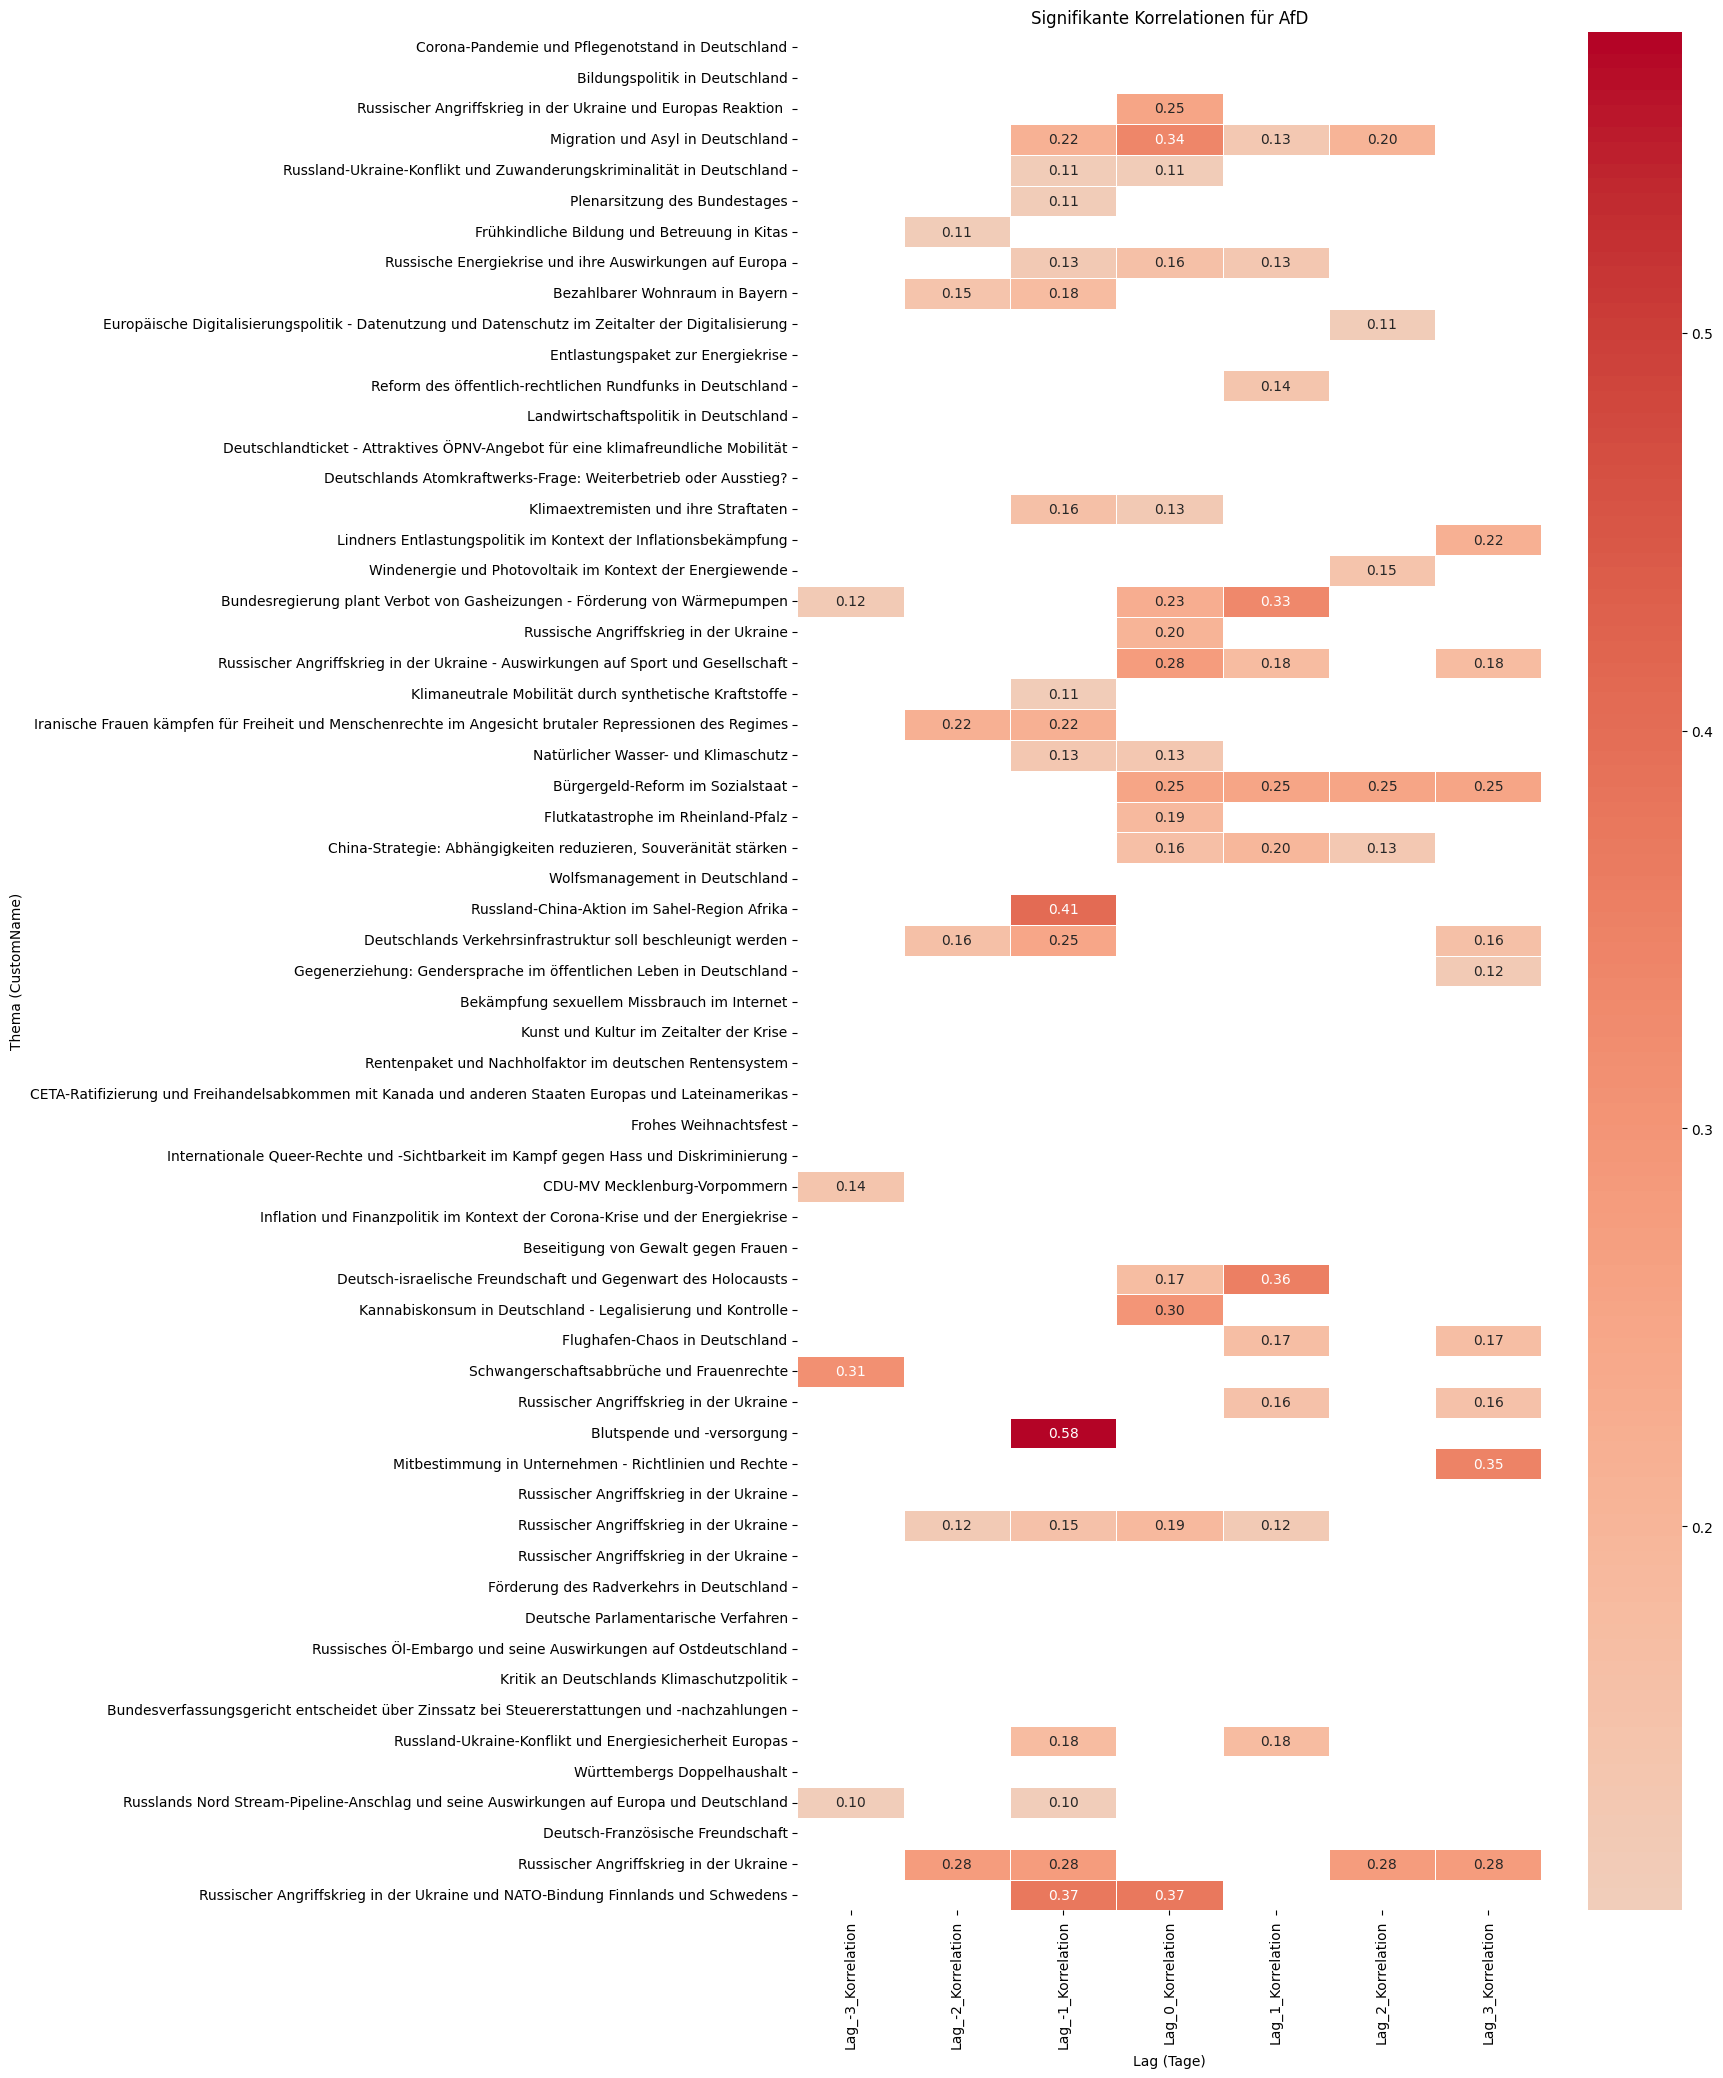

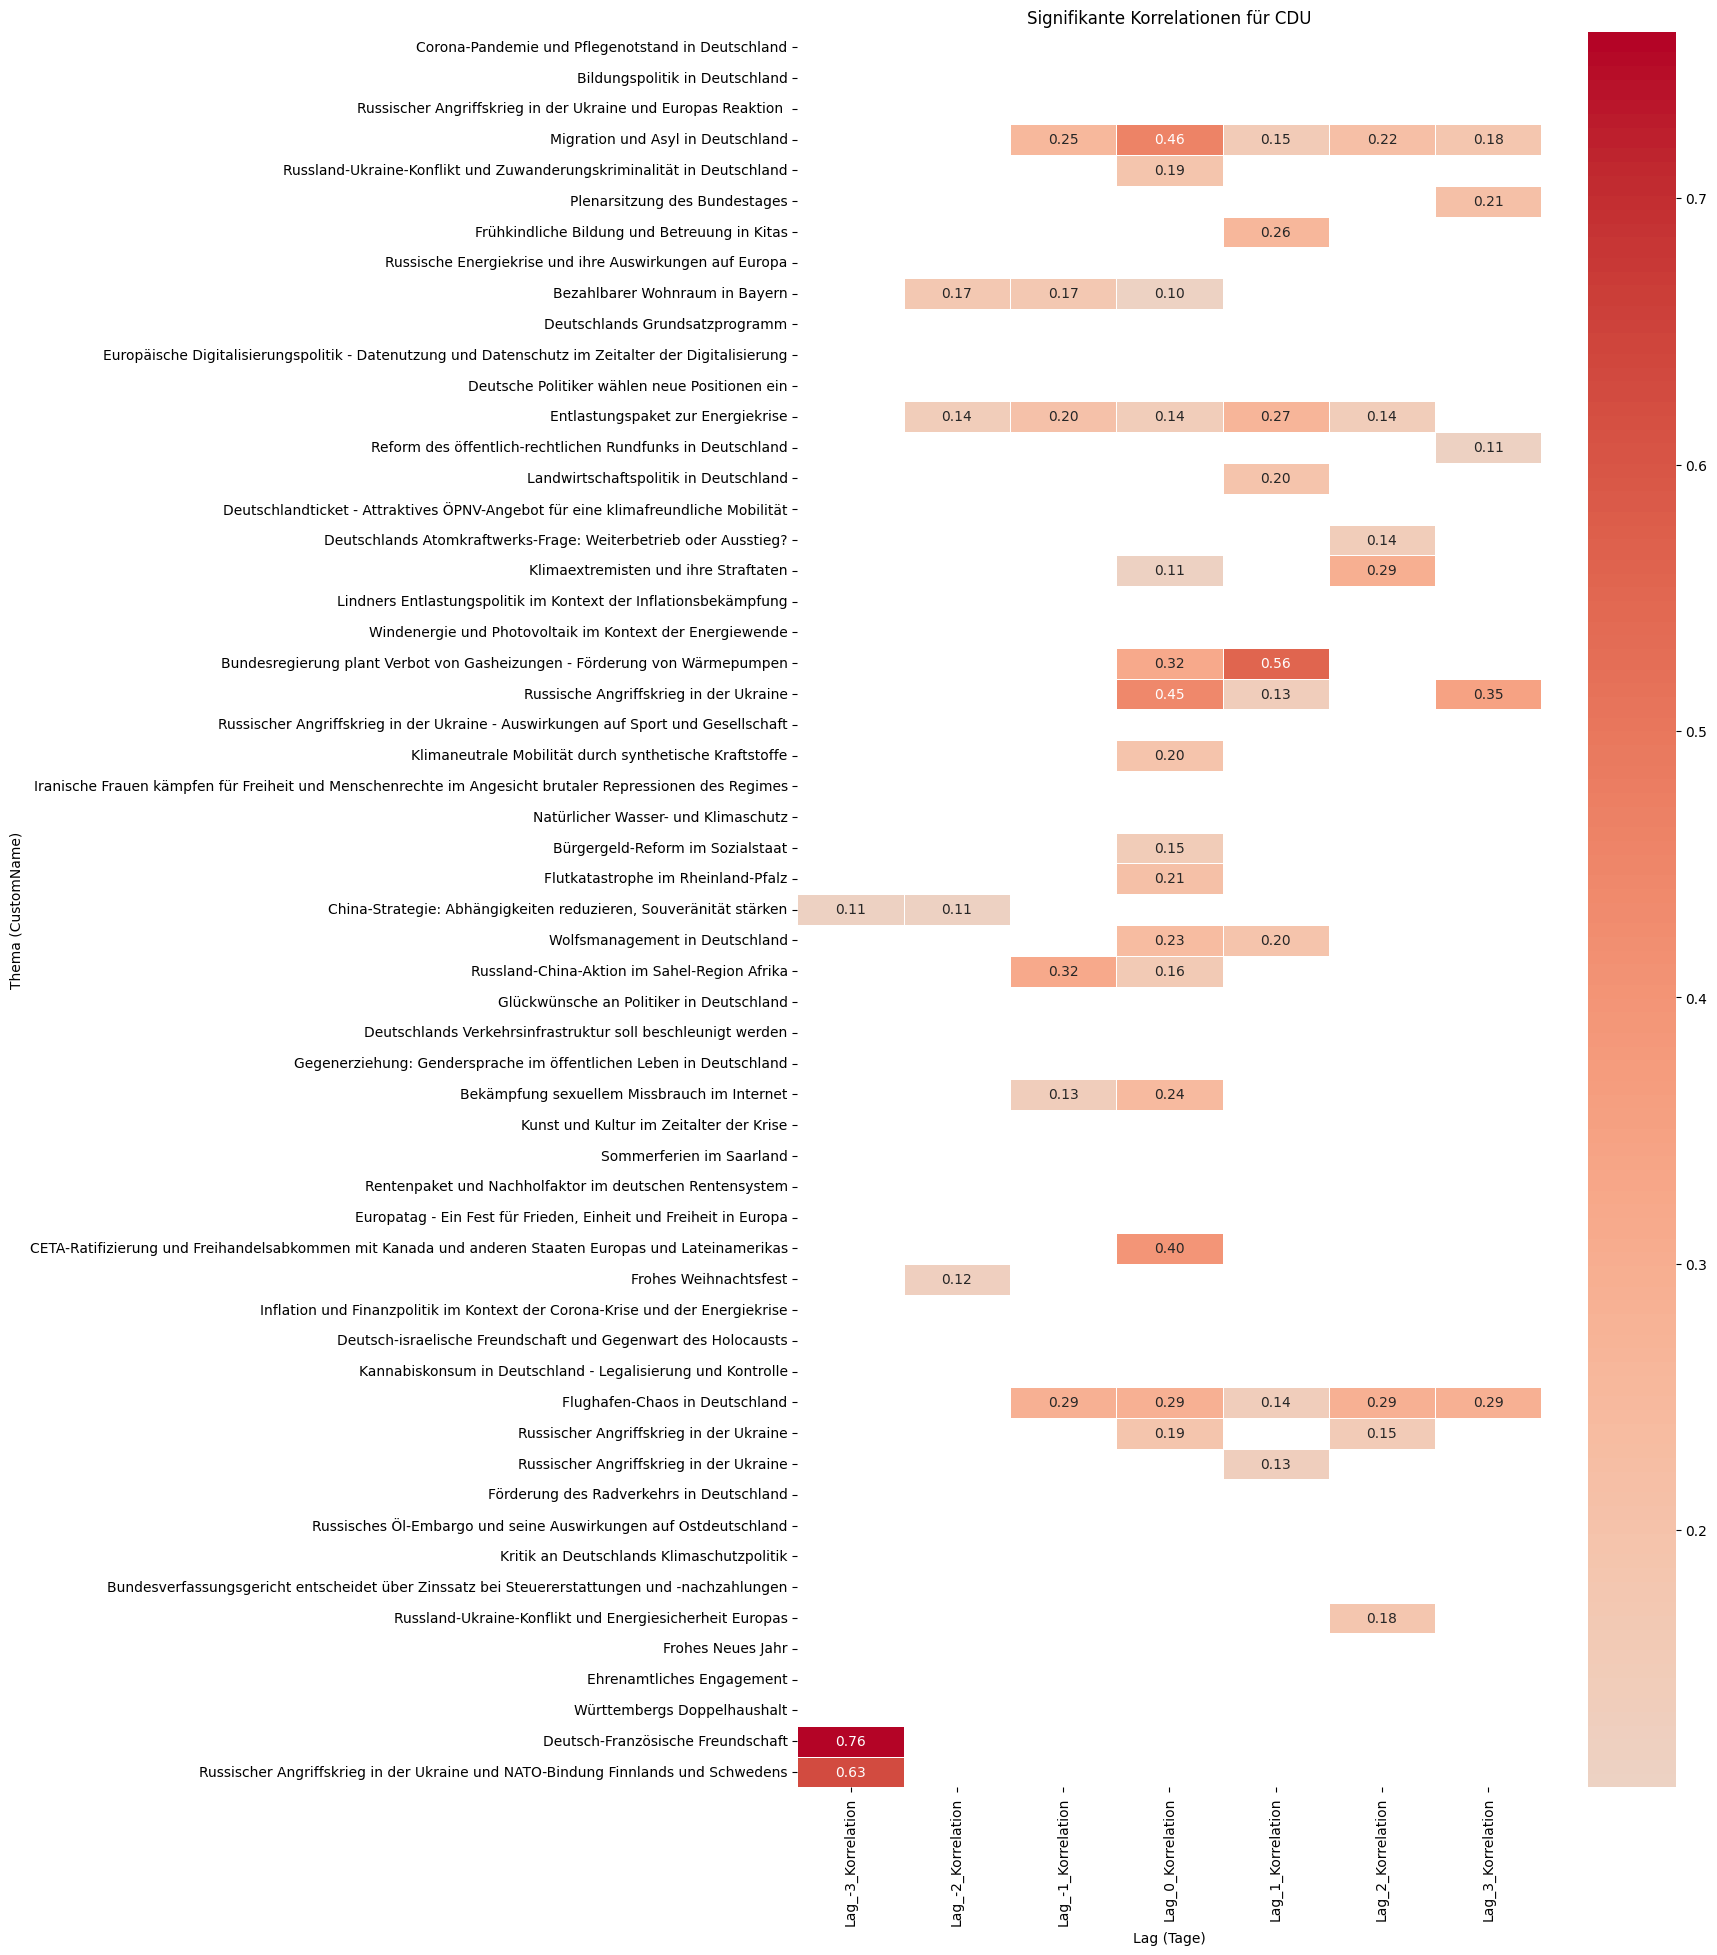

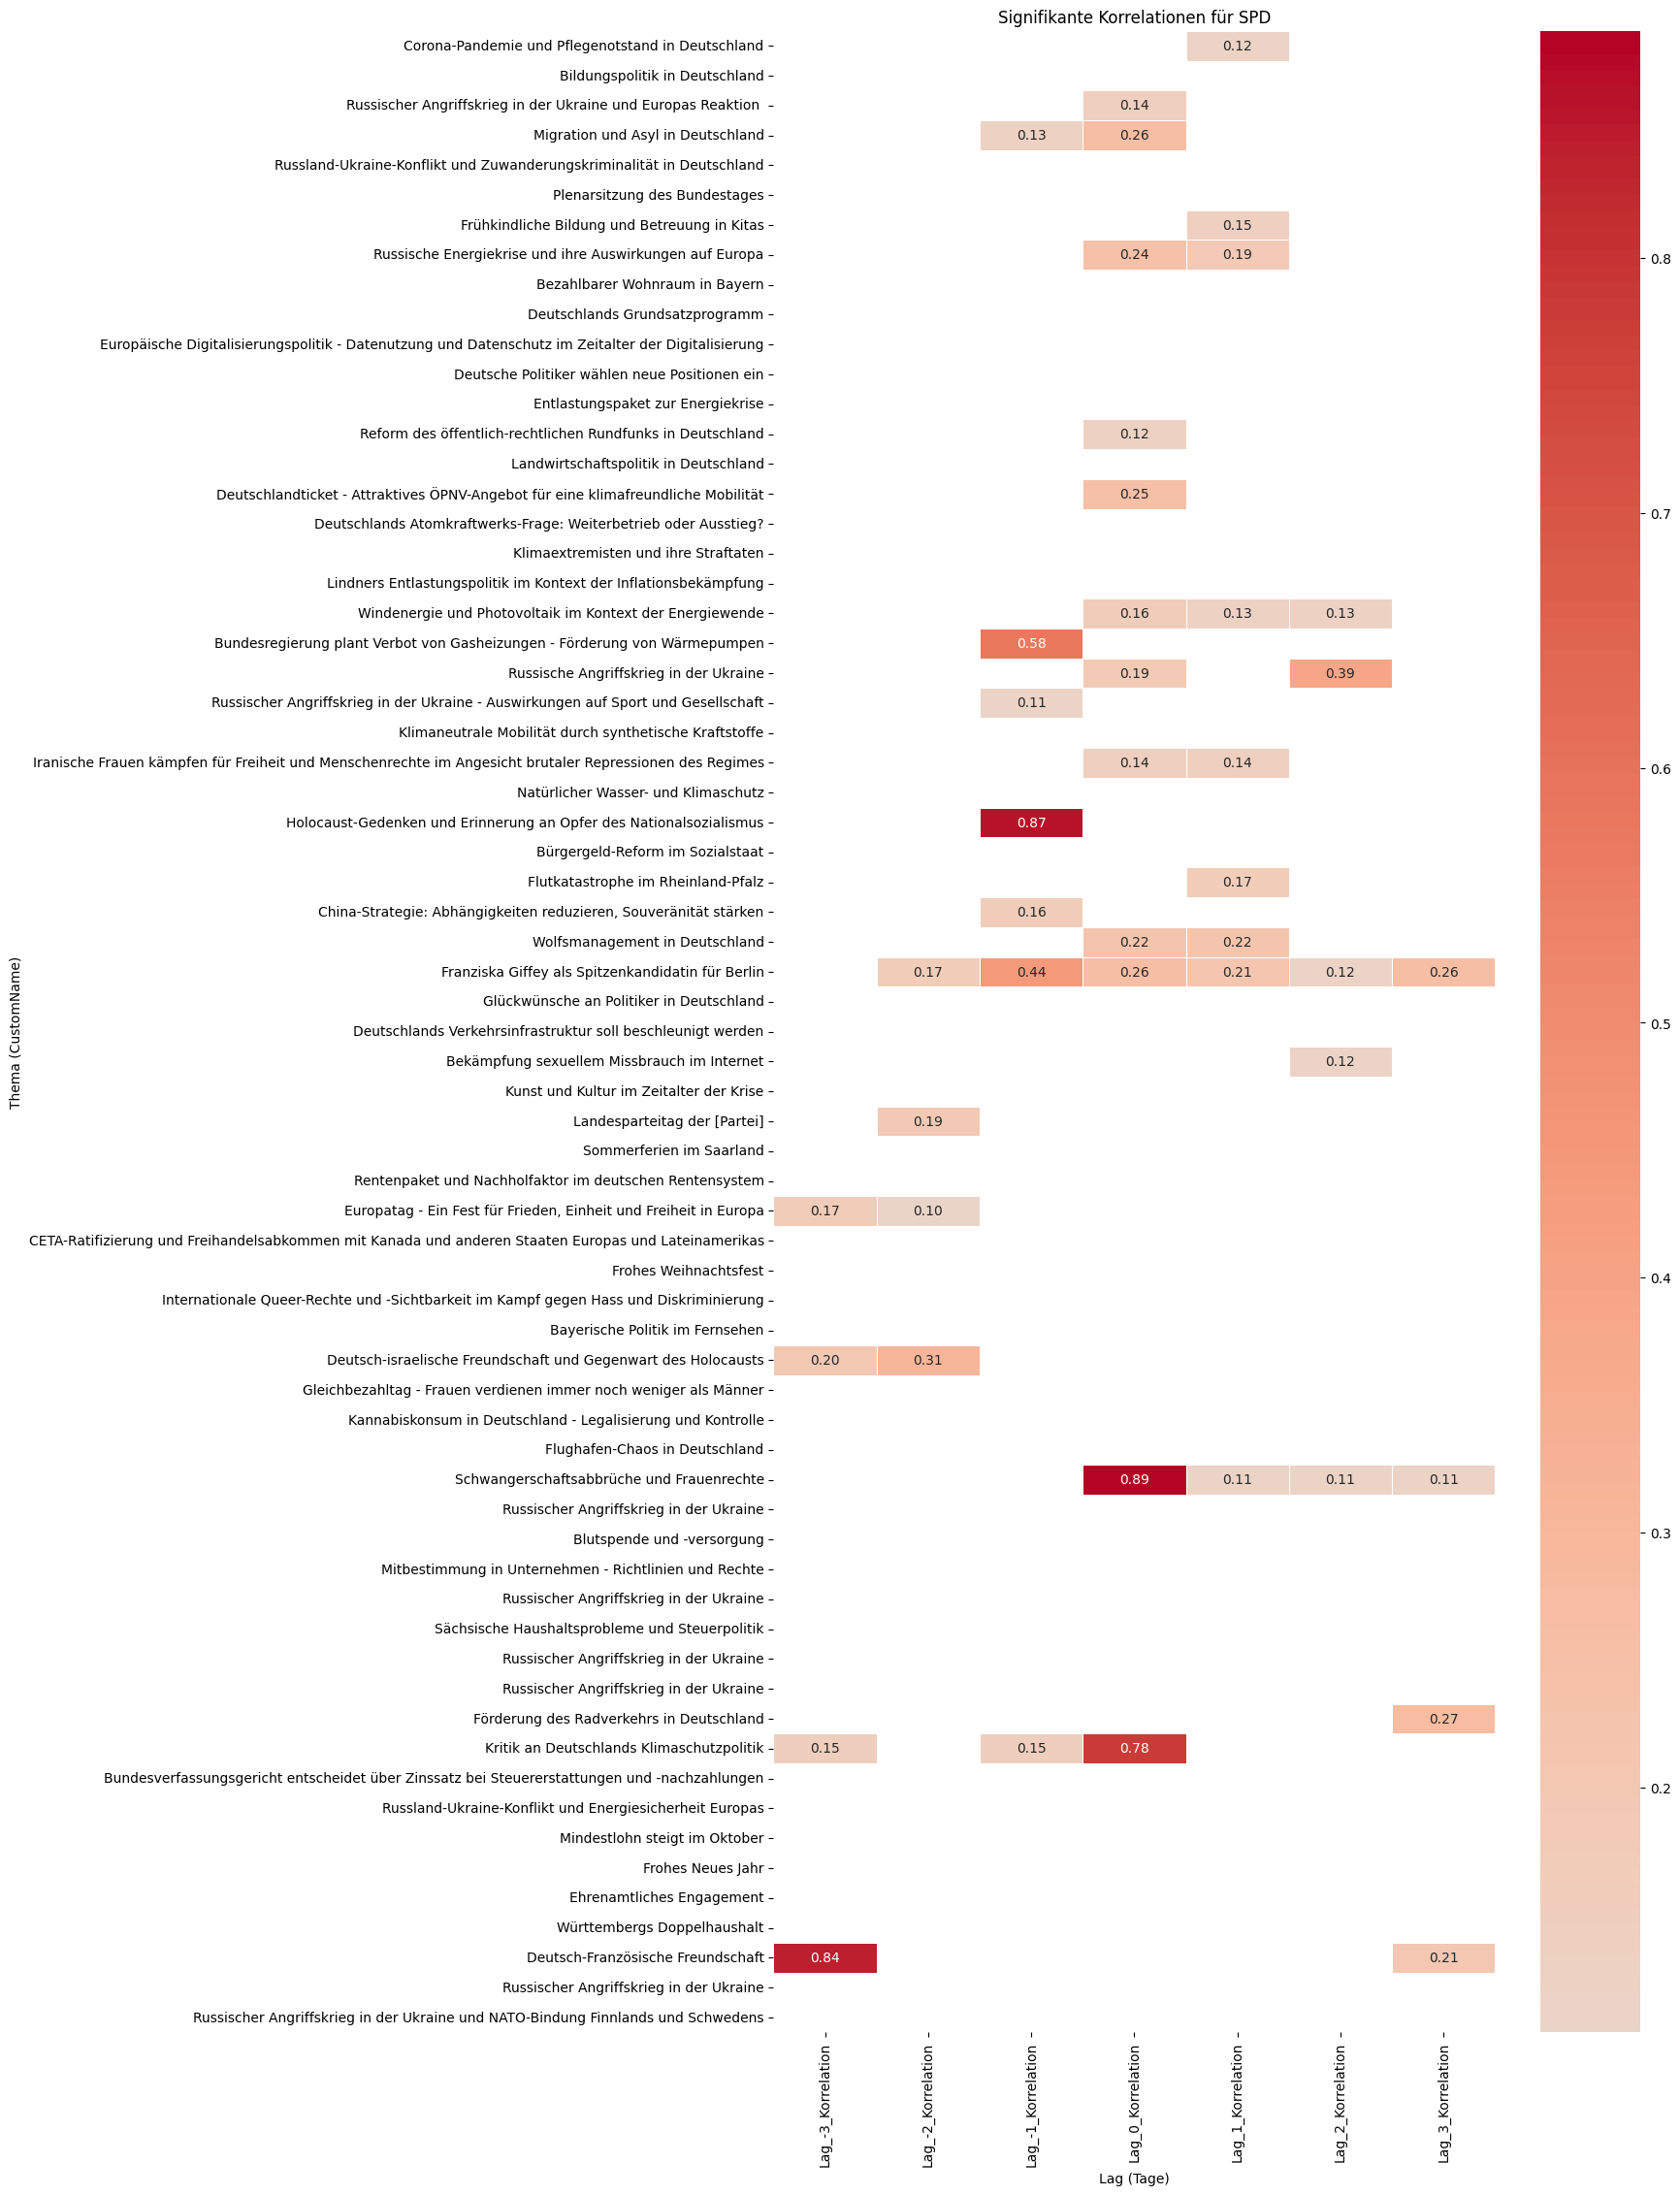

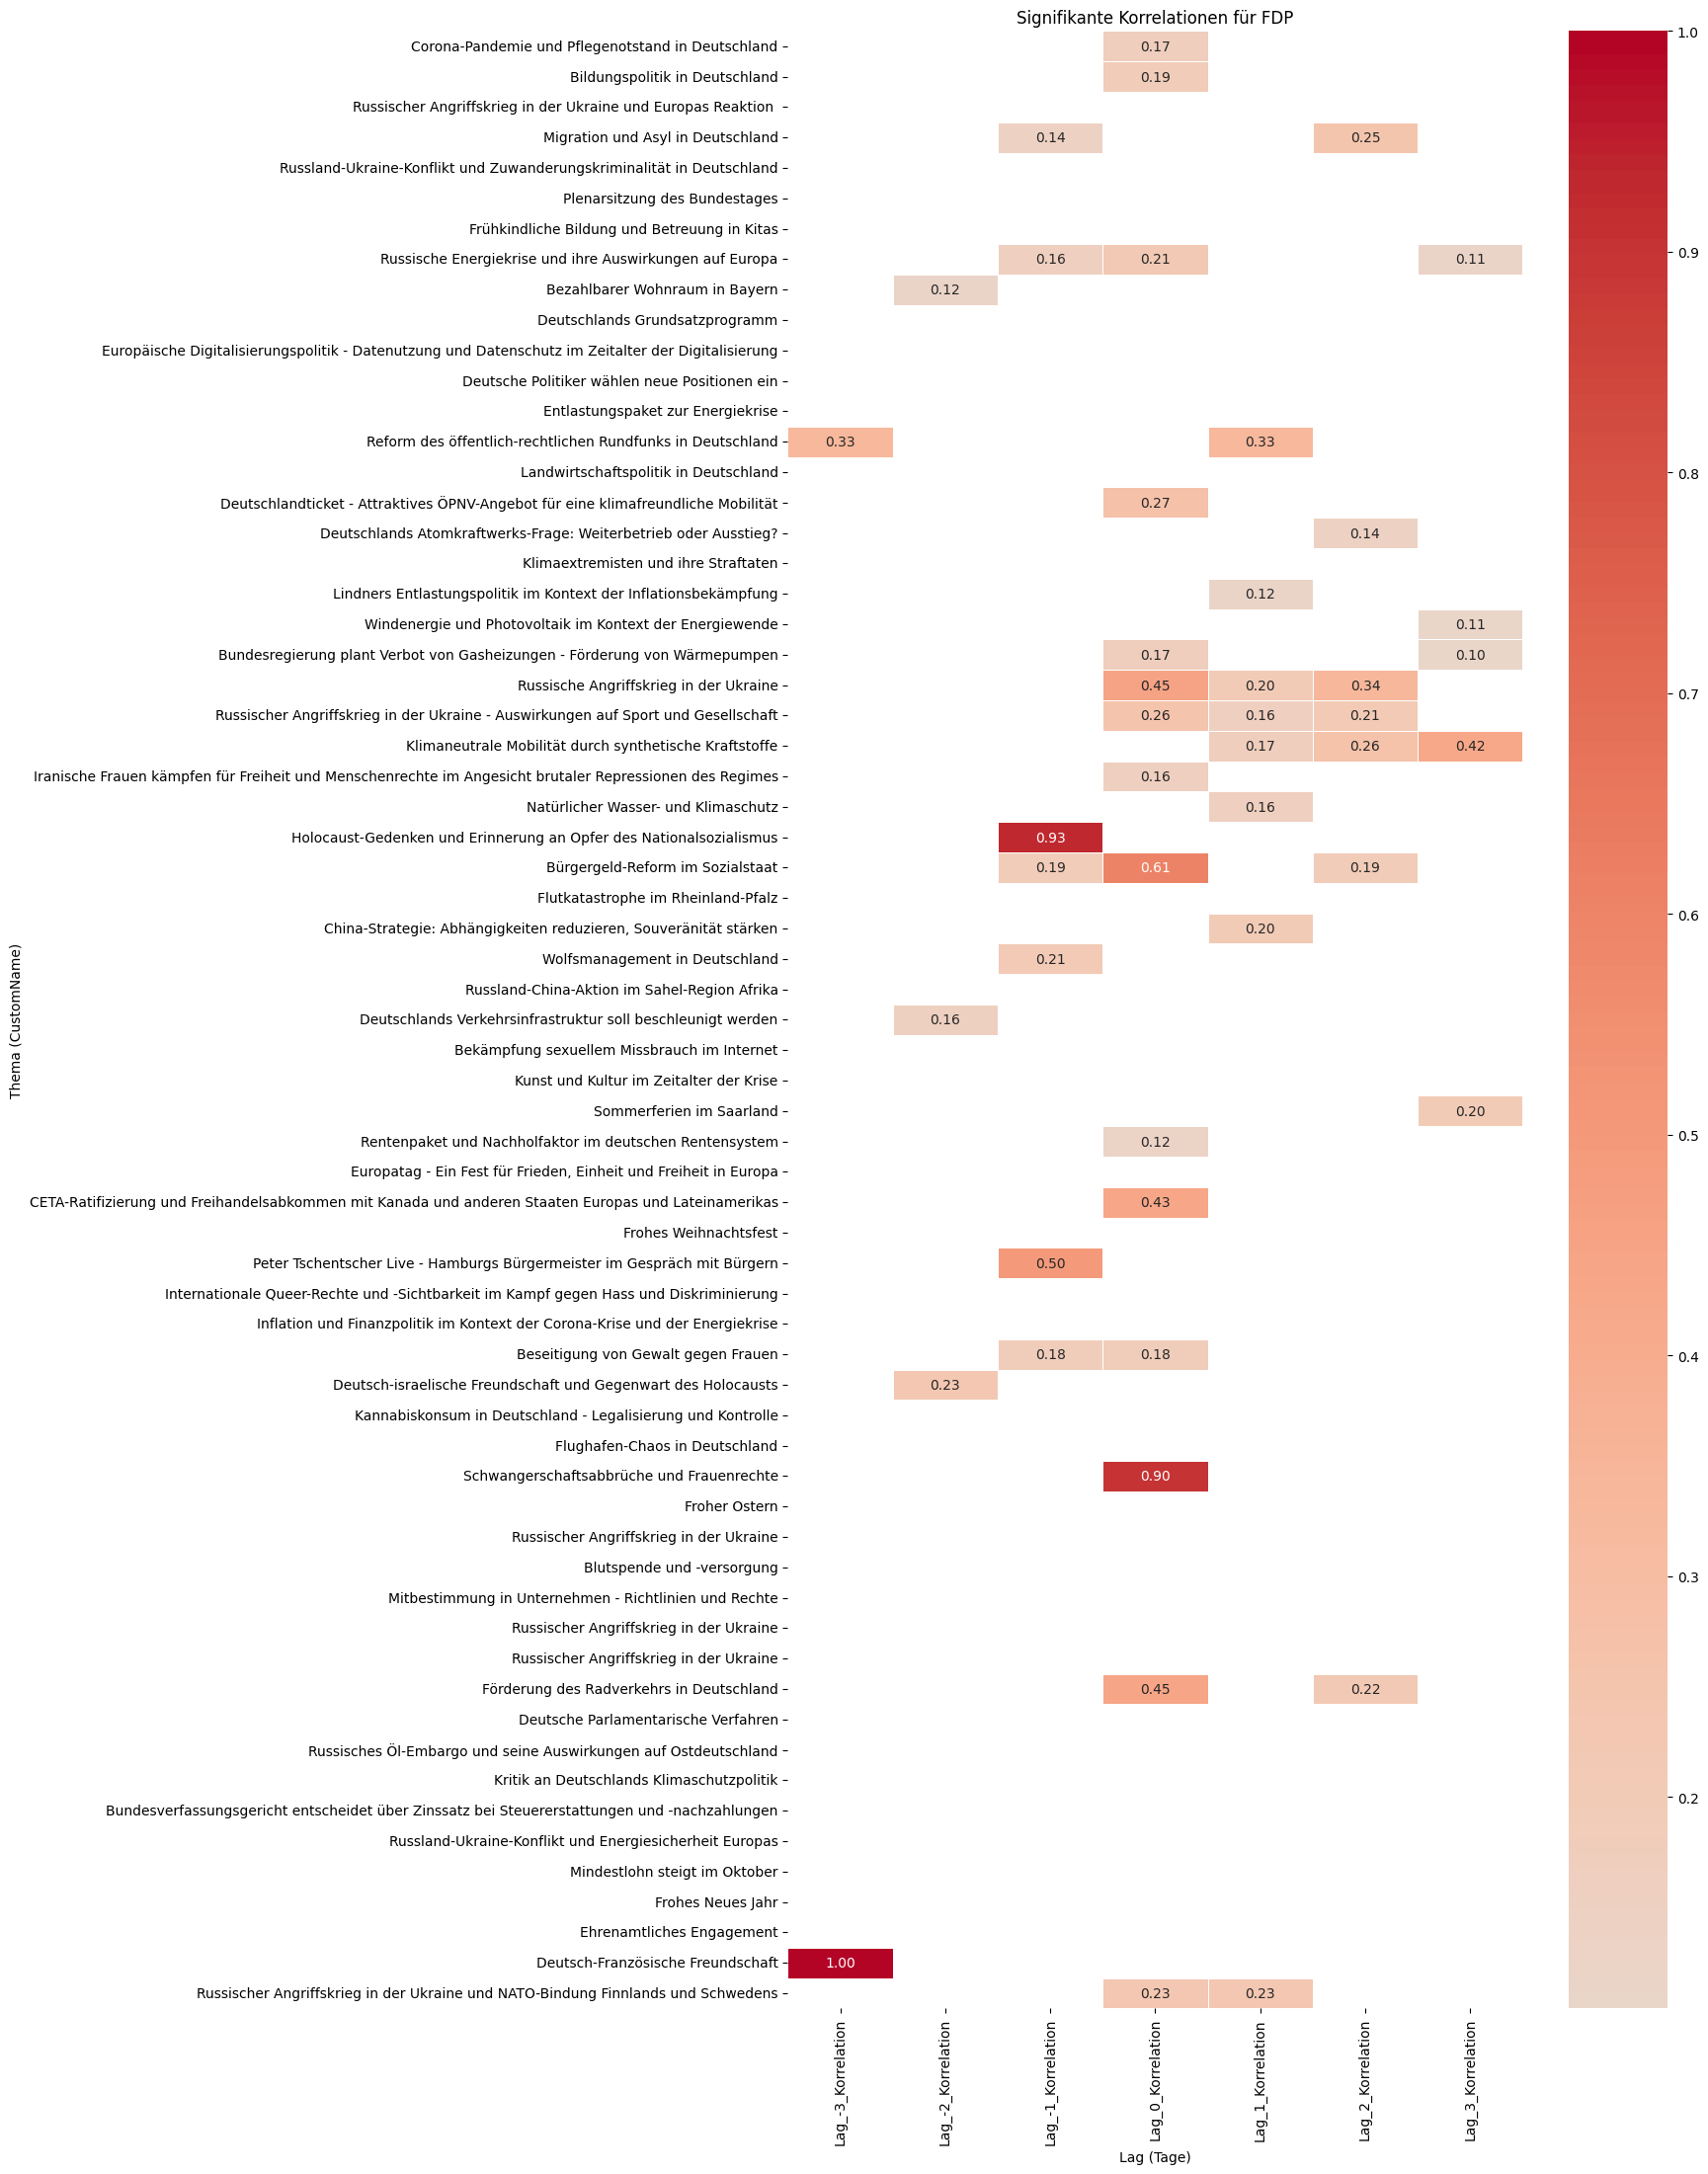

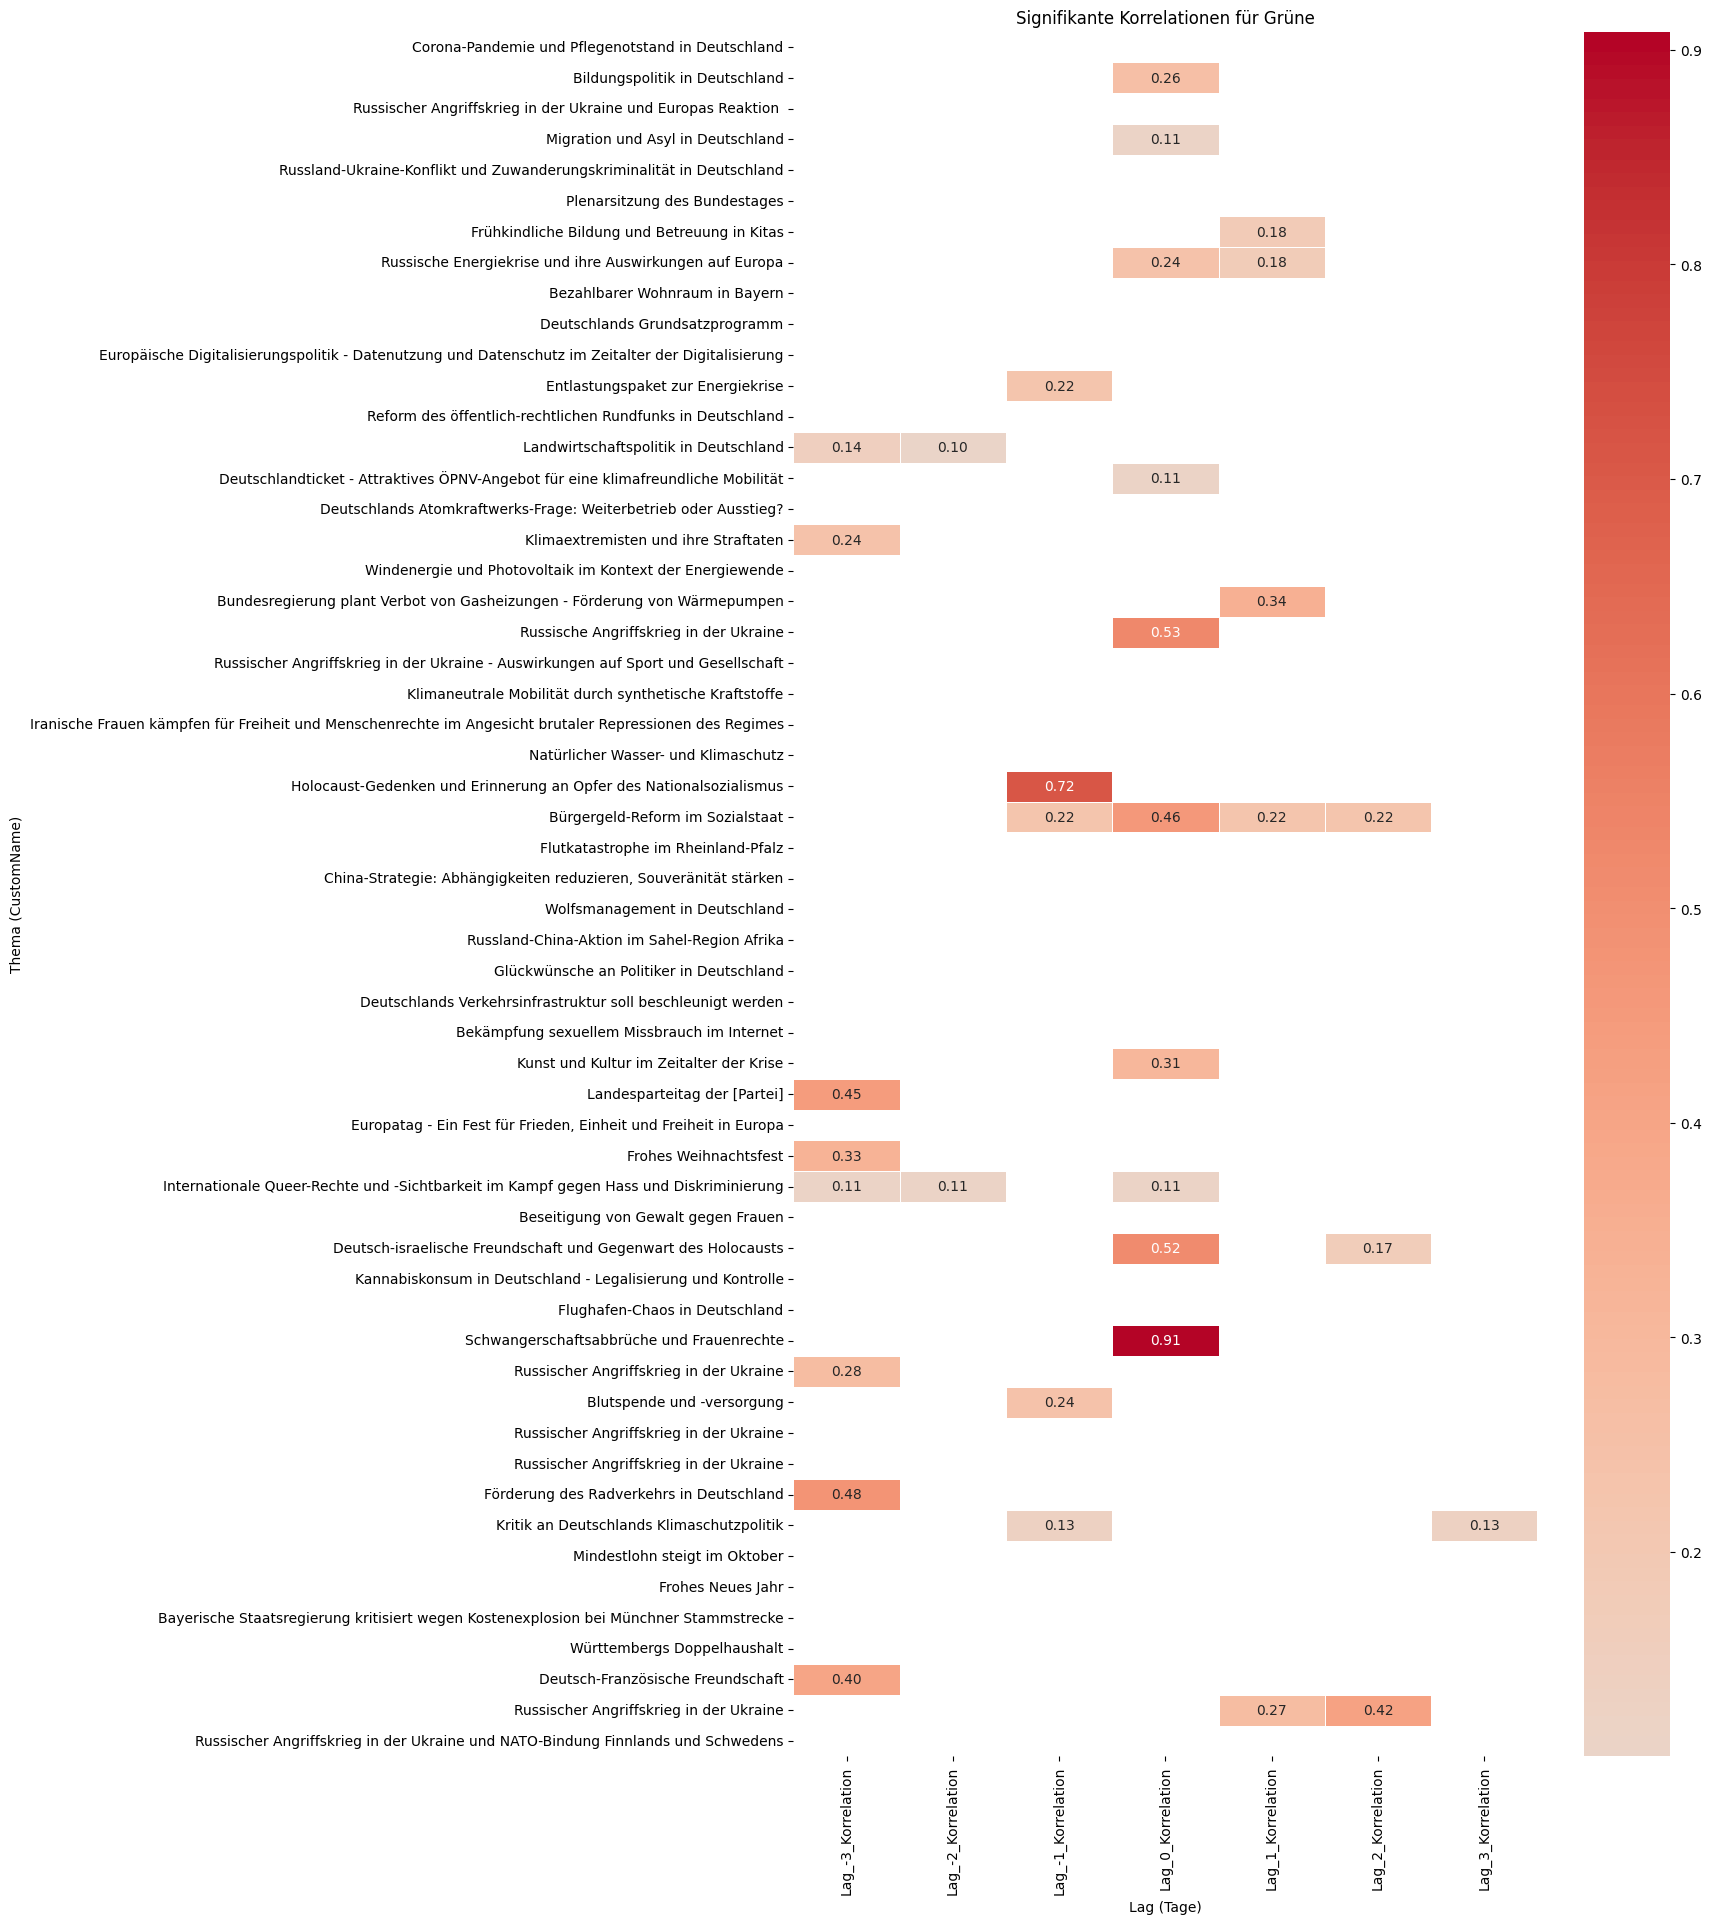

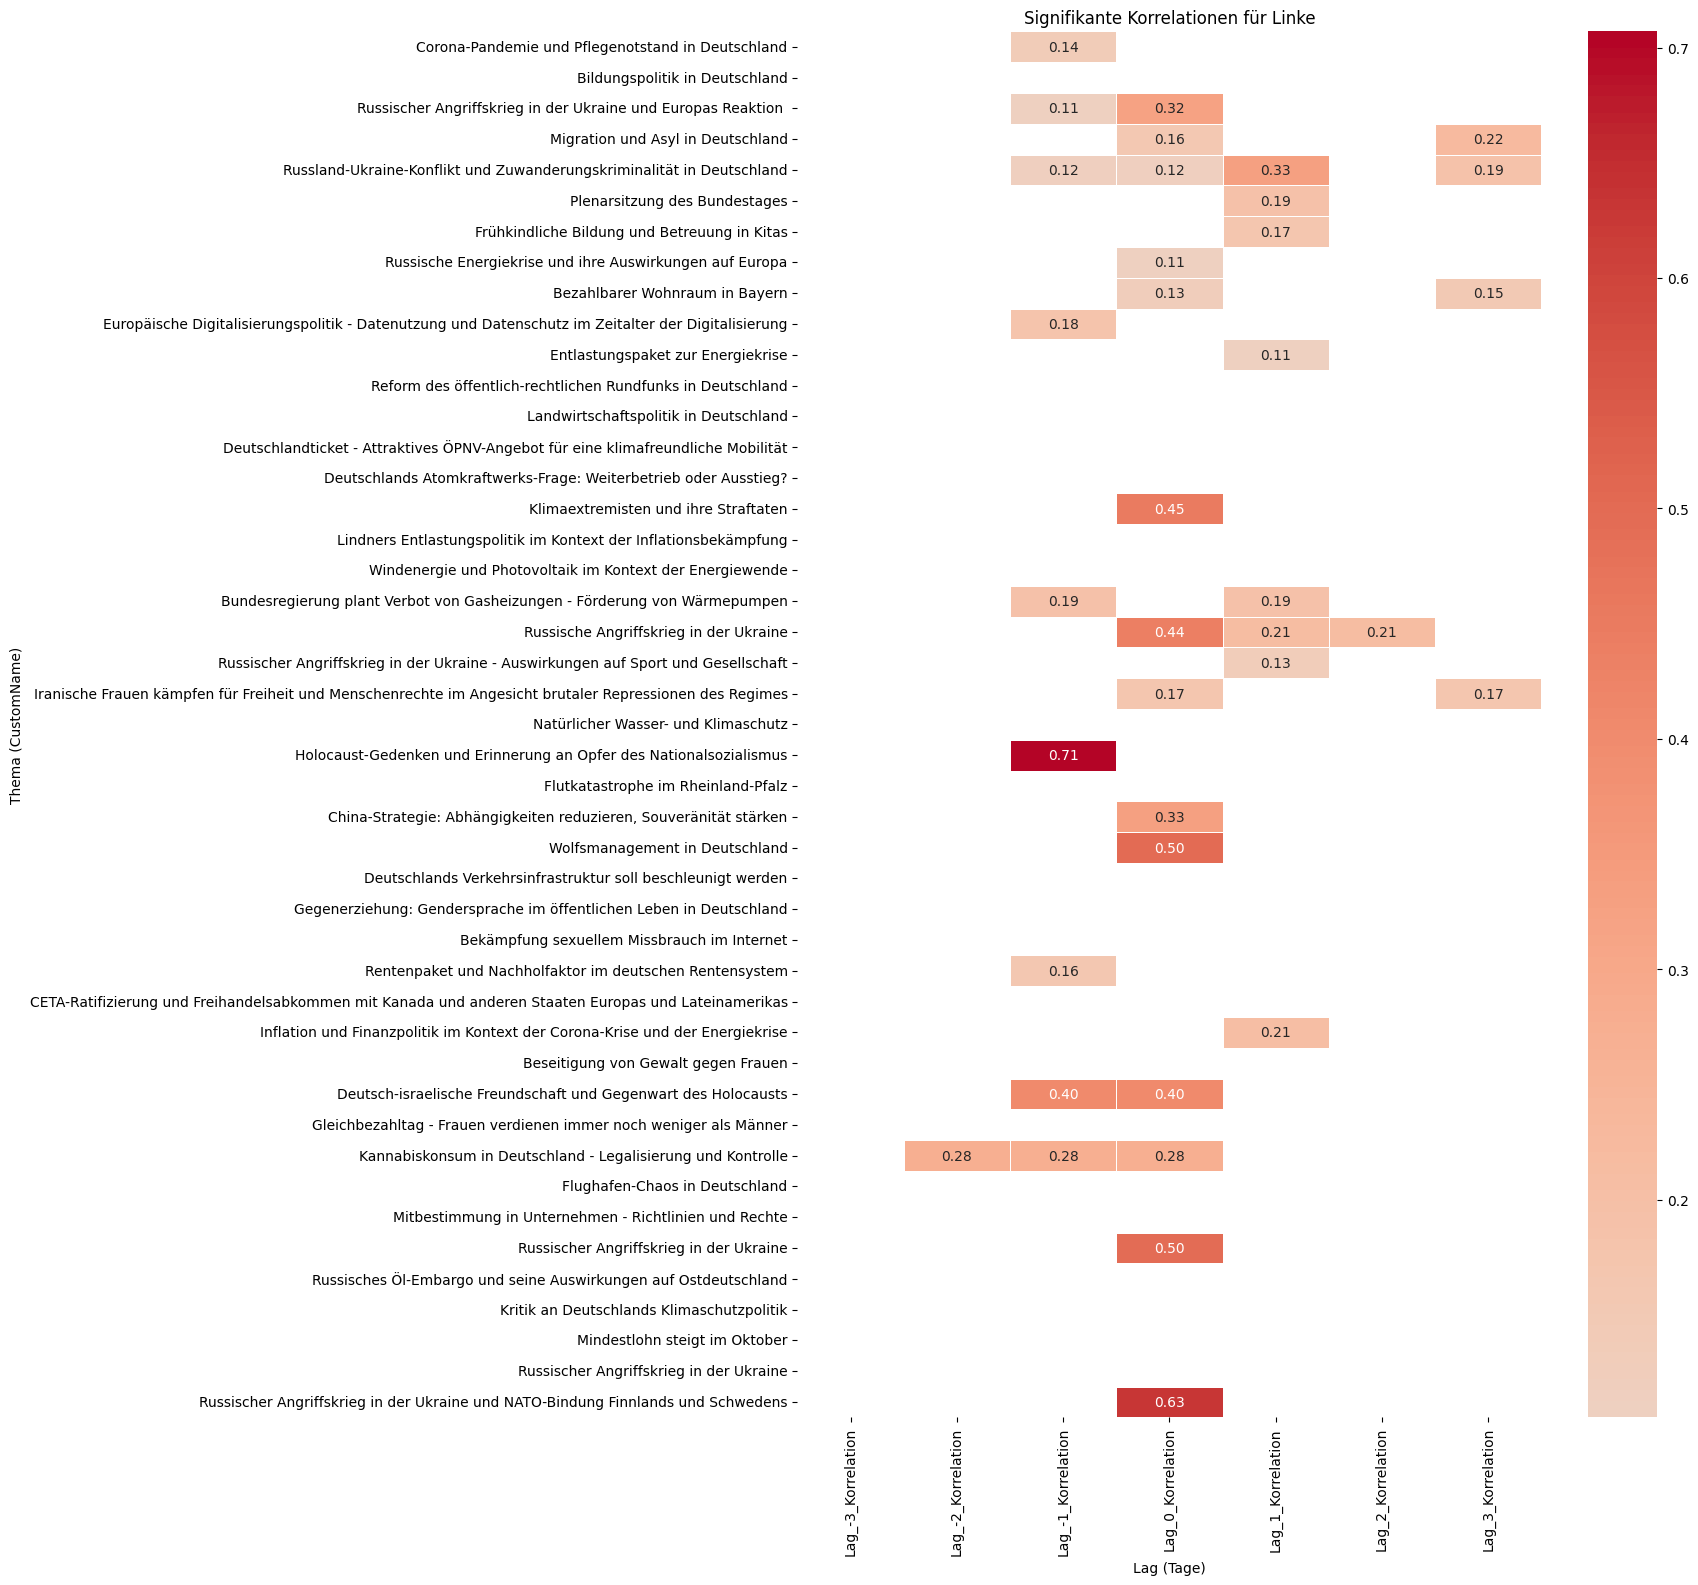

In [ ]:
# Visualisiere die Heatmaps für jede Partei
visualize_significant_correlations_by_party(results_dfs, party_names)


### Analyse - Ähnlichkeiten  zwischen Postingverhalten

📊 1️⃣ Methode: Aggregation der Korrelationen und p-Werte pro Topic

Ziel: Überprüfen, ob bestimmte Themen (z. B. "Migration", "Inflation", "Ukraine") für mehrere Parteien einen ähnlichen Einfluss haben.

Vorgehensweise:

Themenbasierte Aggregation:

1. Gruppiere alle DataFrames der Parteien nach der Spalte CustomName (Thema).
2. Berechne den Durchschnitt der Korrelationen und p-Werte pro Thema über alle Parteien hinweg.

Interpretation:

- Hohe Korrelationen (z. B. für Lag = -3) bedeuten, dass das Thema parteiübergreifend von Facebook beeinflusst wird.
- Hohe Korrelationen (z. B. für Lag = +3) bedeuten, dass das Thema parteiübergreifend auf Facebook nachwirkt.

In [ ]:
# Liste der DataFrames der einzelnen Parteien (beispielsweise: results_afd, results_cdu, results_spd, ...)
party_dfs = [results_afd, results_cdu, results_spd, results_fdp, results_gruene, results_linke]

# Kombiniere die DataFrames aller Parteien
combined_df = pd.concat(party_dfs)

# Aggregiere die Korrelationen und p-Werte pro CustomName (Thema)
aggregated_results = combined_df.groupby('CustomName').mean(numeric_only=True)  # Berechne den Durchschnitt

# Überprüfe, welche Themen konstant hohe Korrelationen über alle Parteien hinweg aufweisen
#print(aggregated_results[['Lag_-3_Korrelation', 'Lag_-2_Korrelation', 'Lag_-1_Korrelation', 
                          #'Lag_0_Korrelation', 'Lag_1_Korrelation', 'Lag_2_Korrelation', 'Lag_3_Korrelation']])
aggregated_results

Topic  Lag_-3_Korrelation  \
CustomName                                                                      
Bayerische Politik im Fernsehen                      47.0           -0.011360   
Bayerische Staatsregierung kritisiert wegen Kos...   81.0           -0.010359   
Bekämpfung sexuellem Missbrauch im Internet          36.0           -0.017131   
Beseitigung von Gewalt gegen Frauen                  53.0           -0.007108   
Bezahlbarer Wohnraum in Bayern                        8.0            0.004000   
...                                                   ...                 ...   
Sommerferien im Saarland                             39.0           -0.013361   
Sächsische Haushaltsprobleme und Steuerpolitik       67.0                 NaN   
Windenergie und Photovoltaik im Kontext der Ene...   19.0           -0.010919   
Wolfsmanagement in Deutschland                       30.0           -0.018192   
Württembergs Doppelhaushalt                          84.0           -0.008380   

                                                    Lag_-3_p_value  \
CustomName                                                           
Bayerische Politik im Fernsehen                           0.829229   
Bayerische Staatsregierung kritisiert wegen Kos...        0.844286   
Bekämpfung sexuellem Missbrauch im Internet               0.749020   
Beseitigung von Gewalt gegen Frauen                       0.893373   
Bezahlbarer Wohnraum in Bayern                            0.424411   
...                                                            ...   
Sommerferien im Saarland                                  0.800109   
Sächsische Haushaltsprobleme und Steuerpolitik                 NaN   
Windenergie und Photovoltaik im Kontext der Ene...        0.662209   
Wolfsmanagement in Deutschland                            0.731978   
Württembergs Doppelhaushalt                               0.873574   

                                                    Lag_-2_Korrelation  \
CustomName                                                               
Bayerische Politik im Fernsehen                              -0.011360   
Bayerische Staatsregierung kritisiert wegen Kos...           -0.010359   
Bekämpfung sexuellem Missbrauch im Internet                  -0.017122   
Beseitigung von Gewalt gegen Frauen                          -0.007098   
Bezahlbarer Wohnraum in Bayern                                0.089123   
...                                                                ...   
Sommerferien im Saarland                                     -0.013361   
Sächsische Haushaltsprobleme und Steuerpolitik                     NaN   
Windenergie und Photovoltaik im Kontext der Ene...           -0.016129   
Wolfsmanagement in Deutschland                               -0.018180   
Württembergs Doppelhaushalt                                  -0.008380   

                                                    Lag_-2_p_value  \
CustomName                                                           
Bayerische Politik im Fernsehen                           0.829229   
Bayerische Staatsregierung kritisiert wegen Kos...        0.844286   
Bekämpfung sexuellem Missbrauch im Internet               0.749084   
Beseitigung von Gewalt gegen Frauen                       0.893446   
Bezahlbarer Wohnraum in Bayern                            0.284037   
...                                                            ...   
Sommerferien im Saarland                                  0.800109   
Sächsische Haushaltsprobleme und Steuerpolitik                 NaN   
Windenergie und Photovoltaik im Kontext der Ene...        0.594326   
Wolfsmanagement in Deutschland                            0.732058   
Württembergs Doppelhaushalt                               0.873574   

                                                    Lag_-1_Korrelation  \
CustomName                                                               
Bayerische Politik im Fernsehen                              -0.0

📊 2️⃣ Methode: Vergleich der Korrelationen pro Partei

Ziel: Untersuchen, ob die Themen, die auf Facebook oder im Bundestag behandelt werden, bei einer bestimmten Partei früher oder später behandelt werden als bei anderen Parteien.

Vorgehensweise:

1. Ermittle pro Partei die höchsten Korrelationen bei Lag = -3, -2, -1, 0, 1, 2, 3.
2.  Führe eine cluster-basierte Analyse durch, um zu sehen, ob Parteien mit ähnlichem Verhalten gruppiert werden können

Interpretation:

- Hohe Korrelationen bei Lag = -3 (blau) für eine Partei zeigen, dass diese Partei stark von Facebook-Themen beeinflusst wird.
- Hohe Korrelationen bei Lag = +3 (grün) zeigen, dass die Partei das Thema aus der Bundestagsdebatte auf Facebook später aufgreift.
- Unterschiede zwischen Parteien könnten darauf hinweisen, dass einige Parteien stärker auf externe Themen von Facebook reagieren als andere.

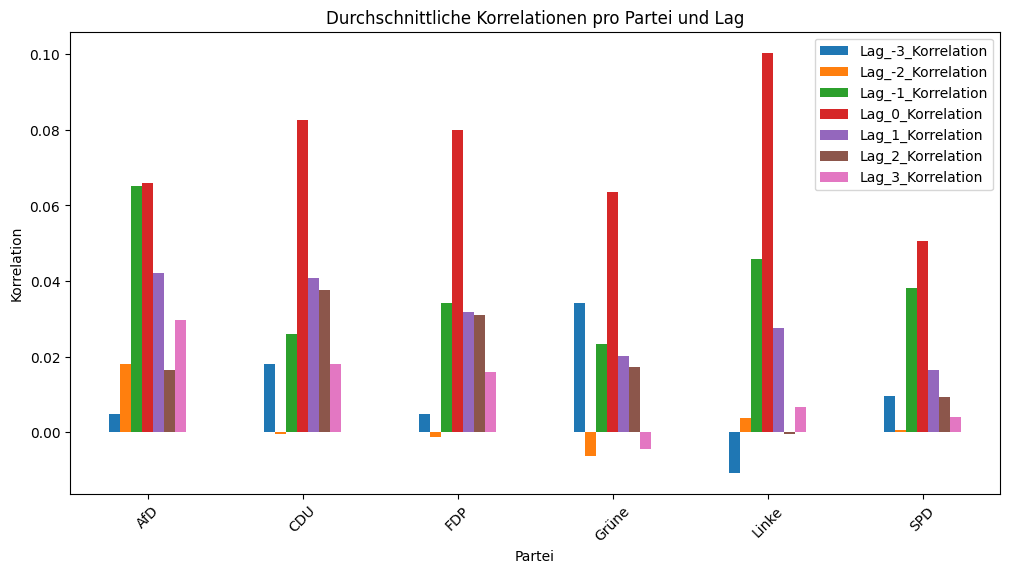

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Erstelle eine Liste von DataFrames mit einer zusätzlichen Spalte "Partei" (AfD, CDU, SPD, etc.)
results_afd['Partei'] = 'AfD'
results_cdu['Partei'] = 'CDU'
results_spd['Partei'] = 'SPD'
results_fdp['Partei'] = 'FDP'
results_gruene['Partei'] = 'Grüne'
results_linke['Partei'] = 'Linke'

# Kombiniere die DataFrames
combined_df = pd.concat([results_afd, results_cdu, results_spd, results_fdp, results_gruene, results_linke])

# Aggregiere die Korrelationen für jede Partei
party_aggregation = combined_df.groupby('Partei').mean(numeric_only=True)

# Visualisiere die Korrelationen pro Lag für jede Partei
correlation_cols = [f'Lag_{lag}_Korrelation' for lag in range(-3, 4)]
party_aggregation[correlation_cols].plot(kind='bar', figsize=(12, 6))
plt.title('Durchschnittliche Korrelationen pro Partei und Lag')
plt.ylabel('Korrelation')
plt.xlabel('Partei')
plt.xticks(rotation=45)
plt.show()


📊 3️⃣ Methode: Identifikation "wichtiger" Topics

Ziel: Untersuchen, welche Themen parteiübergreifend eine starke Signifikanz zeigen (p-Wert < 0.05) und eine hohe Korrelation (>|0.1|) aufweisen.

Vorgehensweise:

1. Filtere Themen mit p-Werten < 0.05 und Korrelationen > 0.1 oder < -0.1.
2. Zähle, wie oft Themen in allen Parteien signifikant sind.

In [ ]:
def find_significant_topics(results_df):
    """ Filtert die Themen mit p-Wert < 0.05 und Korrelationen > 0.1 oder < -0.1 """
    significant_topics = results_df[
        (results_df.filter(like='p_value') < 0.05) & 
        ((results_df.filter(like='Korrelation') > 0.1) | (results_df.filter(like='Korrelation') < -0.1))
    ]
    return significant_topics

# Filtere die signifikanten Themen in allen Partei-DataFrames
significant_topics_afd = find_significant_topics(results_afd)
significant_topics_cdu = find_significant_topics(results_cdu)
significant_topics_spd = find_significant_topics(results_spd)
significant_topics_fdp = find_significant_topics(results_fdp)
significant_topics_gruene = find_significant_topics(results_gruene)
significant_topics_linke = find_significant_topics(results_linke)

# Zähle, wie oft ein Topic in den Parteien signifikant war
all_significant_topics = pd.concat([significant_topics_afd, significant_topics_cdu, 
                                    significant_topics_spd, significant_topics_fdp, 
                                    significant_topics_gruene, significant_topics_linke])
topic_counts = all_significant_topics['CustomName'].value_counts()
print(topic_counts)


Series([], Name: count, dtype: int64)


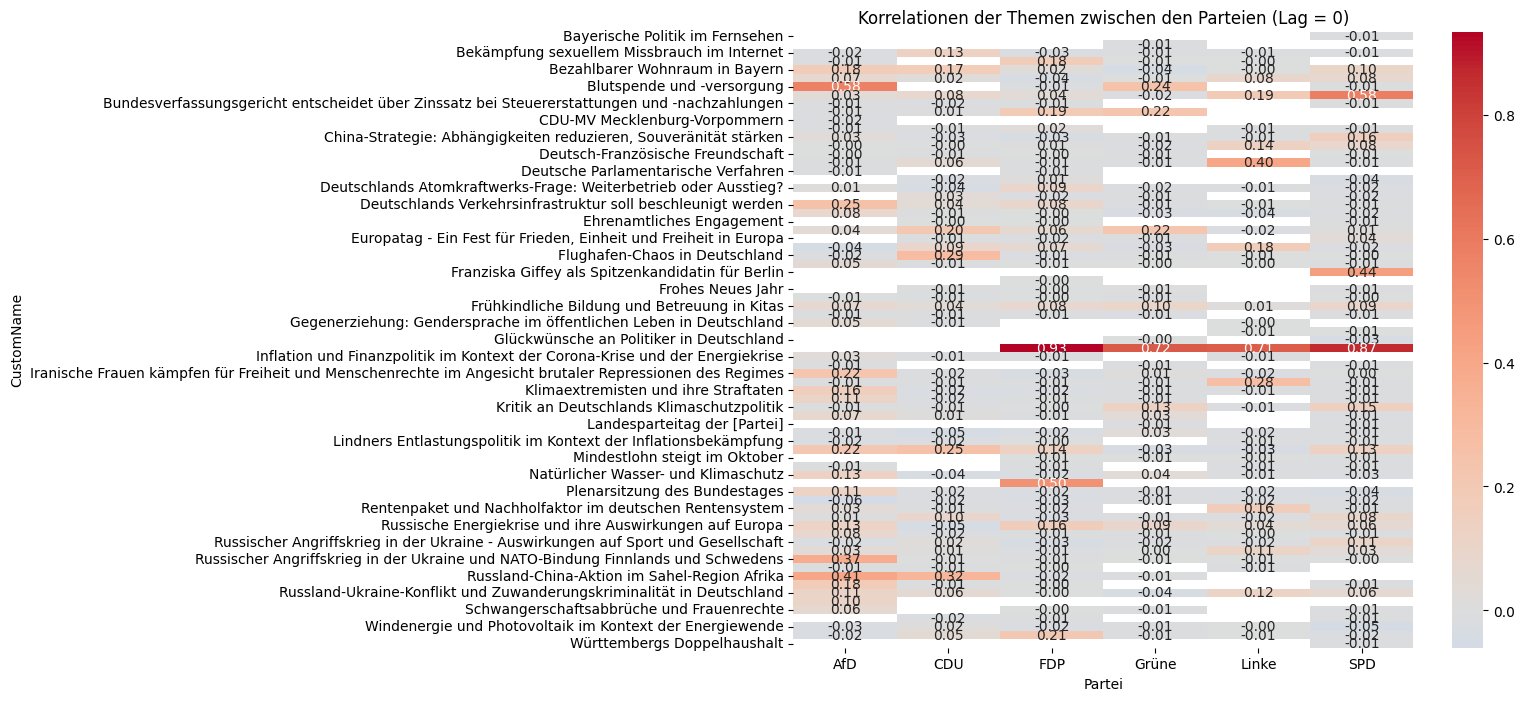

In [ ]:
import seaborn as sns

# Pivotiere die CustomNames und Korrelationswerte für Lag 0
pivot_df = combined_df.pivot_table(index='CustomName', columns='Partei', values='Lag_-1_Korrelation', aggfunc='mean')

# Visualisiere die Korrelationen als Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('Korrelationen der Themen zwischen den Parteien (Lag = 0)')
plt.show()


### Erstes Fazit - Gemeinsamkeiten
Erste Analysen führen zu dem Ergebnis, dass es keinen systematischen Zusammenhang bzgl. des Postingverhaltens und der Bundestagsreden gibt. Es lassen sich keine Themen identifizieren, die systematisch auf entweder der einen oder anderen Bühne zuerst behandelt werden. 